# Modeling Perseveration Behavior in a Two-Step Decision-Making Task Using Reinforcement Learning

### Authors (Group 19):
    - Ibrahim Muhip Tezcan (itezcan@uos.de)
    - Se Eun Choi (seechoi@uni-osnabrueck.de)
    - Andrei Klimenok (aklimenok@uni-osnabrueck.de)
    - Mohamad Aljammal (maljammal@uni-osnabrueck.de)
    - Therese Mayr (tmayr@uni-osnabrueck.de)
    - Eray Sevük (esevuek@uni-osnabrueck.de)

This Python notebook implements model-free, model-based and hybrid reinforcement learning models to model human behavior in a two-step decision-making task. The task and the hybrid model are from Daw et al. (2011) - "Model-based influences on humans’ choices and striatal prediction errors".

## code: 
the notebook is acopmanied by implementation of the models and all the necessary functions in seperate python files.  
github reposetory link:  
https://github.com/MoeMj1019/rl-twoStepTask

# Experimental Data

The data we used to fit our models can be downloaded at: https://myshare.uni-osnabrueck.de/d/9ec9ebd5745141e186c1/files/?p=%2Fall_participants_data_organized.zip

for seamless use of the notebook, please download the data and extract it to "./data/participants/" directory.



## Model Implementation *(3 points)*

For this exercise you should:

*   Implement and simulate data from two* models that are suitable to test your hypothesis. *(3 points)*

<font size=2>*You may implement more than two models if you wish. However, two models are sufficient for this group project.</font>

Make sure to comment your code and provide an explanation for each code block in a preceding text block.


### 1. Define the Two-Step Task Environment

We first implement an environment to replicate the two-step task. 

In [1]:
from environment import TwoStepEnv
env = TwoStepEnv()
print(env)

Two Step Task Environment:
state space: 
[0, 1, 2]
action space: 
[0, 1]
transition probability: 
0.7
stage 1 transition matrix: 
[[0.  0.7 0.3]
 [0.  0.3 0.7]]
initial reward probability matrix: 
[[0.         0.        ]
 [0.4503228  0.70539941]
 [0.67884379 0.66840879]]
fixed reward probability matrix: 
[[1 1]
 [0 0]
 [0 0]]
reward distribution (based on the current reward probability matrix): 
[[0. 0.]
 [0. 1.]
 [1. 1.]]
reward scaler: 
1



### 2. Agent implementations

Define the agents (models) that will interact with the environment. We implement the following agents:
- HybridAgent: A hybrid reinforcement learning agent that uses a combination of model-free and model-based methods.<br>
    - parameters:
        - w: the weight of the model-based method in the hybrid agent. w = 0 corresponds to a pure model-free agent, and w = 1 corresponds to a pure model-based agent.
        - alpha_1:  the learning rate for the first stage of the task.
        - alpha_2:  the learning rate for the second stage of the task.
        - beta_1:   the inverse temperature parameter for the first stage of the task.
        - beta_2:   the inverse temperature parameter for the second stage of the task.
        - lambda:   the eligibility trace parameter.
        - p:        perseveration parameter for first stage choices.
the hybrid nests a pure model-based agent and a pure model-free agent.
- model free: a HybridAgent with w = 0.
- model based: a HybridAgent with w = 1, alpha_1 and lambda have no effect in this case and can be set to arbitrary values. 
- RandomAgent: An agent that takes random actions. ( used only as a plasibility baseline for the other agents ) <br>
<spin style='color:red'> (THE RANDOME AGENT PLAYS NO ROLE IN HYPOTHESIS OR FINAL ANALYSIS) </spin>

In [2]:
from agents.random_agent import RandomAgent
agent_random = RandomAgent(env.action_space, env.state_space)
print(agent_random)

Random Agent
Action Space: [0, 1]
State Space: [0, 1, 2]



#### 2.2 Hybrid Agent

The hybrid agent uses a combination of model-free and model-based methods to update the Q-table, controlled by the parameter w.
For special case of w = 1 it acts as a model-based agent. If w = 0, it acts as a model-free agent. For 0 < w < 1, it is a hybrid agent.
The implementation is based on Daw et al. (2011) - "Model-based influences on humans’ choices and striatal prediction errors".

In [3]:
from agents.hybrid import HybridAgent
agent_hybrid = HybridAgent(env.action_space, env.state_space)
print(agent_hybrid)

Hybrid Agent
Action Space: [0, 1]
State Space: [0, 1, 2]
Alpha 1: 0.54
Alpha 2: 0.42
Beta 1: 5.19
Beta 2: 3.69
Lambda: 0.57
W: 0.39
P: 0.11



#### 2.2 Model Free Agent

In [4]:
agent_hybrid_mf = HybridAgent(env.action_space, env.state_space, w=0)
print(agent_hybrid_mf)

Hybrid Agent
Action Space: [0, 1]
State Space: [0, 1, 2]
Alpha 1: 0.54
Alpha 2: 0.42
Beta 1: 5.19
Beta 2: 3.69
Lambda: 0.57
W: 0
P: 0.11



#### 2.2 Model Based Agent

In [5]:
agent_hybrid_mb = HybridAgent(env.action_space, env.state_space, w=1)
print(agent_hybrid_mb)

Hybrid Agent
Action Space: [0, 1]
State Space: [0, 1, 2]
Alpha 1: 0.54
Alpha 2: 0.42
Beta 1: 5.19
Beta 2: 3.69
Lambda: 0.57
W: 1
P: 0.11



### 3. Simulating Data Using the Environment and Agents

Here we define funcntions to simulate data from the two-step task. We will run it below and save its output.

#### 3.1 Code for simulation

In [6]:
from simulate import simulate
from utils import save_simulated_data

#### 3.2 Run Simulation with Default Parameters
the default parameters are set to the median fitted values from in Daw et al. (2011) - "Model-based influences on humans’ choices and striatal prediction errors".

In [7]:
seed = 5
task_df_random, agent_random = simulate(agent_type='random', seed=seed)
task_df_hybrid, agent_hybrid= simulate(agent_type='hybrid', seed=seed)
task_df_hybrid_mf, agent_hybrid_mf= simulate(agent_type='hybrid_mf', seed=seed, params={'w':0.0}) # special case of pure model-free from hybrid
task_df_hybrid_mb, agent_hybrid_mb= simulate(agent_type='hybrid_mb', seed=seed, params={'w':1.0}) # special case of pure model-based from hybrid

In [8]:
save_simulated_data(task_df_random, agent_type='random')
save_simulated_data(task_df_hybrid, agent_type='hybrid')
save_simulated_data(task_df_hybrid_mf, agent_type='hybrid_mf')
save_simulated_data(task_df_hybrid_mb, agent_type='hybrid_mb')

Data saved to data/simulated/random/20240303-201347/simulated_data.csv
Data saved to data/simulated/hybrid/20240303-201347/simulated_data.csv
Data saved to data/simulated/hybrid_mf/20240303-201347/simulated_data.csv
Data saved to data/simulated/hybrid_mb/20240303-201347/simulated_data.csv


#### 3.3. Analysis of Simulated Data

Define functions for analyzing simulated data and use them to print some summary statistics and plots.

In [9]:
from behavioral_analysis import print_simple_task_summary
from behavioral_analysis import calc_plot_stay_probabilities
from behavioral_analysis import calc_plot_stay_probabilities_moving_average
from behavioral_analysis import calc_plot_running_average_cumulative_reward
from behavioral_analysis import calc_plot_running_stay_probabilities

In [10]:
# print q table and transition matrix
print("q_table hybrid:\n", agent_hybrid.q_table)
print("q_table mf:\n", agent_hybrid_mf.q_table)
print("q_table mb:\n", agent_hybrid_mb.q_table)

if hasattr(agent_hybrid, 'transition_model'):
    print("transition_matrix hybrid:\n", agent_hybrid.transition_model[0])
if hasattr(agent_hybrid_mf, 'transition_model'):
    print("transition_matrix hybrid mf:\n", agent_hybrid_mf.transition_model[0], 'NOT USED IN BELIEF UPDATE!')
if hasattr(agent_hybrid_mb, 'transition_model'):
    print("transition_matrix hybrid mb:\n", agent_hybrid_mb.transition_model[0])

# print some summary statistics about the task
full = False
print_simple_task_summary(task_df_random, title='random', full=full)
print_simple_task_summary(task_df_hybrid, title='hybrid', full=full)
print_simple_task_summary(task_df_hybrid_mf, title='hybrid_mf', full=full)
print_simple_task_summary(task_df_hybrid_mb, title='hybrid_mb', full=full)

q_table hybrid:
 [[0.68903531 0.4391675 ]
 [0.46174509 0.73675108]
 [0.43992194 0.96854284]]
q_table mf:
 [[0.61213891 0.08039134]
 [0.45827447 0.73675112]
 [0.43992194 0.9817037 ]]
q_table mb:
 [[0.67737102 0.85129166]
 [0.46541626 0.54693053]
 [0.43992036 0.98173214]]
transition_matrix hybrid:
 [[0.  0.7 0.3]
 [0.  0.3 0.7]]
transition_matrix hybrid mf:
 [[0.  0.7 0.3]
 [0.  0.3 0.7]] NOT USED IN BELIEF UPDATE!
transition_matrix hybrid mb:
 [[0.  0.7 0.3]
 [0.  0.3 0.7]]
### random
common transitions percentage in the task: 74.5 %
rewarded trails percentage: 49.0 %
### hybrid
common transitions percentage in the task: 68.5 %
rewarded trails percentage: 56.99999999999999 %
### hybrid_mf
common transitions percentage in the task: 69.0 %
rewarded trails percentage: 58.5 %
### hybrid_mb
common transitions percentage in the task: 69.0 %
rewarded trails percentage: 57.49999999999999 %


In [11]:
seed# Collect the dataframes for the analysis
task_dfs = [task_df_random ,task_df_hybrid_mf, task_df_hybrid_mb, task_df_hybrid]
model_names = ['random','hybrid_mf', 'hybrid_mb', 'hybrid']

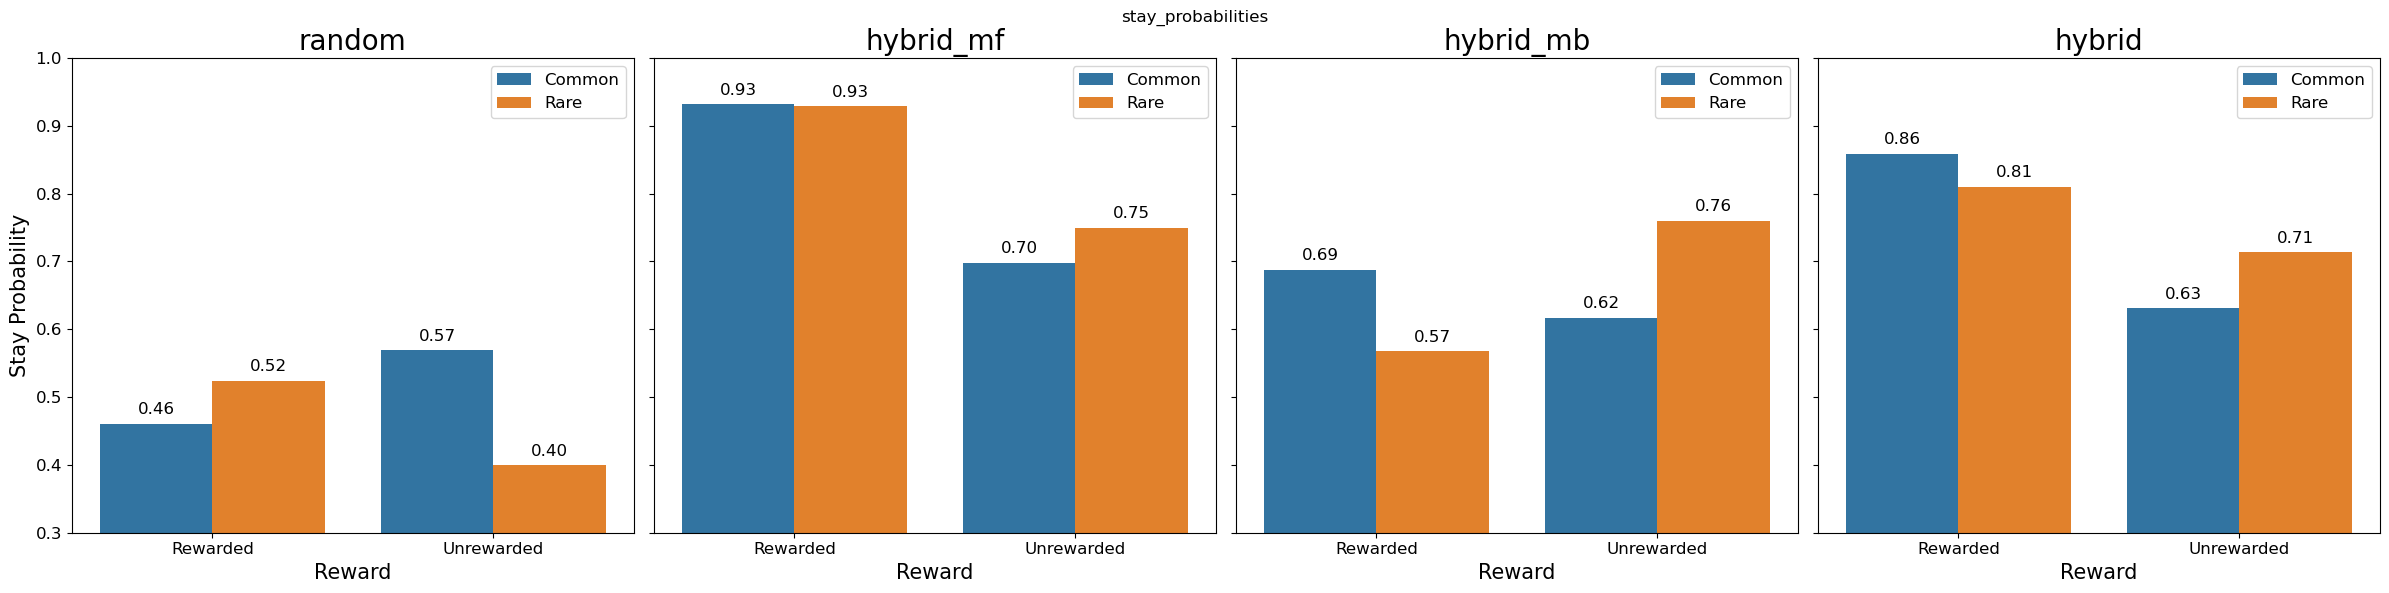

In [12]:
stay_probabilities = calc_plot_stay_probabilities(dfs=task_dfs, labels=model_names, title='stay_probabilities', max_plots_per_row=4)

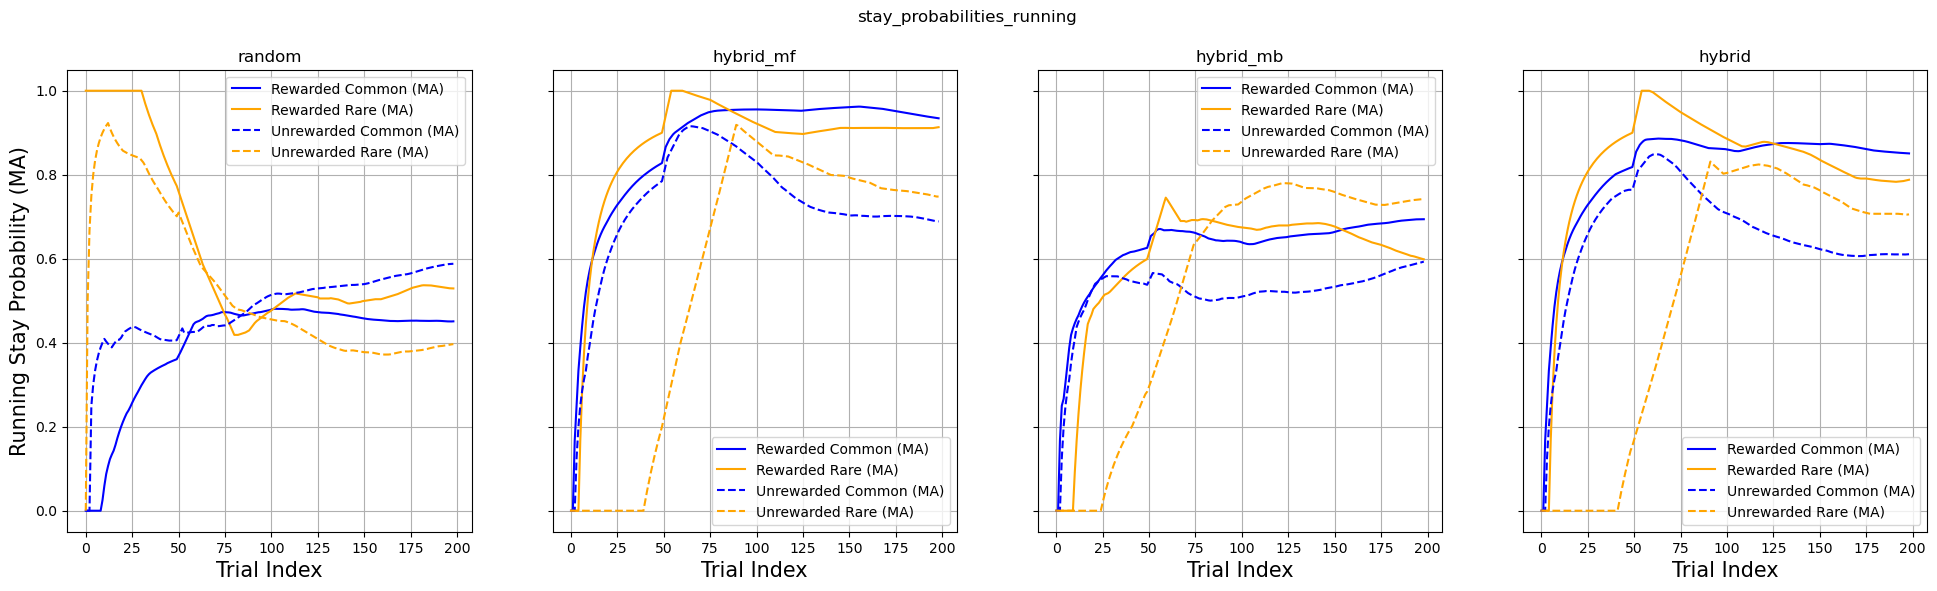

In [13]:
# plot running stay probabilities
window_size = 50
stay_probabilities_smoothed_ma= calc_plot_running_stay_probabilities(dfs=task_dfs, labels=model_names, title='stay_probabilities_running', window_size=window_size, max_plots_per_row=4)
# window_size = 200
# stay_probabilities_ma = calc_plot_stay_probabilities_moving_average(dfs=task_dfs, labels=model_names, title='stay_probabilities_running',
#                                                                     window_size=window_size, max_plots_per_row=5)

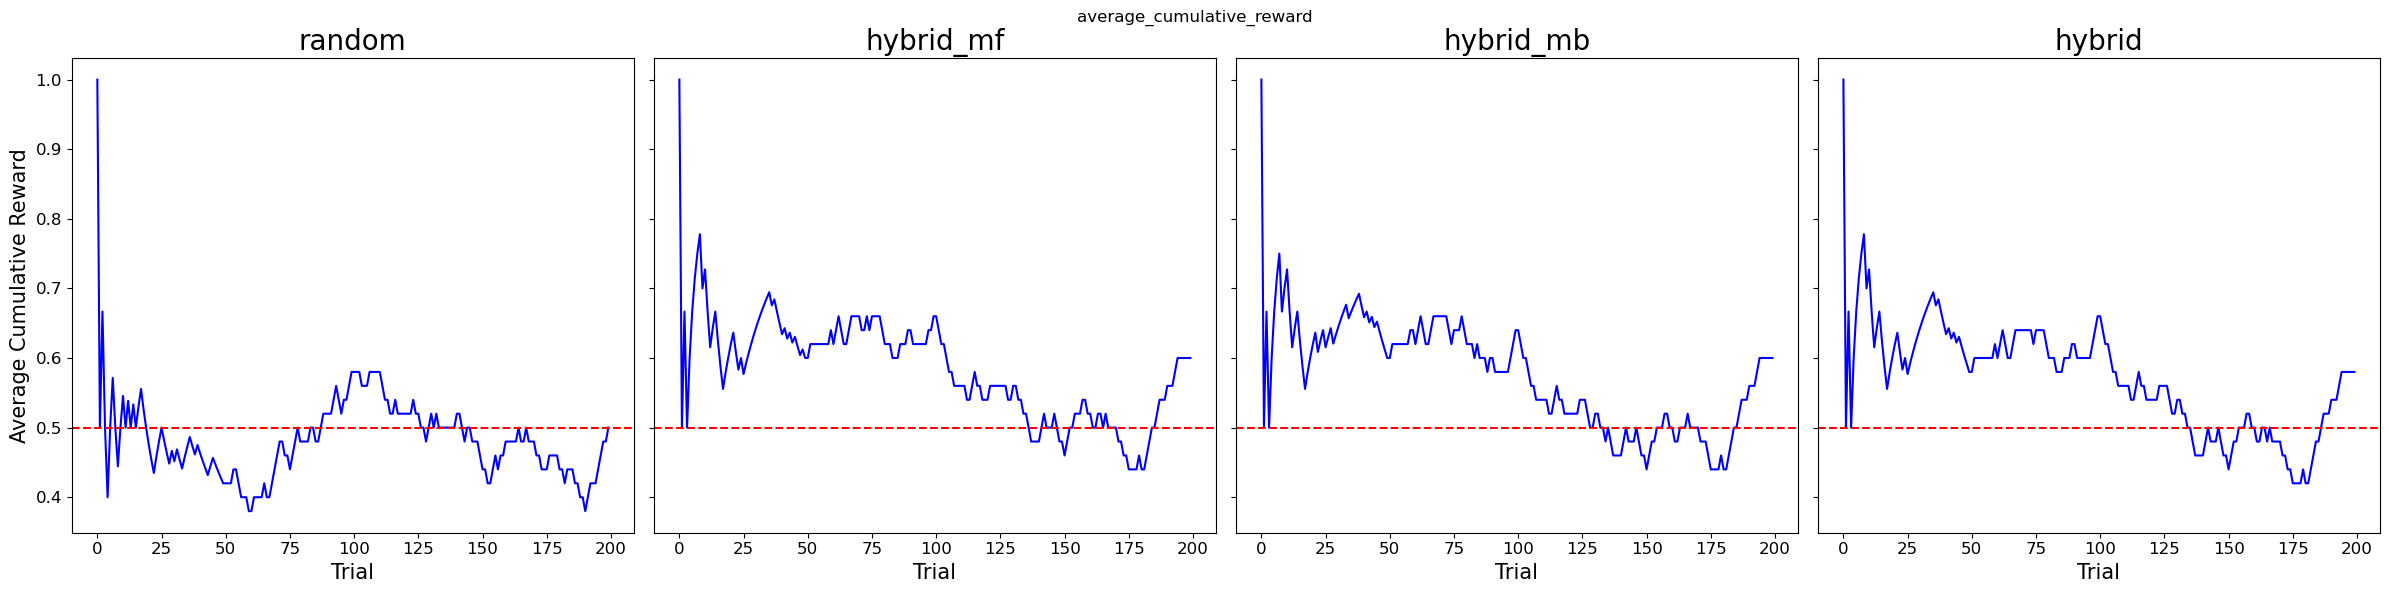

In [14]:
# plot the average cumulative reward
window_size = 50
average_cumulative_rewards = calc_plot_running_average_cumulative_reward(dfs=task_dfs, labels=model_names, title='average_cumulative_reward',
                                                                        window_size=window_size, max_plots_per_row=4)

## Model Simulation *(3 points)*

For this exercise you should:

*   Simulate data from both models for a single set of parameters. The simulation should mimic the experiment you are trying to model. *(2 points)*

*   Plot the simulated behavior of both models. *(1 point)*

Make sure to comment your code and provide an explanation for each code block in a preceding text block.


### Simulate Data with a Single Set Of Parameters

Here we simulate data from our models again, with a single set of hand-picked parameters. For reward probabilities, we use data from the experiment directly instead of running an independent gassuain random walk, we hope by that to have an initial clearer insight into the models behaviour.

In [15]:
from utils import load_files_from_folder, preprocess_human_data
import os

In [16]:
# parameters
SEED = 0
params_hybrid = {'alpha_1': 0.4,
                 'alpha_2': 0.4,
                 'beta_1': 6,
                 'beta_2': 3,
                 '_lambda': 0.5,
                 'w': 0.5,
                 'p': 0.1}
params_hybrid_mf = {'alpha_1': 0.3,
                    'alpha_2': 0.5,
                    'beta_1': 5,
                    'beta_2': 3,
                    '_lambda': 0.7,
                    'w': 0.0,
                    'p': -0.1}
params_hybrid_mb = {'alpha_1': 0.1,  # arbitrary value in case of pure model based
                    'alpha_2': 0.3,
                    'beta_1': 3,
                    'beta_2': 5,
                    '_lambda': 0.5,  # arbitrary value in case of pure model based
                    'w': 1.0,
                    'p': 0.1}

- optionally, we can use the exact sampled rewards from the observed data by setting use_reward_distribution=True <br>
- Here, we don't use the same sampled rewards from the observed data to keep some variability in the task

In [17]:
# load and inspect human data
group = 'group_01'
foldr_path = os.path.join("data", "participants", group)
# load all data from the folder
raw_data = load_files_from_folder(foldr_path , extension=".csv")

# preprocess the data
proccessed_data = [preprocess_human_data(data) for data in raw_data]

# select the a participant
participant_data = proccessed_data[1]

# Run simulation and save to csv
USE_SAME_SAMPLED_REWARDS = False
task_df_hybrid, agent_hybrid = simulate(agent_type='hybrid', params=params_hybrid, seed=SEED,
                                from_data=participant_data,
                                use_reward_distribution=USE_SAME_SAMPLED_REWARDS)
task_df_hybrid_mf, agent_hybrid_mf = simulate(agent_type='hybrid', params=params_hybrid_mf, seed=SEED,
                                from_data=participant_data,
                                use_reward_distribution=USE_SAME_SAMPLED_REWARDS)
task_df_hybrid_mb, agent_hybrid_mb = simulate(agent_type='hybrid', params=params_hybrid_mb, seed=SEED,
                                from_data=participant_data,
                                use_reward_distribution=USE_SAME_SAMPLED_REWARDS)

save_simulated_data(task_df_hybrid, agent_type='hybrid')
save_simulated_data(task_df_hybrid_mf, agent_type='hybrid_mf')
save_simulated_data(task_df_hybrid_mb, agent_type='hybrid_mb')

Data saved to data/simulated/hybrid/20240303-201353/simulated_data.csv
Data saved to data/simulated/hybrid_mf/20240303-201353/simulated_data.csv
Data saved to data/simulated/hybrid_mb/20240303-201353/simulated_data.csv


In [18]:
task_dfs = [task_df_hybrid, task_df_hybrid_mf, task_df_hybrid_mb, participant_data]
model_names = ['hybrid', 'hybrid_mf', 'hybrid_mb', 'participant']

In [19]:
# print some statistics about the task
for task_df, model_name in zip(task_dfs, model_names):
    print_simple_task_summary(task_df, title=model_name)

### hybrid
common transitions percentage in the task: 72.0 %
rewarded trails percentage: 52.5 %
### hybrid_mf
common transitions percentage in the task: 72.0 %
rewarded trails percentage: 56.99999999999999 %
### hybrid_mb
common transitions percentage in the task: 73.0 %
rewarded trails percentage: 59.0 %
### participant
common transitions percentage in the task: 70.0 %
rewarded trails percentage: 51.0 %


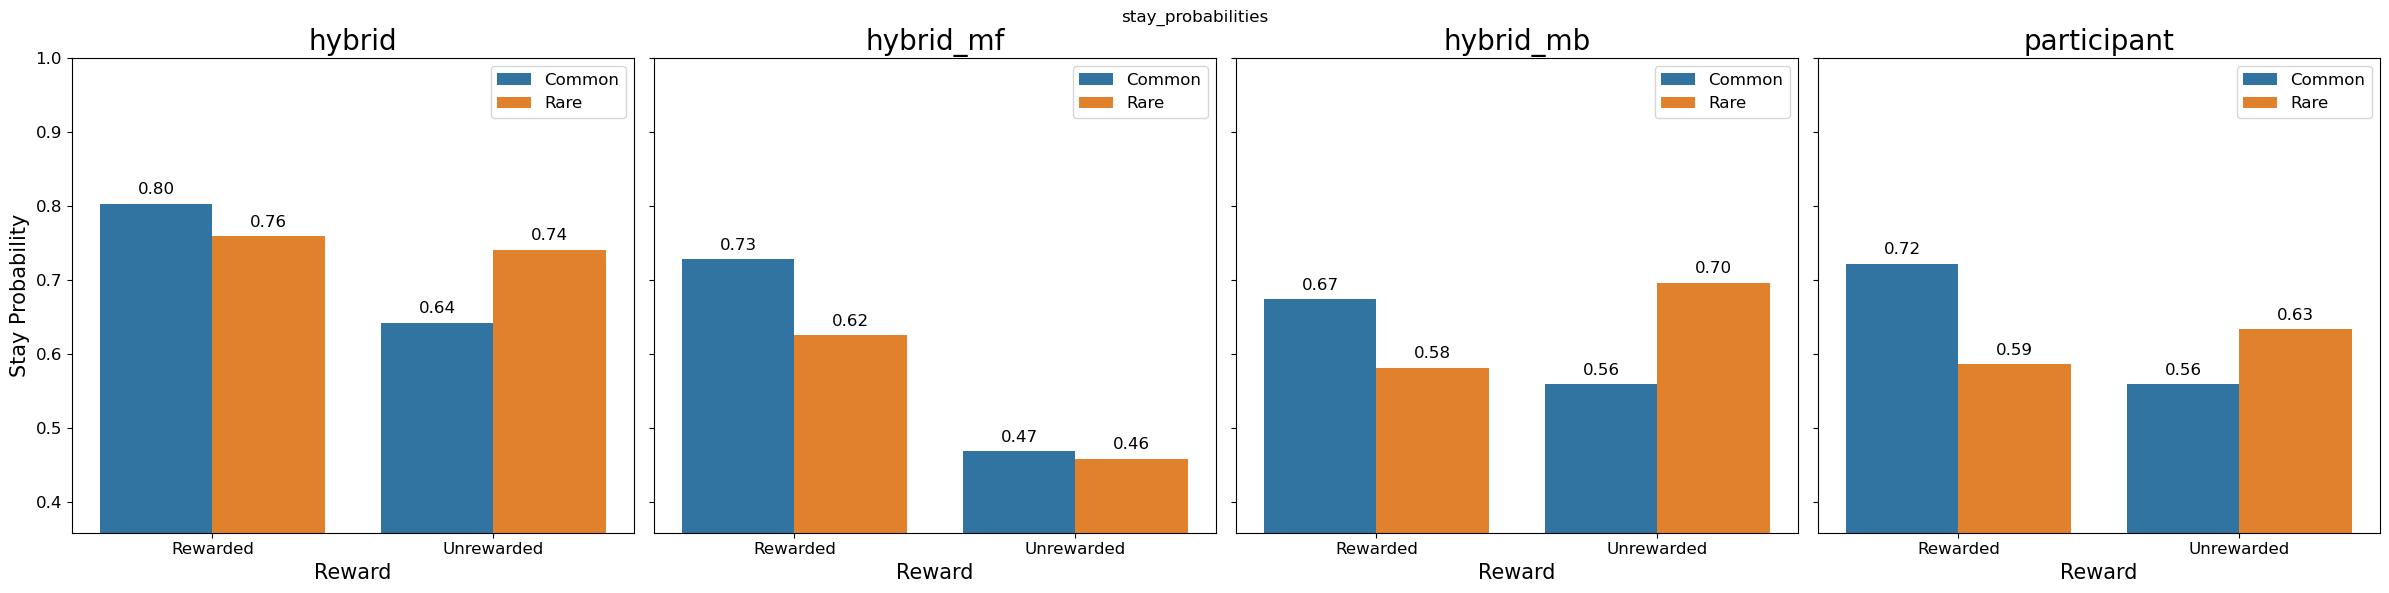

In [20]:
# plot stay probabilities
stay_probabilities = calc_plot_stay_probabilities(dfs=task_dfs, labels=model_names, title='stay_probabilities', max_plots_per_row=4)

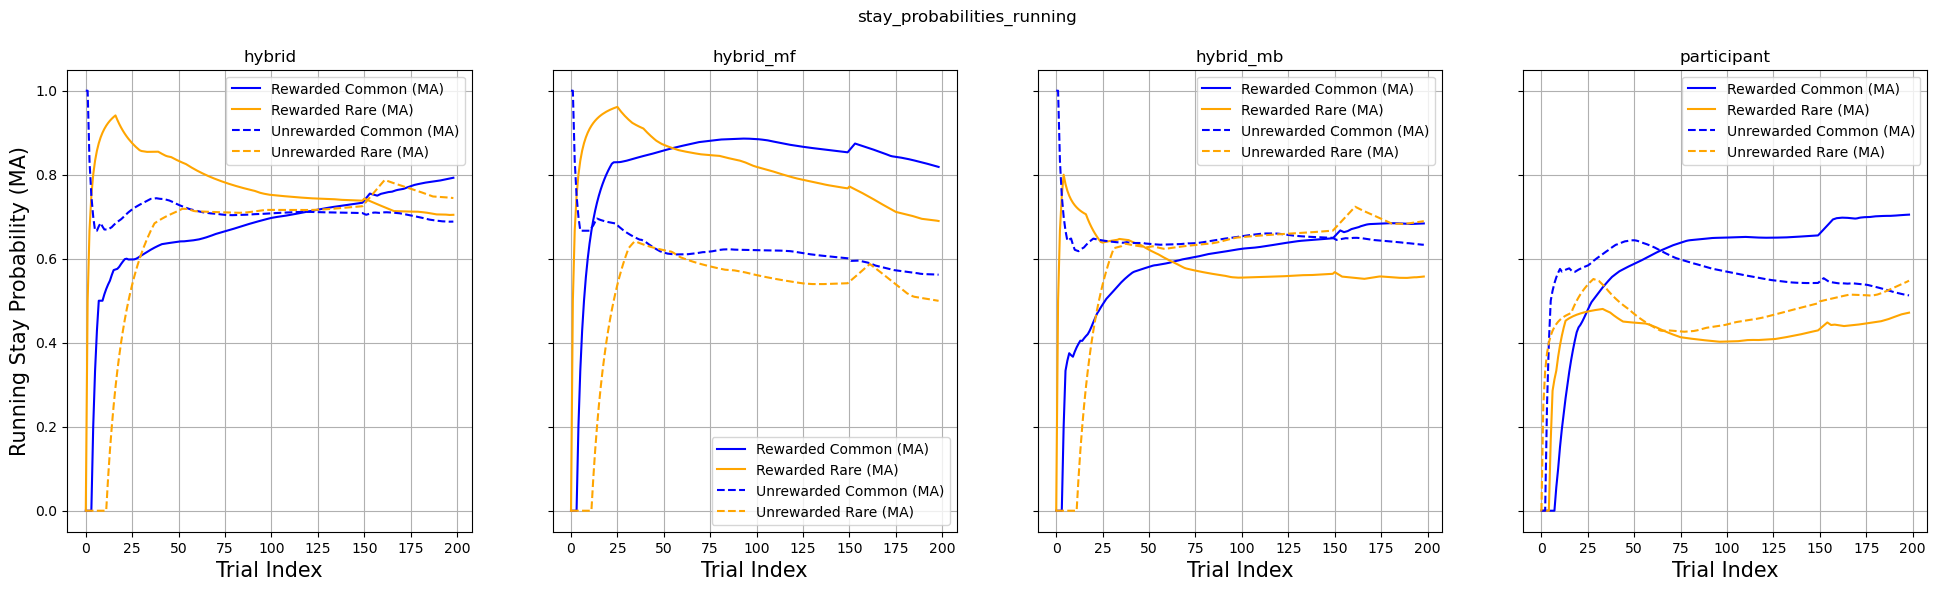

In [21]:
# plot stay probabilities smoothed moving average
window_size = 150
stay_probabilities_smoothed_ma = calc_plot_running_stay_probabilities(dfs=task_dfs, labels=model_names, title='stay_probabilities_running',
                                                                    window_size=window_size, max_plots_per_row=4)


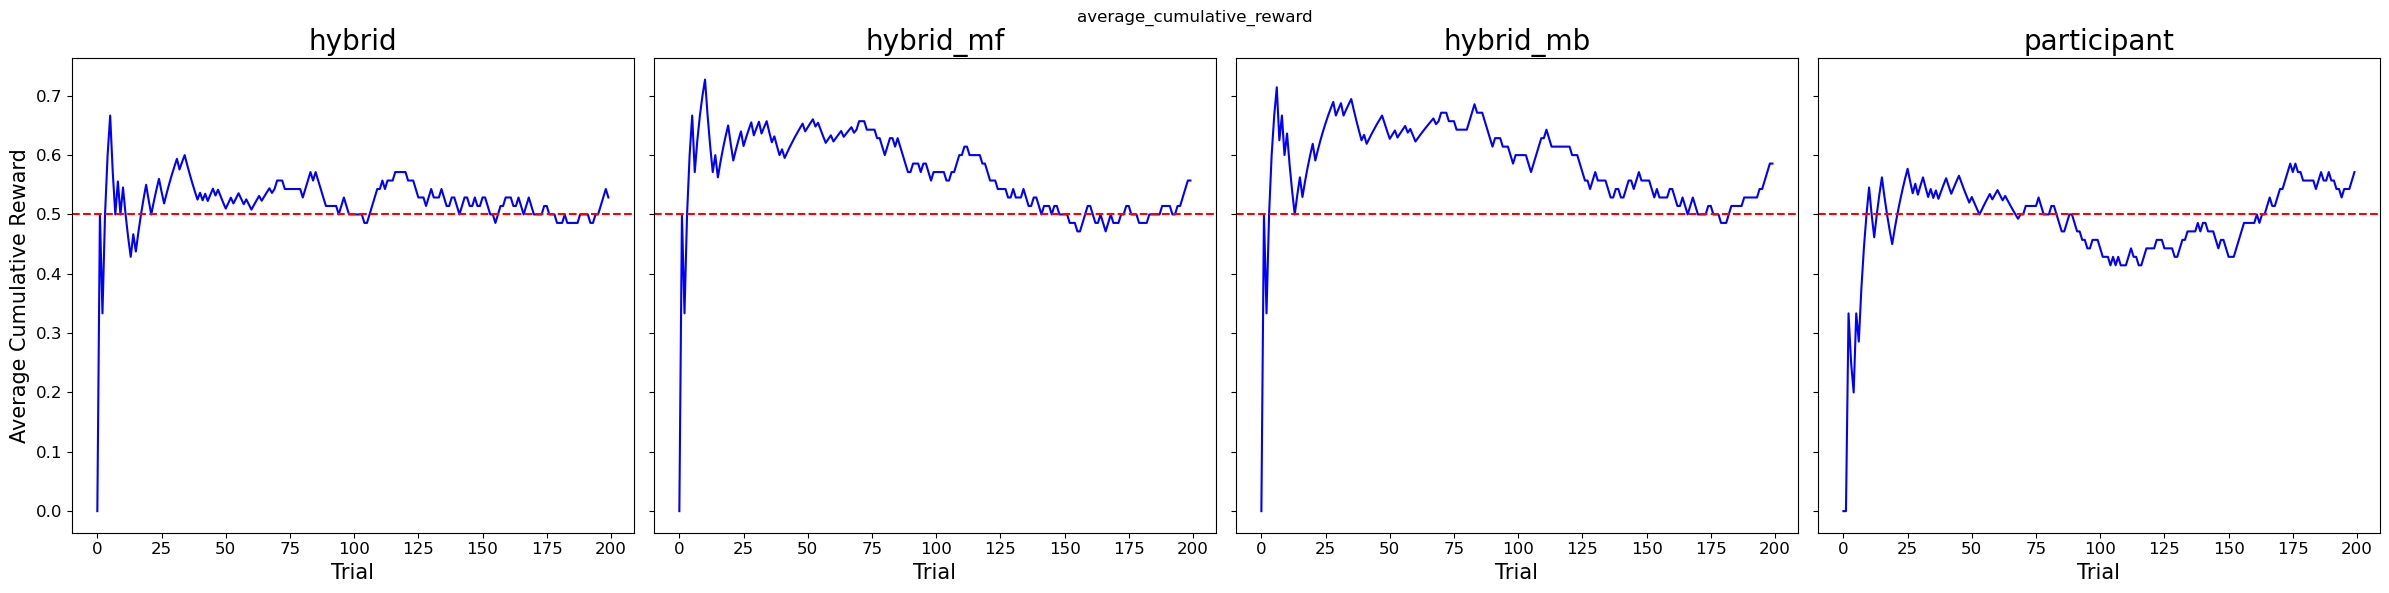

In [22]:
# plot the average cumulative rewards with moving window to emphasize trends over blocks of trials
window_size = 70
average_cumulative_rewards = calc_plot_running_average_cumulative_reward(dfs=task_dfs, labels=model_names, title='average_cumulative_reward',
                                                                        window_size=window_size, max_plots_per_row=4)

## Parameter Fitting *(4 points)*

For this exercise you should:

*   Set up a suitable parameter search space *(1 point)*

*   Implement a procedure to evaluate the fit of a model based on data *(2 points)*

*   Implement a procedure for searching the parameter space. *(1 point)*

Make sure to comment your code and provide an explanation for each code block in a preceding text block.



### <spin style="color: green">fitting procedures</spin>
For all the fitting procedures, we are using the (negative) log-likelihood of the data given the model as the objective.

We try fitting using grid search for the two simple models and random search and MCMC sampling for the hybrid model.  

First we plot the human data from the experiments.  


In [23]:
from parameter_fitting import fit_with_MCMC, fit_with_random_search, fit_with_grid_search
from parameter_fitting import plot_fit_results, plot_MCMC_chain_convergence, plot_samples_distribution
from utils import load_files_from_folder, preprocess_human_data

# for analysis and plotting
from behavioral_analysis import calculate_stay_probability, plot_stay_probabilities,\
                                calc_plot_stay_probabilities, calc_plot_running_average_cumulative_reward,\
                                calc_plot_running_stay_probabilities, calc_plot_stay_probability_paired_diffs 
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm


In [24]:
data_dir_group_1 = "data/participants/group_01"
data_dir_group_2 = "data/participants/group_02"
data_dir_group_3 = "data/participants/group_03"

data_g_1 = load_files_from_folder(data_dir_group_1)
data_g_2 = load_files_from_folder(data_dir_group_2)
data_g_3 = load_files_from_folder(data_dir_group_3)

In [25]:
data_g_1 = [preprocess_human_data(df) for df in data_g_1]
data_g_2 = [preprocess_human_data(df) for df in data_g_2]
data_g_3 = [preprocess_human_data(df) for df in data_g_3]
data_all_groups = data_g_1 + data_g_2 + data_g_3

Here we use low number of iterations since it's only for demonstration purposes <br>
In last part, we will fit all models to all participants with the best suited fitting procedure.

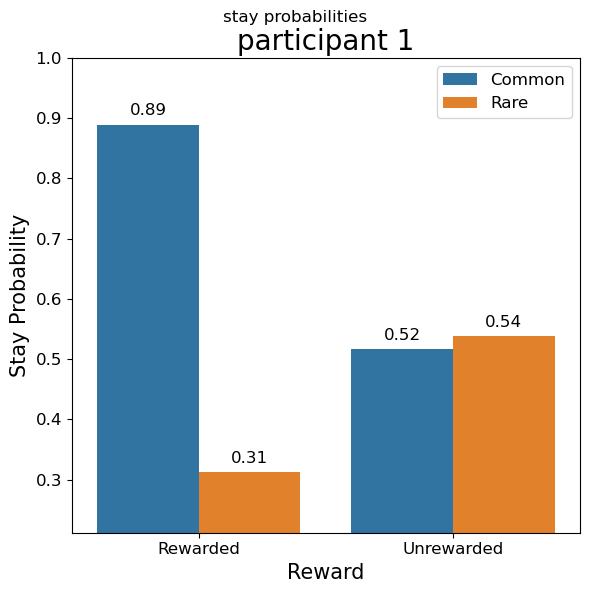

In [26]:
# pick a participant data for parameter fitting
data_index = 0
data = data_all_groups[data_index]
calc_plot_stay_probabilities(data, labels=[f'participant {data_index + 1}'], title=f"stay probabilities", return_df=False)

In [27]:
# hyperparameters for the fitting precedures

# for the log likelihood - same for all precedures
CONSIDER_BOTH_STAGES = True  # Consider both stage 1 and stage 2 behavior for fitting
#MCMC
NUM_SAMPLES = 200  # Number of samples for MCMC
NUM_BURN_IN = 50  # Number of burnin samples for MCMC
NUM_CHAINS = 4  # Number of chains for MCMC
# random search
NUM_ITERATIONS = NUM_CHAINS * (NUM_SAMPLES + NUM_BURN_IN)  # Number of iterations (same as MCMC total samples)

# Define parameter distributions for hybrid model and its tow special cases (model free and model based)
ALPHA_1_RANGE = (0.05, 0.85)
ALPHA_2_RANGE = (0.05, 0.85)
BETA_1_RANGE = (-1, 10) 
BETA_2_RANGE = (-1, 10)
LAMBDA_RANGE = (0.1, 0.9) # we avoide 0 and 1 since we are not aiming at hypothesising about the tow td lamda extremes
W_RANGE = (0.2, 0.8) # this should force the hybrid model to not settle on one of it's sub models 
                            # for the sub models we later fix the the w to either 0 or 1 ( pure free - based respectively )
P_RANGE = (-0.5, 0.5) # we don't want to encourage neither exesive perversion nor the opposite

param_space_hybrid = {
    'alpha_1': np.array(ALPHA_1_RANGE),
    'alpha_2': np.array(ALPHA_2_RANGE),
    'beta_1': np.array(BETA_1_RANGE),
    'beta_2': np.array(BETA_2_RANGE),
    '_lambda': np.array(LAMBDA_RANGE),
    'w': np.array(W_RANGE),
    'p': np.array(P_RANGE)
}

# param space for hybrid special cases
# pure model free from hybrid -> w = 0
param_space_hybrid_mf = param_space_hybrid.copy() 
param_space_hybrid_mf['w'] = np.array([0.0])

# pure model based from hybrid -> w = 1 and alpha_1 and lambda are arbitrary so we fix them as well to avoid wasting time fitting them 
param_space_hybrid_mb = param_space_hybrid.copy()
param_space_hybrid_mb['w'] = np.array([1.0])
param_space_hybrid_mb['alpha_1'] = np.array([1.0])
param_space_hybrid_mb['_lambda'] = np.array([1.0])

#### Log Likelihood Calculation

we used the log likelihood of the data given the model as the objective function for fitting the models.<br>
we consider both stages choices and rewards in the log likelihood calculation.<br>
The implementation is in the belwo imported functions.<br>

In [28]:
from parameter_fitting import log_likelihood

### Fit the Models to the Human Data Using Grid Search, Random Search and MCMC Sampling

we implemented 2 fitting procedures for the models and we are using them under different conditions for their strenghs and weaknesses.<br>
### MCMC sampling: 
we used to fit the models to the participants data for the best suited parameters.<br>
### Random search:
we use to approximate large surfaces of the log likelihood and in computationally expensive precedures as in model recovery, because it's a bit faster than MCMC and it's performance is acceptable.<br>

#### Plotting the Results of the two simple models

In [29]:
# fit the hybrid agent
# random search
random_seed = 0 # set the random seed for reproducibility

rs_fitted_params_hybrid, rs_fitted_LL_hybrid, rs_all_results_hybrid = fit_with_random_search(param_space_hybrid, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES,
                                            num_iterations=NUM_ITERATIONS, seed=random_seed,
                                            show_progress=True)
# MCMC
mcmc_fitted_params_hybrid, mcmc_fitted_LL_hybrid, mcmc_all_results_hybrid = fit_with_MCMC(param_space_hybrid, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES,
                                            num_chains=NUM_CHAINS, num_samples=NUM_SAMPLES, num_burn_in=NUM_BURN_IN,
                                            show_progress=True)

random_search::   0%|          | 0/1000 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/4 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/250 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/250 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/250 [00:00<?, ?it/s]

Chain 4 ::   0%|          | 0/250 [00:00<?, ?it/s]

In [30]:
# fit pure model free from hybrid
# random search
random_seed = 0

rs_fitted_params_hybrid_mf, rs_fitted_LL_hybrid_mf, rs_all_results_hybrid_mf = fit_with_random_search(param_space_hybrid_mf, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES,
                                            num_iterations=NUM_ITERATIONS, seed=random_seed,
                                            show_progress=True)
# MCMC
mcmc_fitted_params_hybrid_mf, mcmc_fitted_LL_hybrid_mf, mcmc_all_results_hybrid_mf = fit_with_MCMC(param_space_hybrid_mf, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES,
                                            num_chains=NUM_CHAINS, num_samples=NUM_SAMPLES, num_burn_in=NUM_BURN_IN,
                                            show_progress=True)

random_search::   0%|          | 0/1000 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/4 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/250 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/250 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/250 [00:00<?, ?it/s]

Chain 4 ::   0%|          | 0/250 [00:00<?, ?it/s]

In [31]:
# fit pure model based from hybrid
# random search
random_seed = 0

rs_fitted_params_hybrid_mb, rs_fitted_LL_hybrid_mb, rs_all_results_hybrid_mb = fit_with_random_search(param_space_hybrid_mb, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES,
                                            num_iterations=NUM_ITERATIONS, seed=random_seed,
                                            show_progress=True)
# MCMC
mcmc_fitted_params_hybrid_mb, mcmc_fitted_LL_hybrid_mb, mcmc_all_results_hybrid_mb = fit_with_MCMC(param_space_hybrid_mb, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES,
                                            num_chains=NUM_CHAINS, num_samples=NUM_SAMPLES, num_burn_in=NUM_BURN_IN,
                                            show_progress=True)

random_search::   0%|          | 0/1000 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/4 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/250 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/250 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/250 [00:00<?, ?it/s]

Chain 4 ::   0%|          | 0/250 [00:00<?, ?it/s]

### plot the results of the pure model-based ( heathmaps of LL for all pairs of parameters around the best 10% of the other parameters)

Parameter alpha_1 is fixed at 1.0
Parameter _lambda is fixed at 1.0
Parameter w is fixed at 1.0


2D slices::   0%|          | 0/6 [00:00<?, ?it/s]

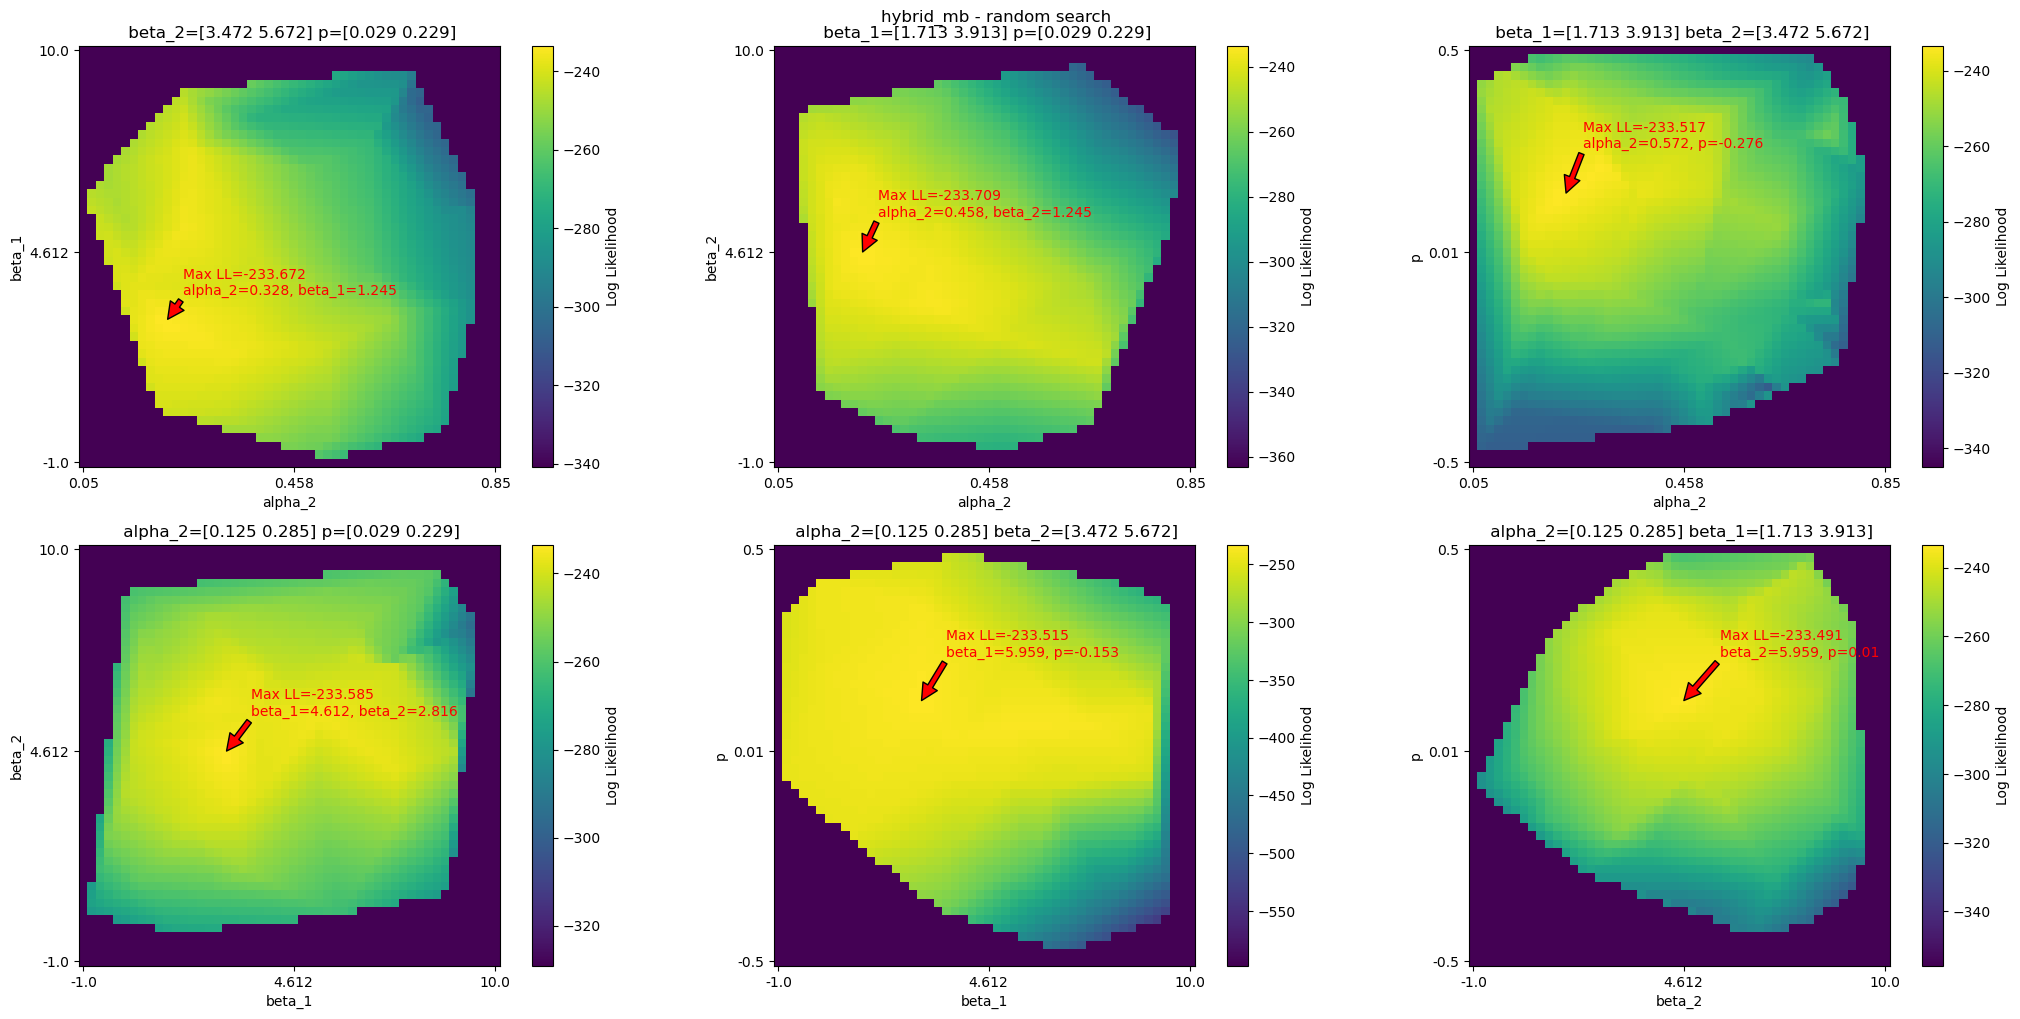

Parameter alpha_1 is fixed at 1.0
Parameter _lambda is fixed at 1.0
Parameter w is fixed at 1.0


2D slices::   0%|          | 0/6 [00:00<?, ?it/s]

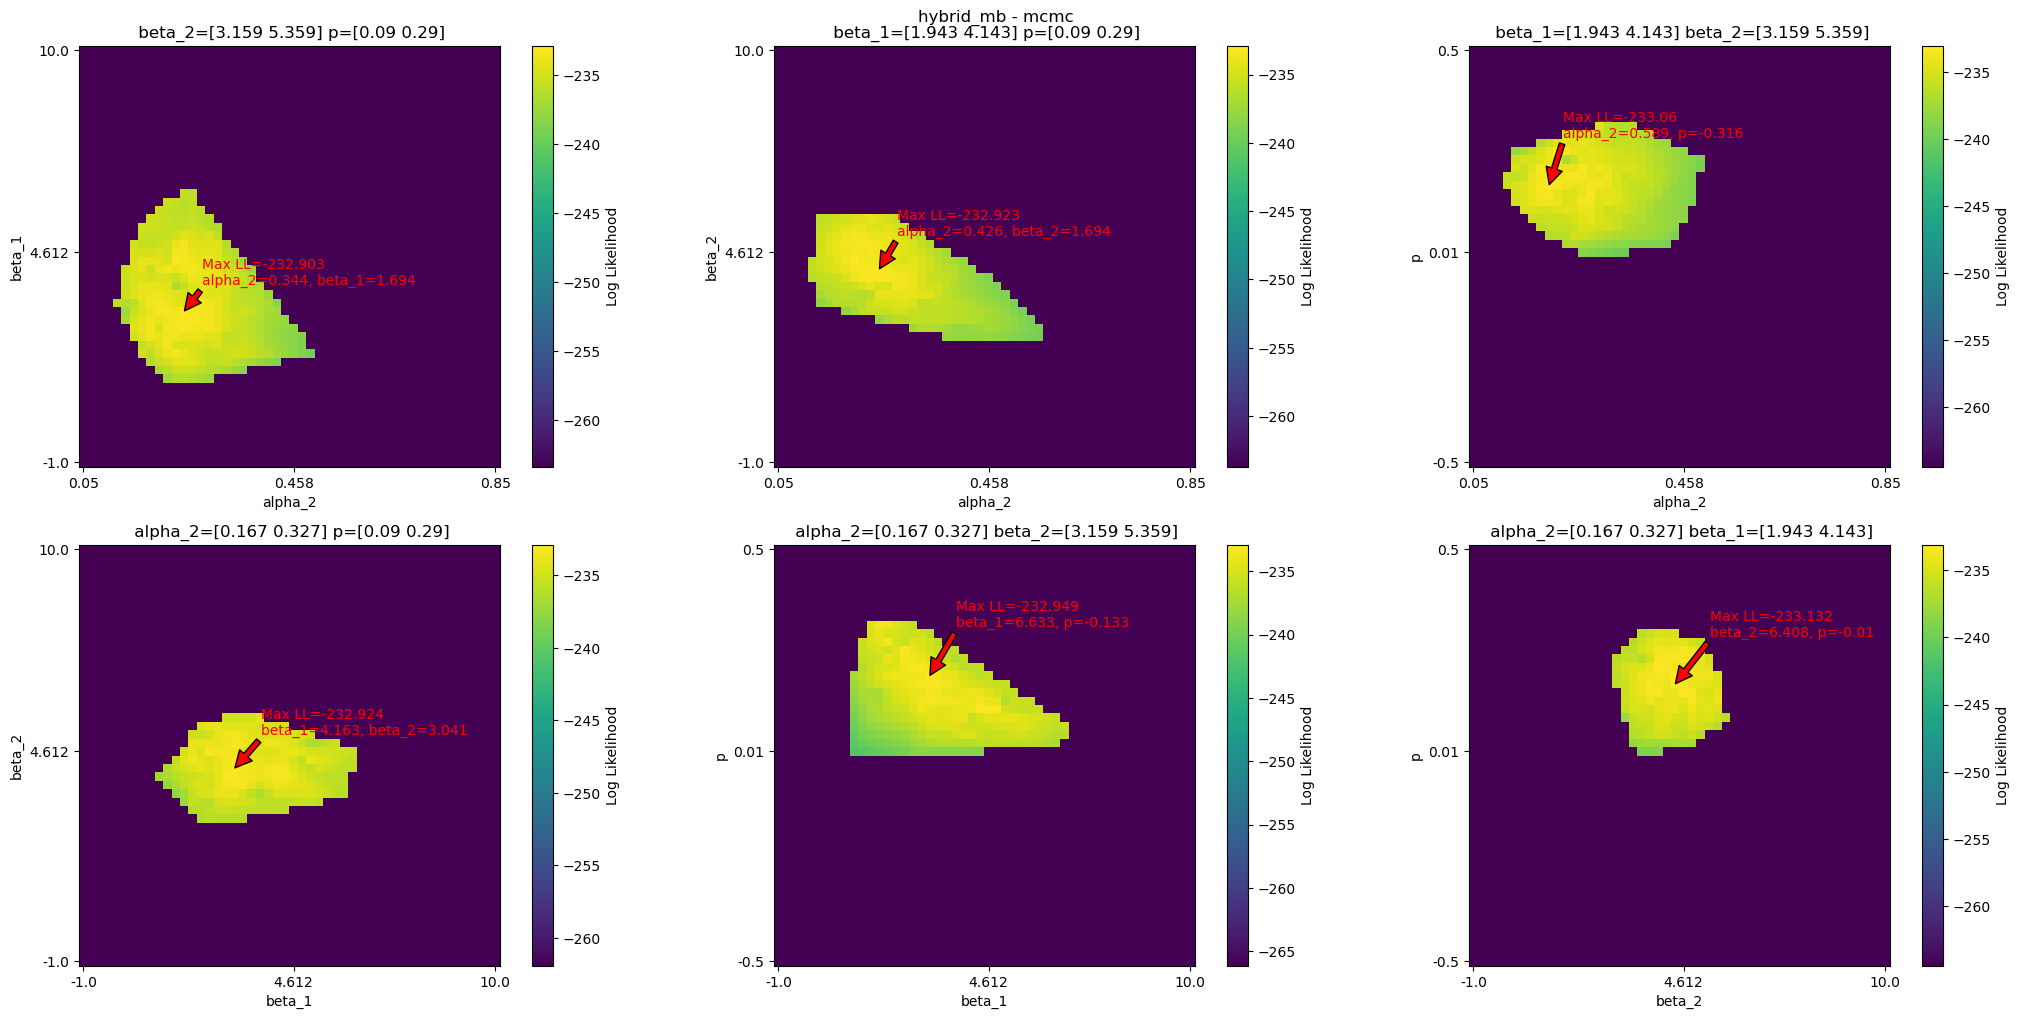

In [32]:
plot_fit_results(rs_all_results_hybrid_mb, param_space_hybrid_mb, title='hybrid_mb - random search')
plot_fit_results(mcmc_all_results_hybrid_mb, param_space_hybrid_mb, title='hybrid_mb - mcmc')

### Plot MCMC chains convergence

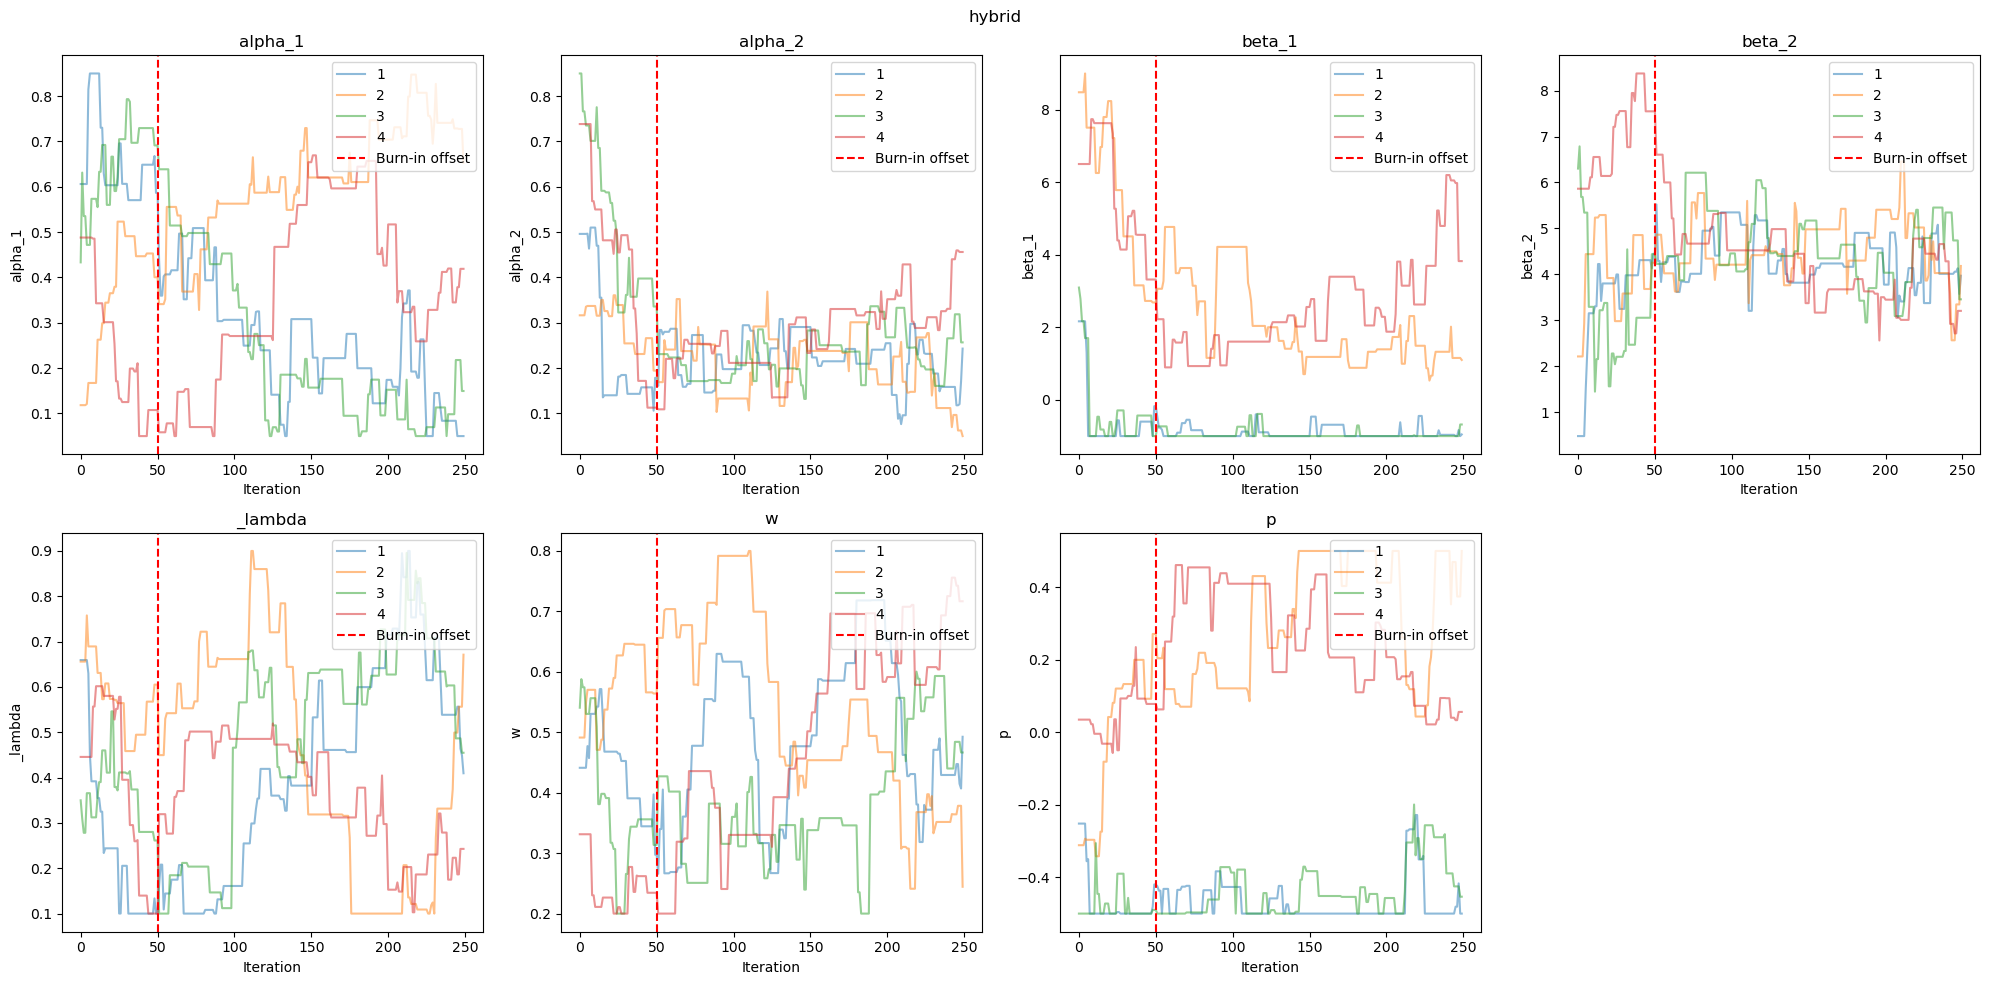

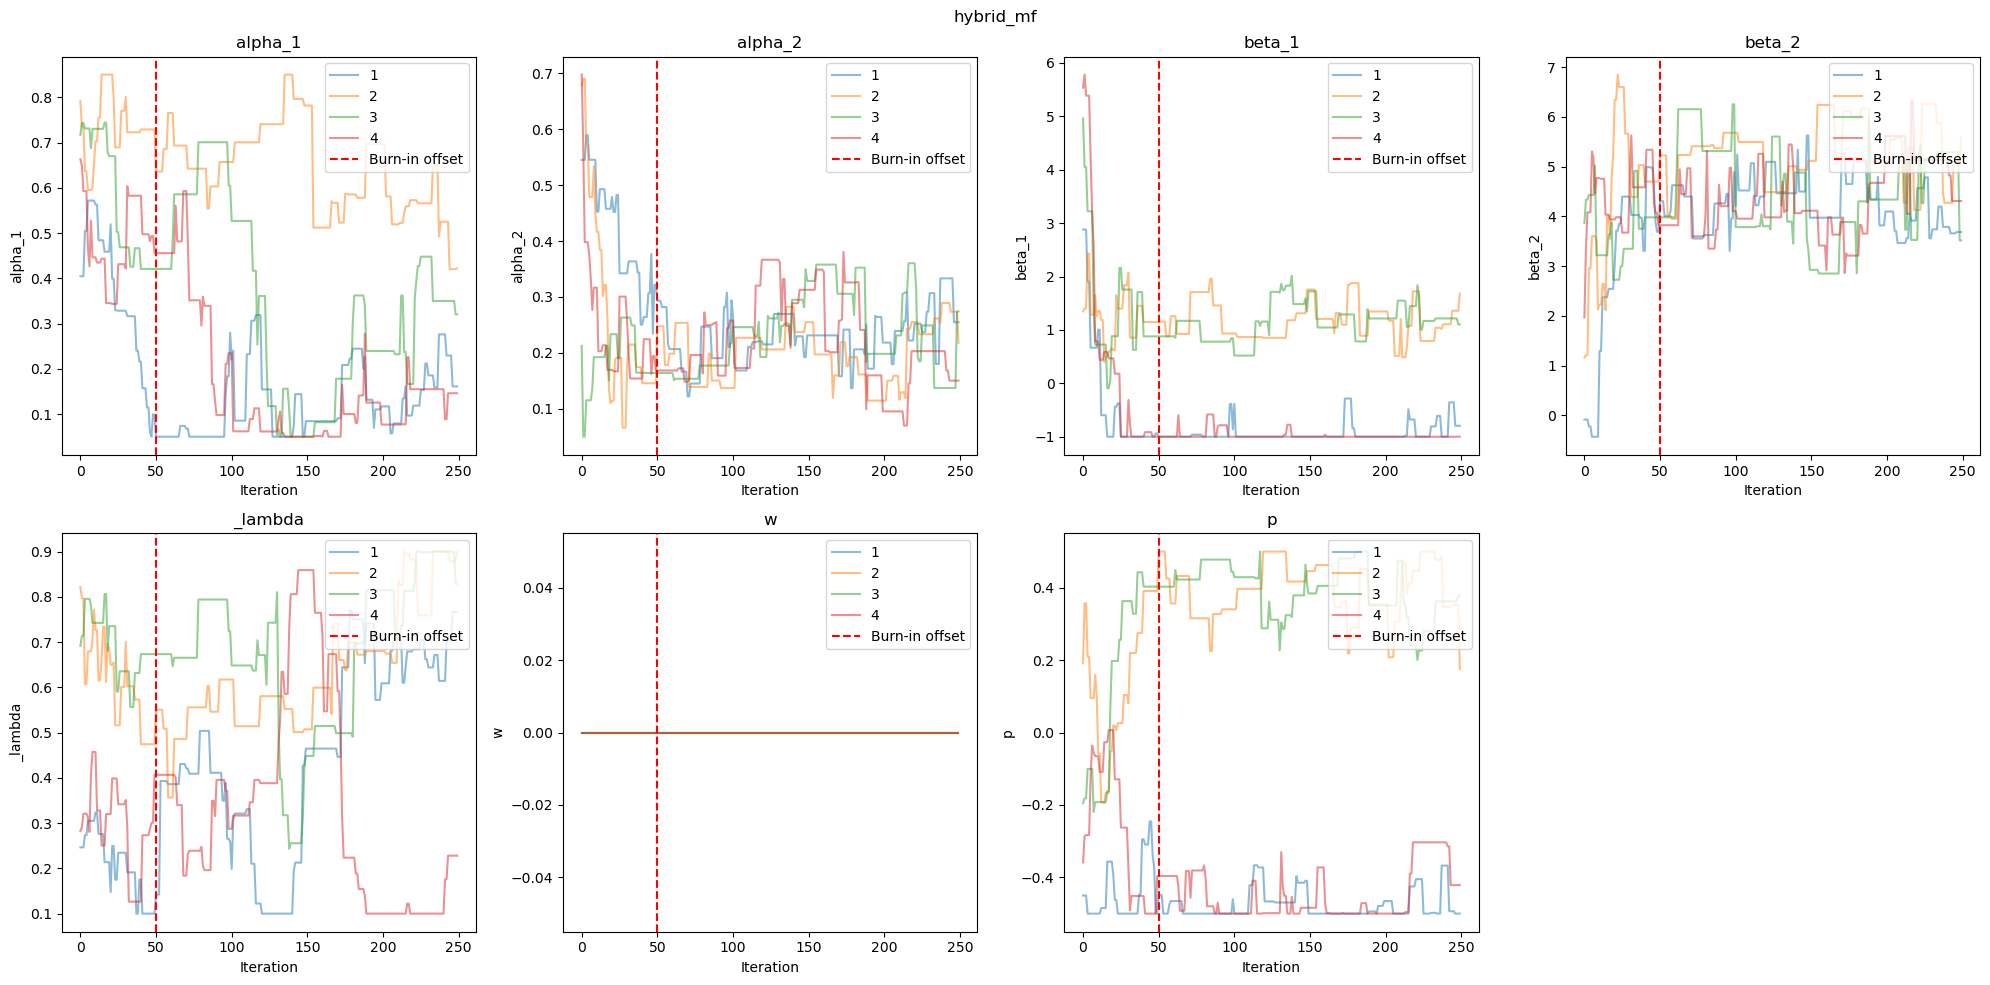

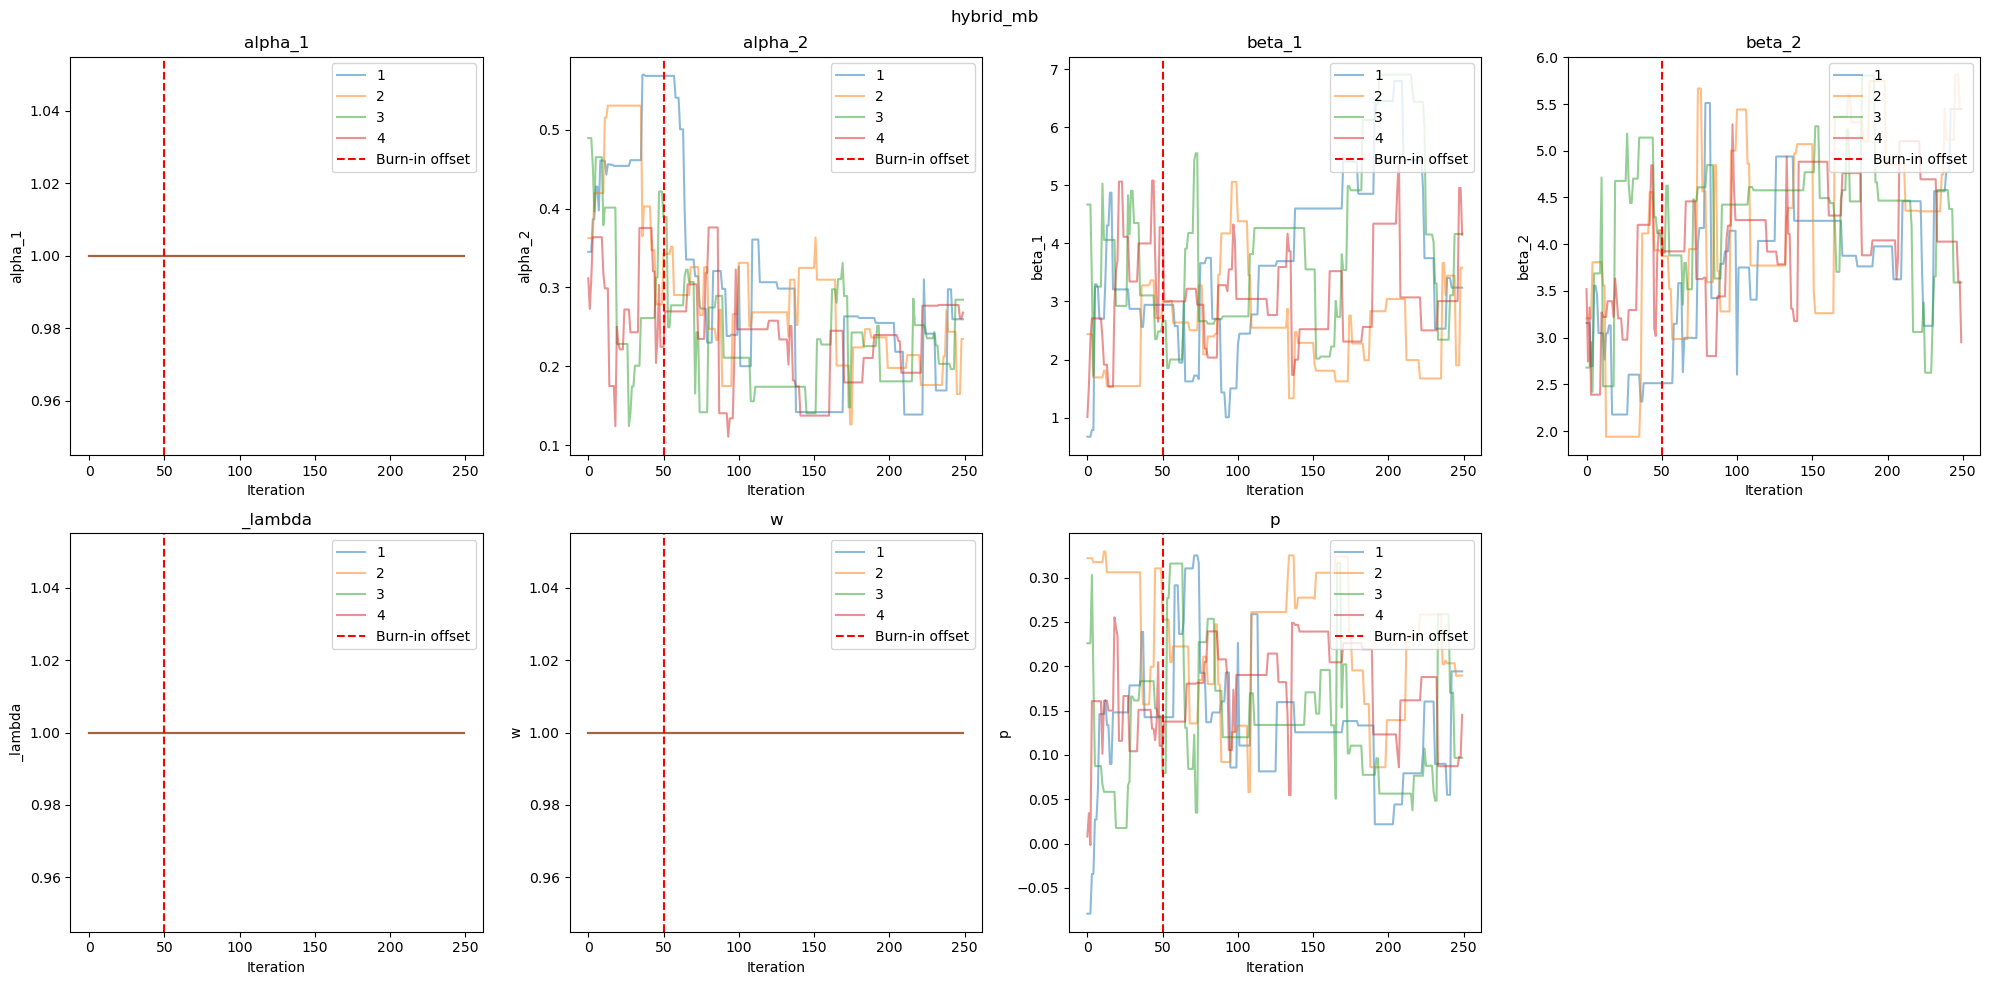

In [33]:
# plot the MCMC chain convergence
plot_MCMC_chain_convergence(mcmc_all_results_hybrid, title='hybrid')
plot_MCMC_chain_convergence(mcmc_all_results_hybrid_mf, title='hybrid_mf')
plot_MCMC_chain_convergence(mcmc_all_results_hybrid_mb, title='hybrid_mb')

### Plot samples distribution

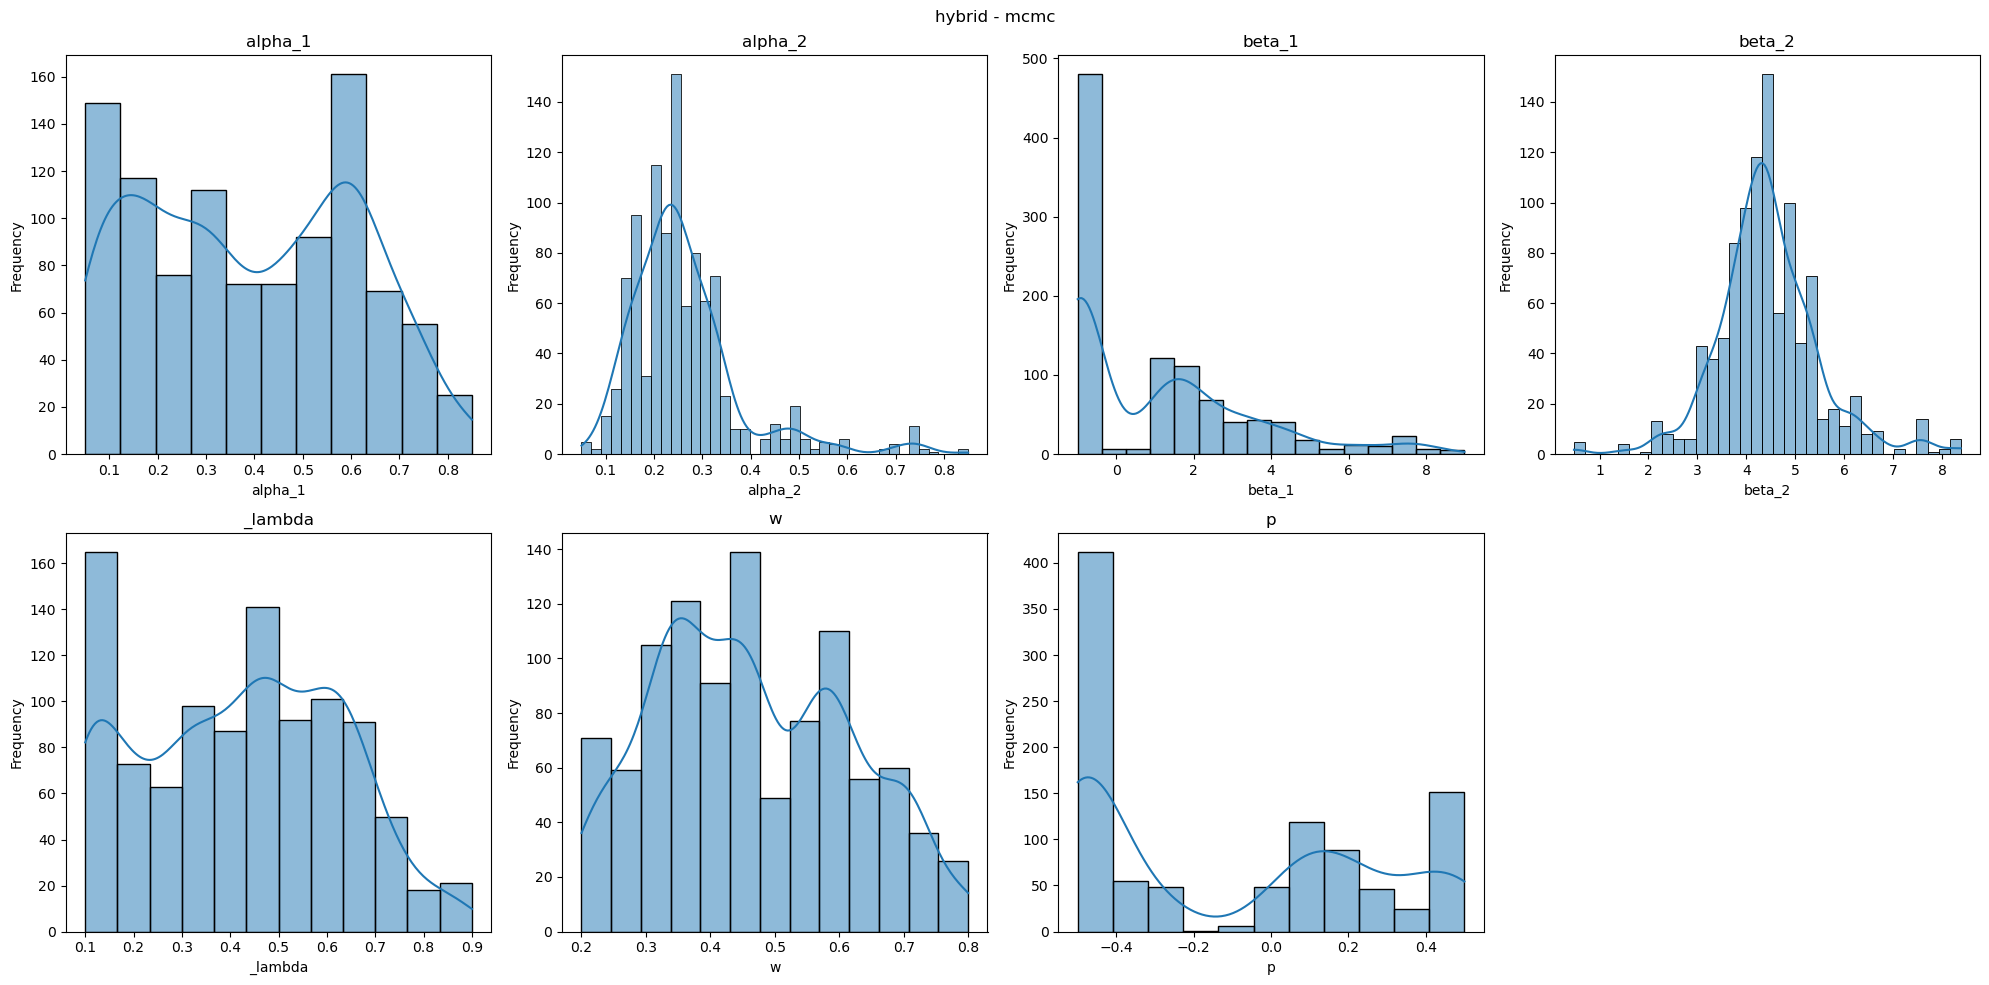

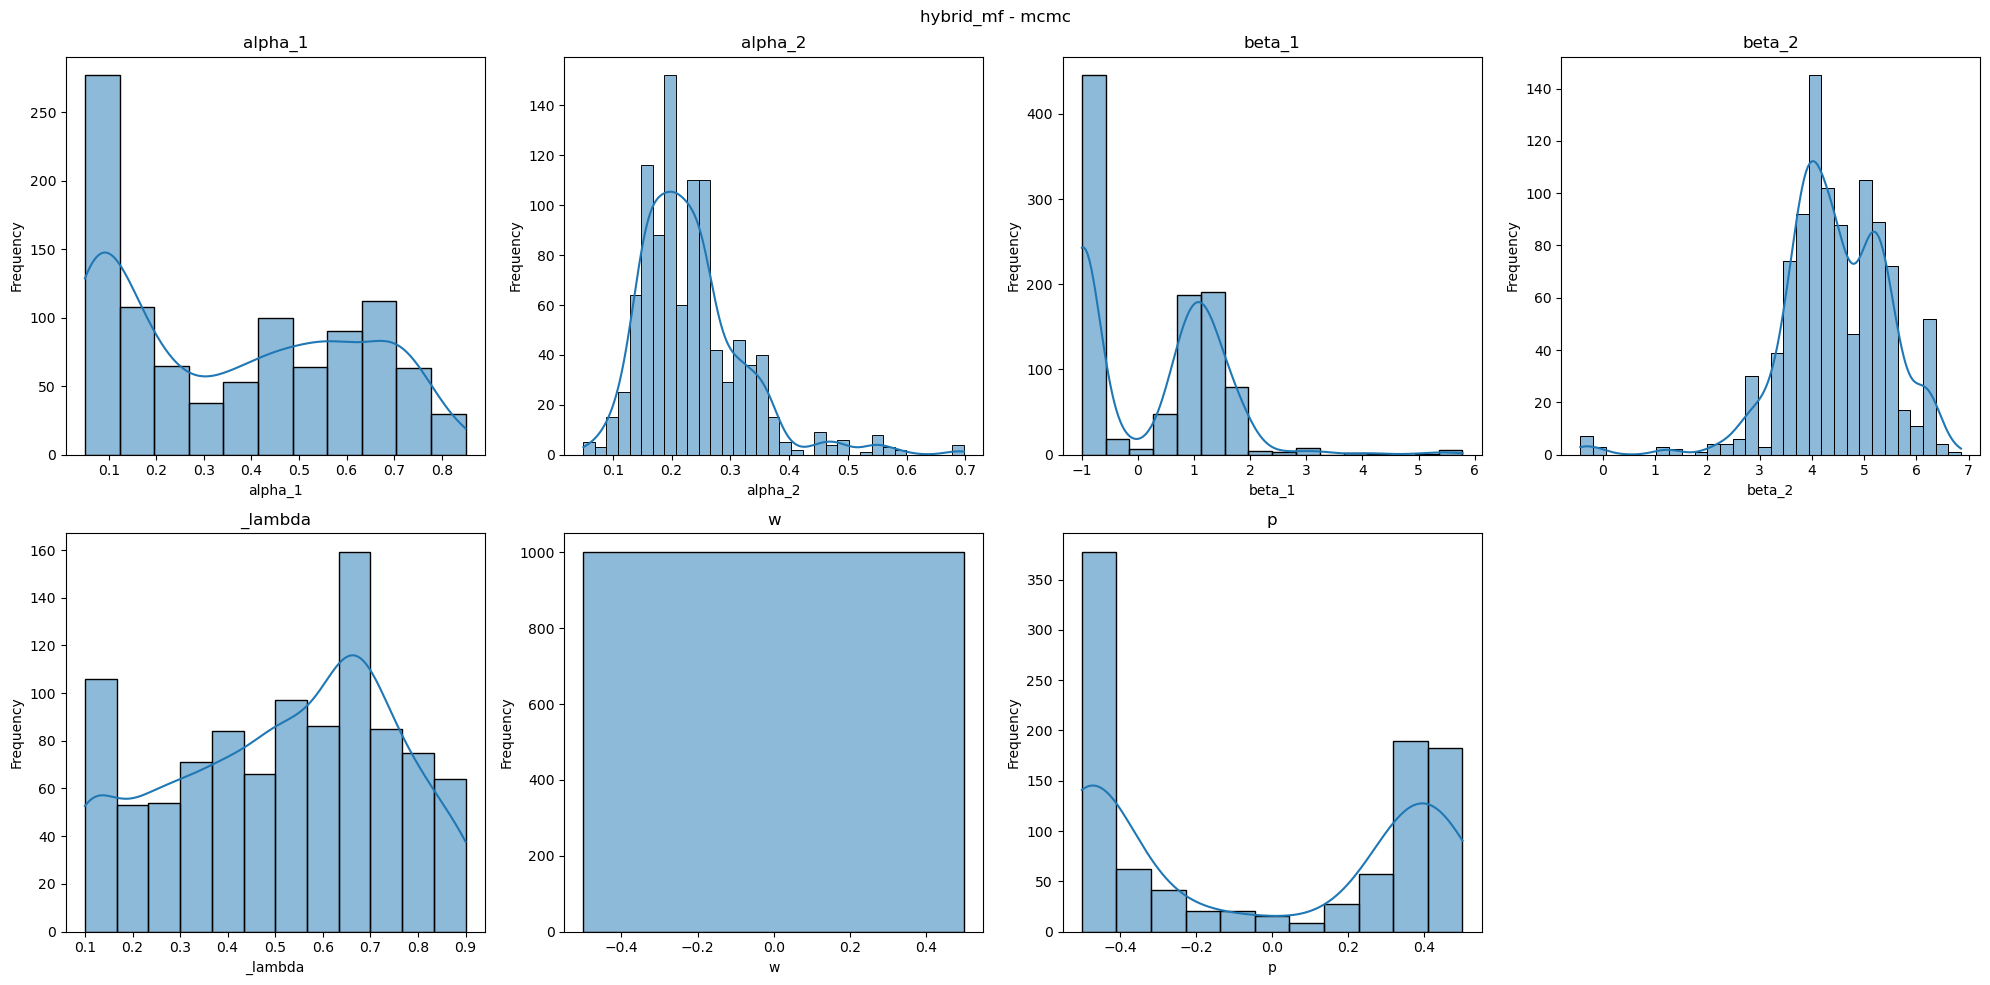

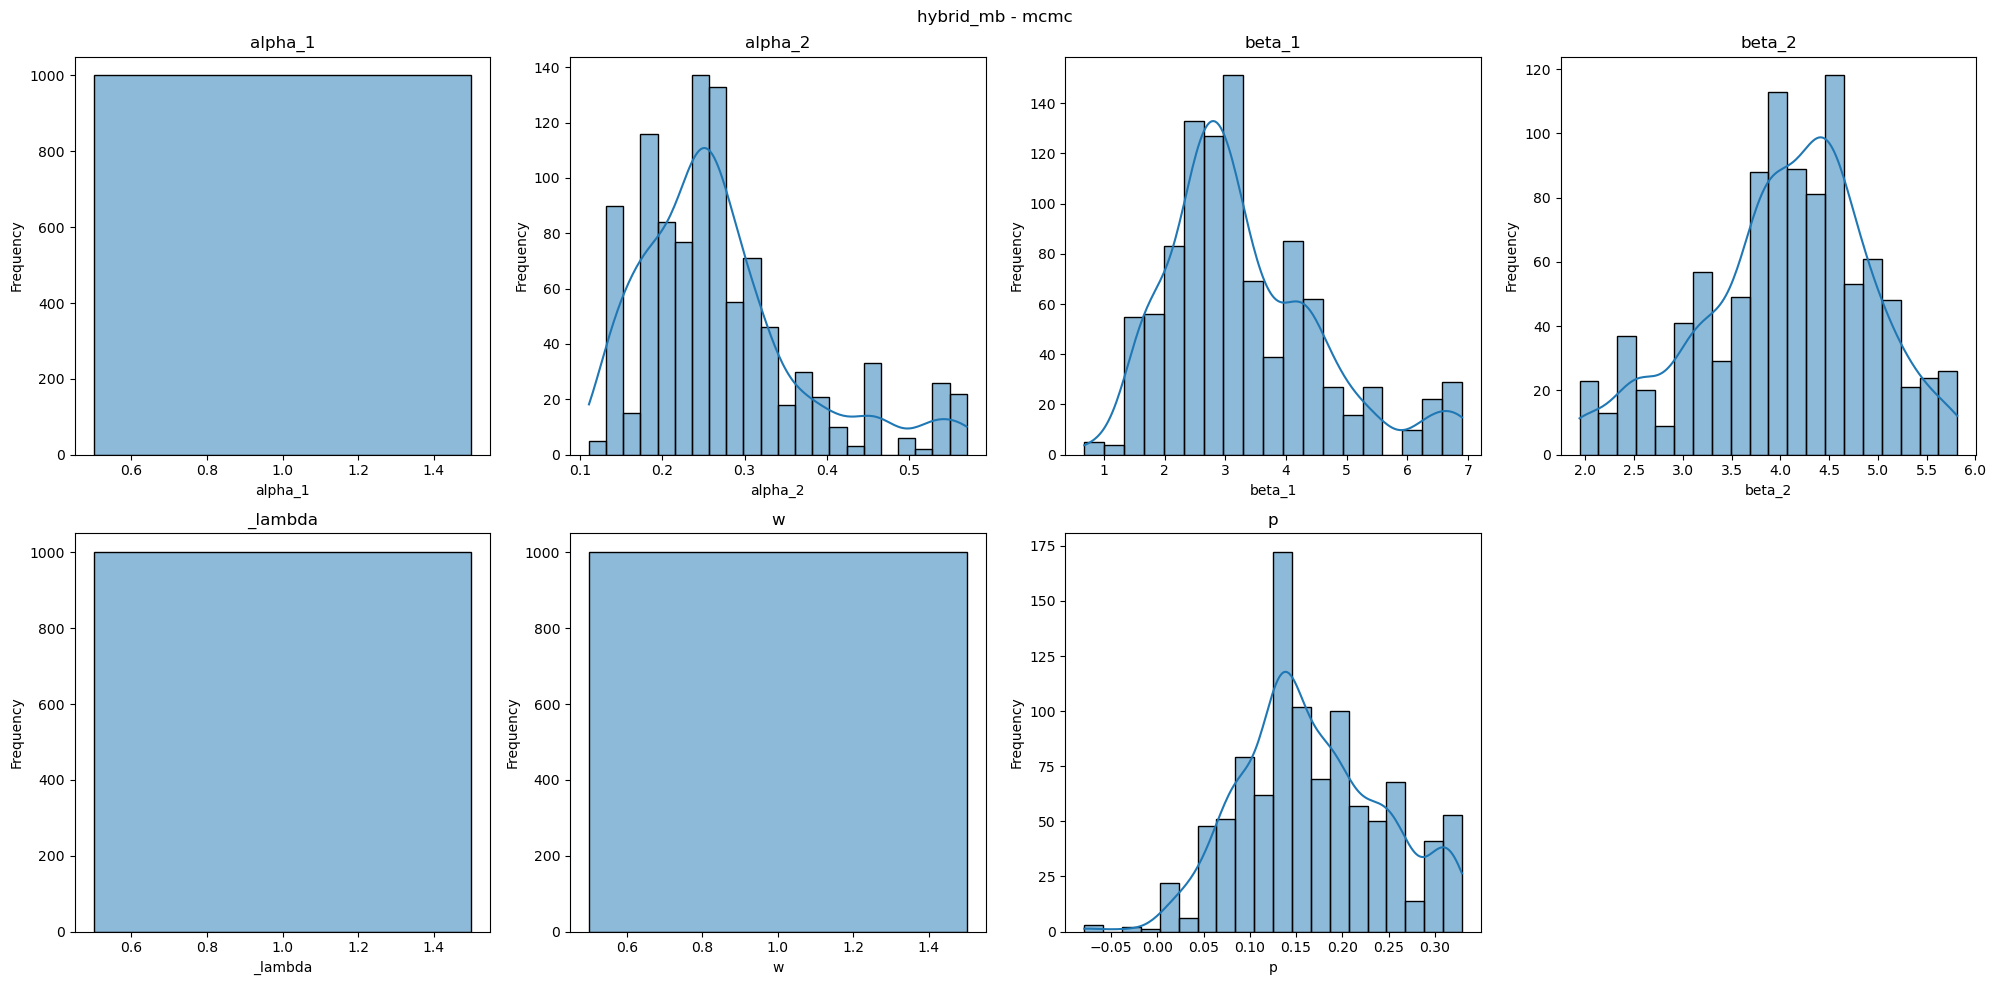

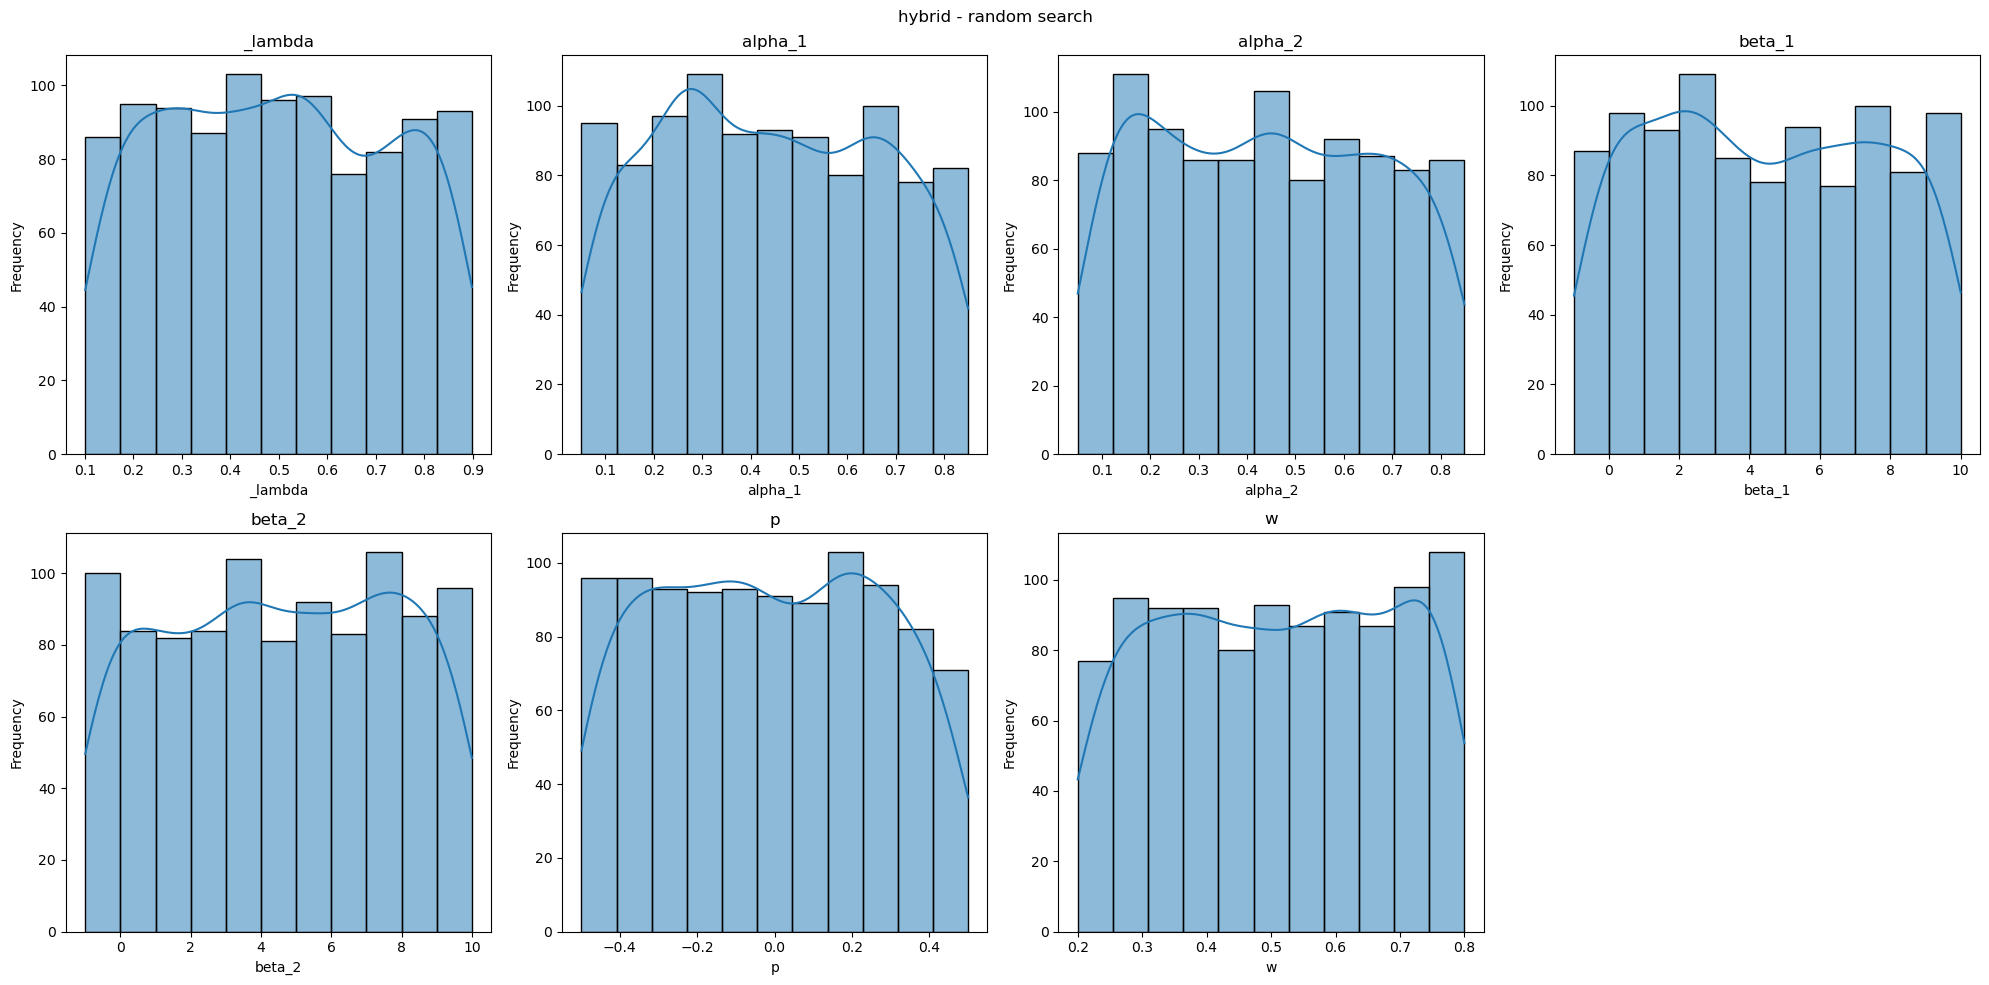

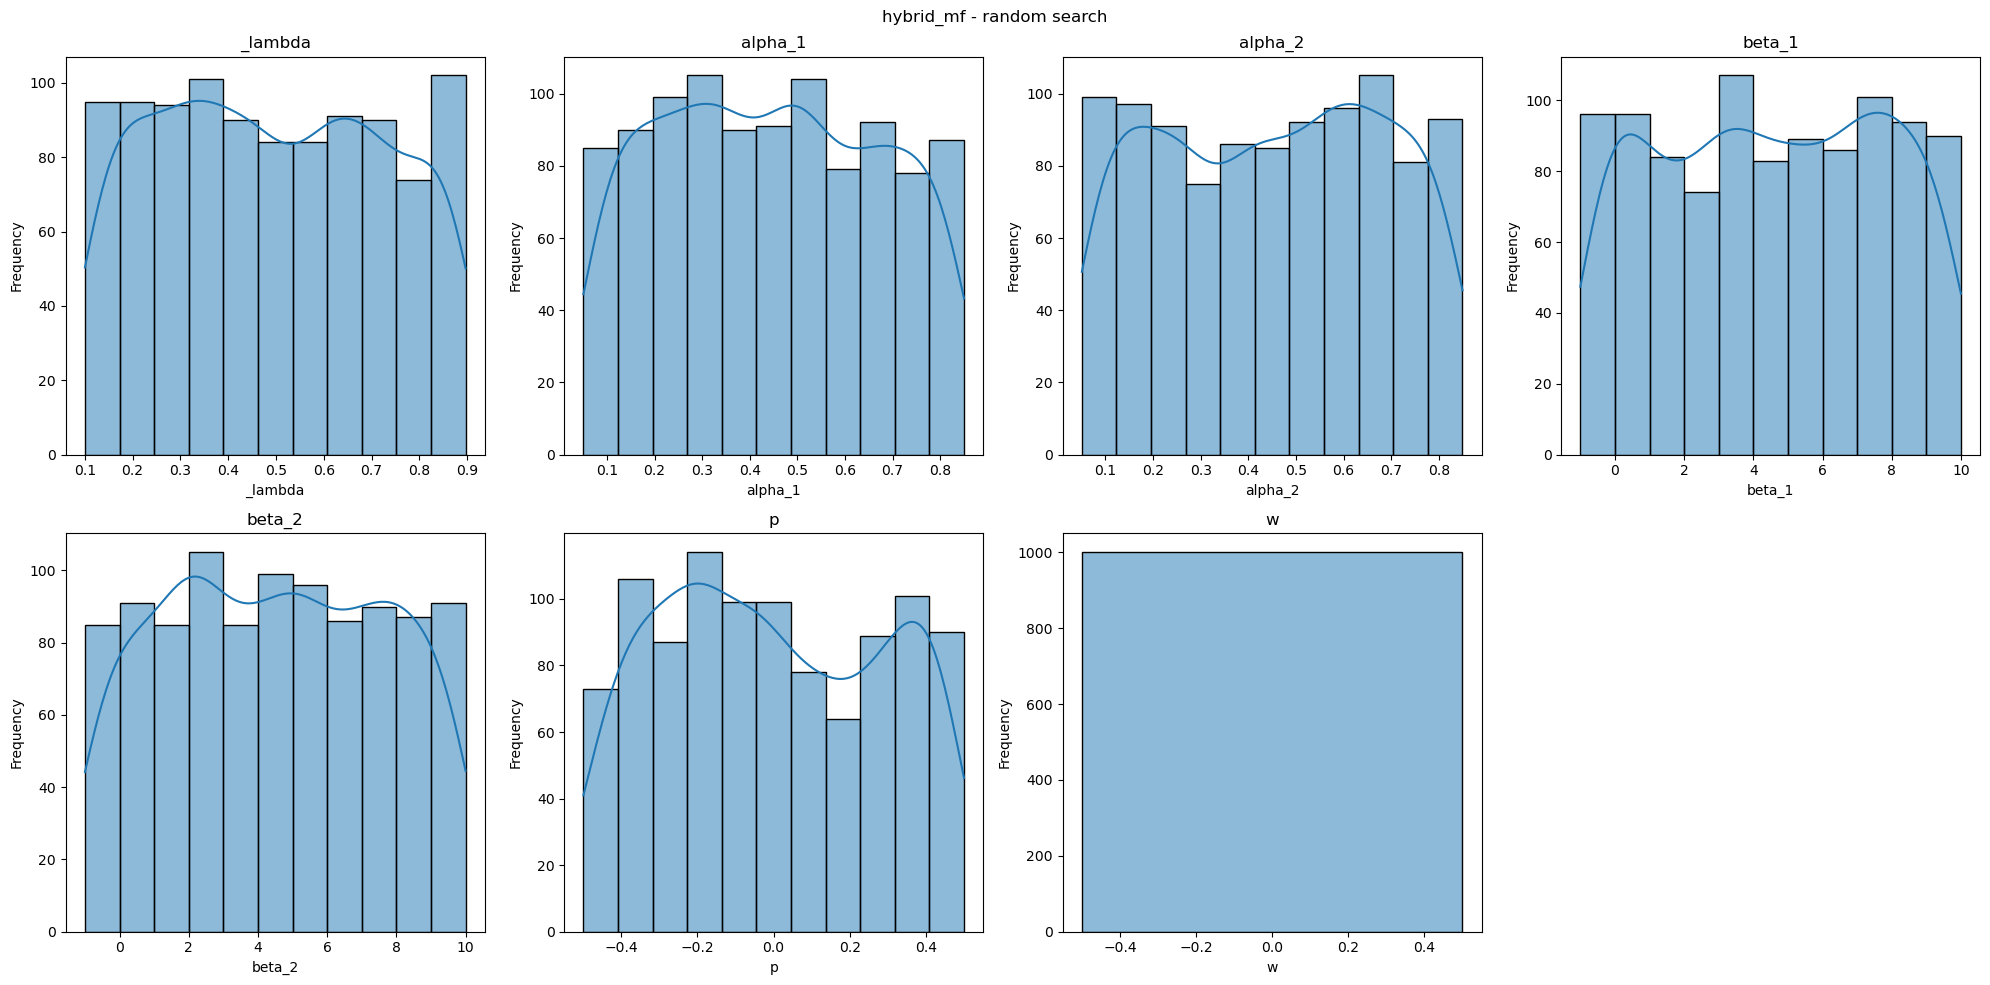

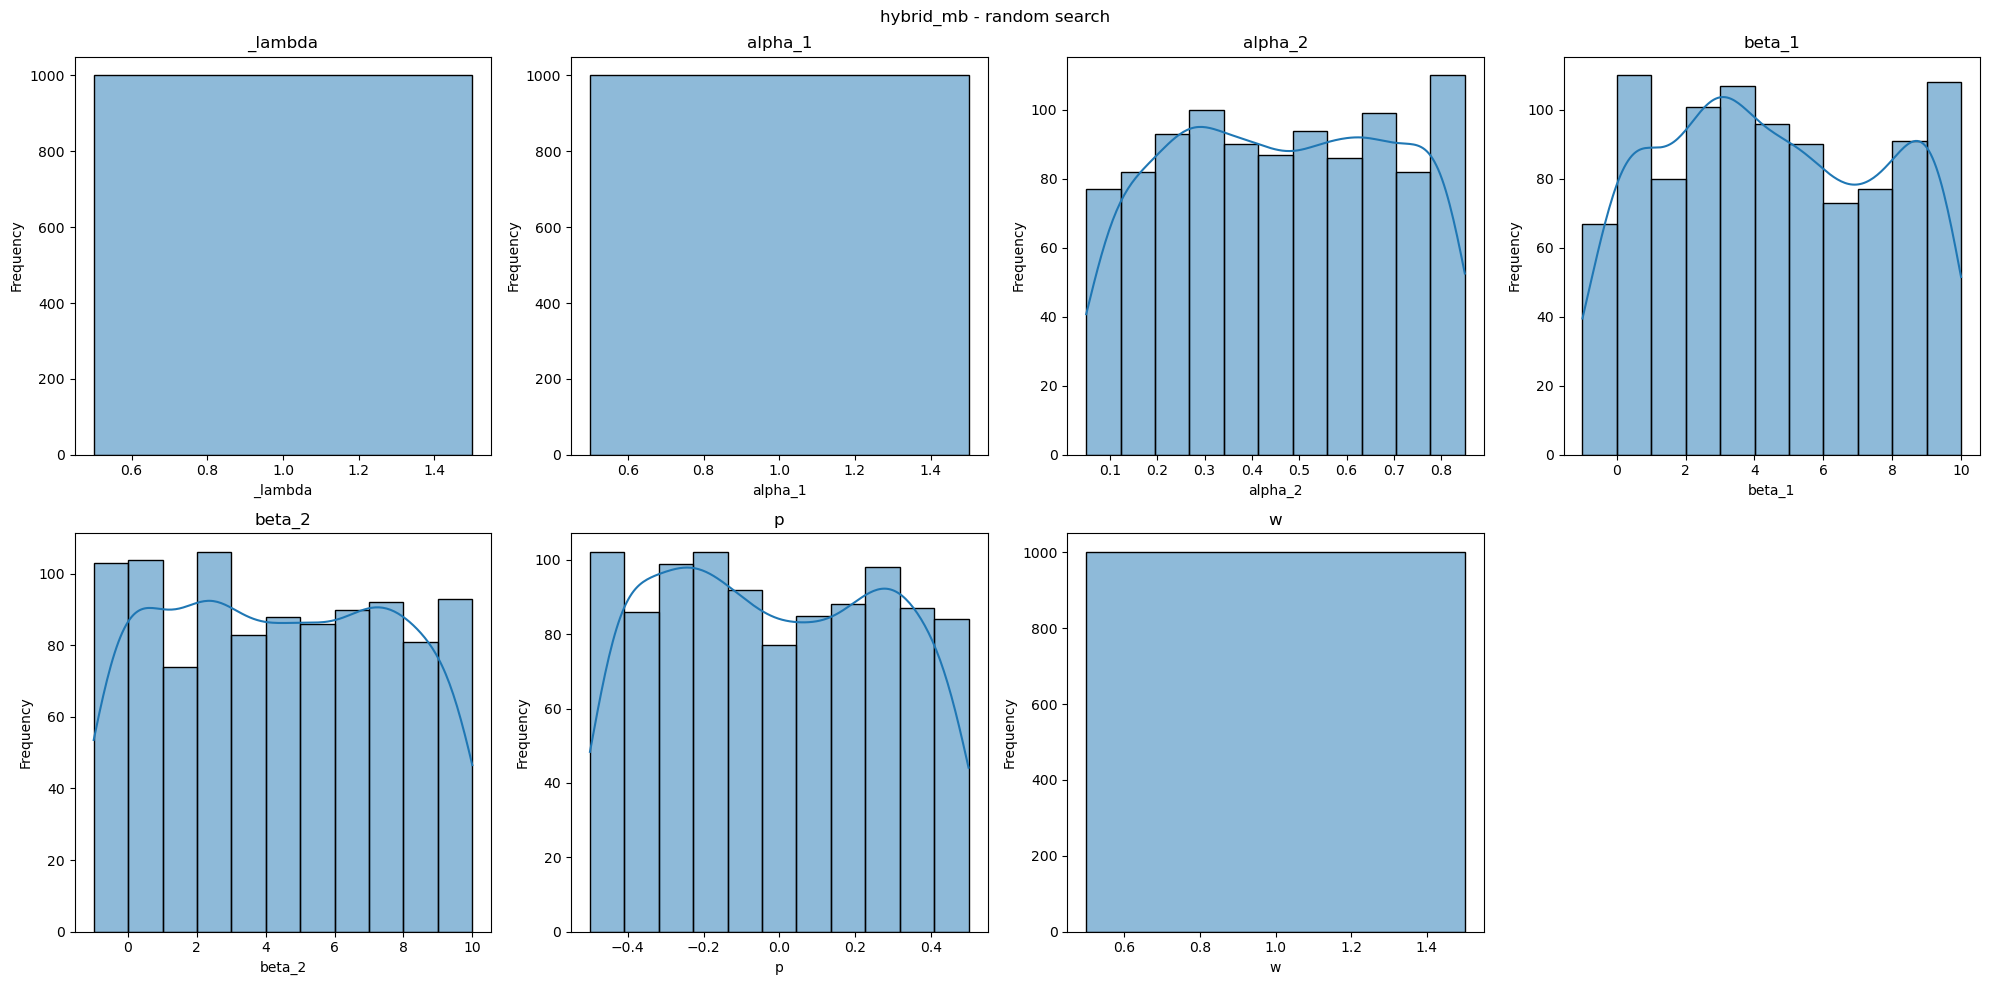

In [34]:
# plot the samples distribution
# MCMC
plot_samples_distribution(mcmc_all_results_hybrid, title='hybrid - mcmc')
plot_samples_distribution(mcmc_all_results_hybrid_mf, title='hybrid_mf - mcmc')
plot_samples_distribution(mcmc_all_results_hybrid_mb, title='hybrid_mb - mcmc')
# random search
plot_samples_distribution(rs_all_results_hybrid, title='hybrid - random search')
plot_samples_distribution(rs_all_results_hybrid_mf, title='hybrid_mf - random search')
plot_samples_distribution(rs_all_results_hybrid_mb, title='hybrid_mb - random search')

In [35]:
# put all results in a dataframe for easier comparison
all_fitted_params = [rs_fitted_params_hybrid, rs_fitted_params_hybrid_mf, rs_fitted_params_hybrid_mb,
                            mcmc_fitted_params_hybrid, mcmc_fitted_params_hybrid_mf, mcmc_fitted_params_hybrid_mb]
all_fitted_LL = [rs_fitted_LL_hybrid, rs_fitted_LL_hybrid_mf, rs_fitted_LL_hybrid_mb,
                        mcmc_fitted_LL_hybrid, mcmc_fitted_LL_hybrid_mf, mcmc_fitted_LL_hybrid_mb]
all_model_names = ['hybrid', 'hybrid_mf', 'hybrid_mb', 'hybrid', 'hybrid_mf', 'hybrid_mb']
all_fitting_procedures = ['random_search', 'random_search', 'random_search', 'MCMC', 'MCMC', 'MCMC']

# For hybrid models
params_df = pd.DataFrame(all_fitted_params)
fit_results_hybrid_models = pd.DataFrame({
    "Model Type": all_model_names,
    "Fitting Procedure": all_fitting_procedures,
    "Best LL": all_fitted_LL
})
fit_results_all_models = pd.concat([fit_results_hybrid_models, params_df], axis=1)

# for disply purposes:
# - replace NaN with '-' and save it to another variable
fit_results_all_models_display = fit_results_all_models.fillna('-')
# drop the chain and burn_in columns
fit_results_all_models_display = fit_results_all_models_display.drop(columns=['chain', 'burn_in'])
# - for the pure model based from hybrid, replace the arbtirary parameter values (alpha_1, _lambda) with '-'
hybrid_mb_mask = fit_results_all_models_display['Model Type'] == 'hybrid_mb'
fit_results_all_models_display.loc[hybrid_mb_mask, 'alpha_1'] = '-'
fit_results_all_models_display.loc[hybrid_mb_mask, '_lambda'] = '-'

display(fit_results_all_models_display)


/tmp/ipykernel_98180/2816067292.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  fit_results_all_models_display.loc[hybrid_mb_mask, 'alpha_1'] = '-'
/tmp/ipykernel_98180/2816067292.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  fit_results_all_models_display.loc[hybrid_mb_mask, '_lambda'] = '-'


Model Type Fitting Procedure     Best LL   _lambda   alpha_1   alpha_2  \
0     hybrid     random_search -234.423844  0.522172  0.240019  0.267045   
1  hybrid_mf     random_search -236.232517  0.201835  0.470647  0.163454   
2  hybrid_mb     random_search -233.427463         -         -  0.204668   
3     hybrid              MCMC -232.547777  0.720568  0.588186  0.263514   
4  hybrid_mf              MCMC -231.892348  0.580459  0.740628  0.206203   
5  hybrid_mb              MCMC -232.811074         -         -  0.247029   

     beta_1    beta_2         p         w  
0  1.838651  4.855524  0.203189  0.769568  
1  2.484037  5.893771  0.227544  0.000000  
2  2.812686  4.571849  0.129461  1.000000  
3  1.999712  4.499717  0.232359  0.583255  
4  0.851906  4.490401  0.500000  0.000000  
5  3.043193  4.258648  0.190113  1.000000

In [36]:
# get the best parameters for each model 
best_params_all_models =  fit_results_all_models.groupby('Model Type').apply(lambda x: x.loc[x['Best LL'].idxmax()]).reset_index(drop=True)
# for disply purposes, replace NaN with '-' and save it to another variable
best_params_all_models_display = fit_results_all_models_display.groupby('Model Type').apply(lambda x: x.loc[x['Best LL'].idxmax()]).reset_index(drop=True)
display(best_params_all_models_display)

Model Type Fitting Procedure     Best LL   _lambda   alpha_1   alpha_2  \
0     hybrid              MCMC -232.547777  0.720568  0.588186  0.263514   
1  hybrid_mb              MCMC -232.811074         -         -  0.247029   
2  hybrid_mf              MCMC -231.892348  0.580459  0.740628  0.206203   

     beta_1    beta_2         p         w  
0  1.999712  4.499717  0.232359  0.583255  
1  3.043193  4.258648  0.190113  1.000000  
2  0.851906  4.490401  0.500000  0.000000

In [37]:
# sample simulaiton data from the best parameters with different random seeds 
sample_size = 50
random_seeds = np.random.randint(1000 + sample_size ** 2, size=sample_size)
print('random_seeds:', random_seeds)

sampled_data_hybrid = []
sampled_data_hybrid_mf = []
sampled_data_hybrid_mb = []
for seed in tqdm(random_seeds, desc='Simulating samples'):
    # simulate models with best parameters
    for i, row in best_params_all_models.iterrows():
        model_type = row['Model Type']
        # get the parameters of the best models 
        params = row[['alpha_1', 'alpha_2', 'beta_1', 'beta_2', '_lambda', 'w', 'p']].to_dict()

        if model_type == 'hybrid':
            data_best_hybrid, agent_best_hybrid = simulate(agent_type='hybrid', params=params, seed=seed)
        elif model_type == 'hybrid_mf':
            data_best_hybrid_mf, agent_best_hybrid_mf = simulate(agent_type='hybrid', params=params, seed=seed)
        elif model_type == 'hybrid_mb':
            data_best_hybrid_mb, agent_best_hybrid_mb = simulate(agent_type='hybrid', params=params, seed=seed)
    # add to the data
    sampled_data_hybrid.append(data_best_hybrid)
    sampled_data_hybrid_mf.append(data_best_hybrid_mf)
    sampled_data_hybrid_mb.append(data_best_hybrid_mb)

random_seeds: [2302 2073  247 2311 3255 3406 2168  787  199 2071 1647  401 2312  479
 1542 3155 2254 1753  462  612 2619 3061 2153  259 3353 1839 1775 2395
 1373 3085 2528 2252  317 2666 2623 3156 1218  545 2751 1086 3480 3362
 3428 1659  504 2704 1248 1525  809 2182]


Simulating samples:   0%|          | 0/50 [00:00<?, ?it/s]

In [38]:
sample_stay_prob_hybrid = calc_plot_stay_probabilities(dfs=sampled_data_hybrid, title='sampled_stay_probabilities_hybrid', plot=False)
sample_stay_prob_hybrid_mf = calc_plot_stay_probabilities(dfs=sampled_data_hybrid_mf, title='sampled_stay_probabilities_hybrid_mf', plot=False)
sample_stay_prob_hybrid_mb = calc_plot_stay_probabilities(dfs=sampled_data_hybrid_mb, title='sampled_stay_probabilities_hybrid_mb', plot=False)

Labels not provided or not matching the number of dataframes, using default labels
generated labels: ['data 1', 'data 2', 'data 3', 'data 4', 'data 5', 'data 6', 'data 7', 'data 8', 'data 9', 'data 10', 'data 11', 'data 12', 'data 13', 'data 14', 'data 15', 'data 16', 'data 17', 'data 18', 'data 19', 'data 20', 'data 21', 'data 22', 'data 23', 'data 24', 'data 25', 'data 26', 'data 27', 'data 28', 'data 29', 'data 30', 'data 31', 'data 32', 'data 33', 'data 34', 'data 35', 'data 36', 'data 37', 'data 38', 'data 39', 'data 40', 'data 41', 'data 42', 'data 43', 'data 44', 'data 45', 'data 46', 'data 47', 'data 48', 'data 49', 'data 50']
Labels not provided or not matching the number of dataframes, using default labels
generated labels: ['data 1', 'data 2', 'data 3', 'data 4', 'data 5', 'data 6', 'data 7', 'data 8', 'data 9', 'data 10', 'data 11', 'data 12', 'data 13', 'data 14', 'data 15', 'data 16', 'data 17', 'data 18', 'data 19', 'data 20', 'data 21', 'data 22', 'data 23', 'data 24', 

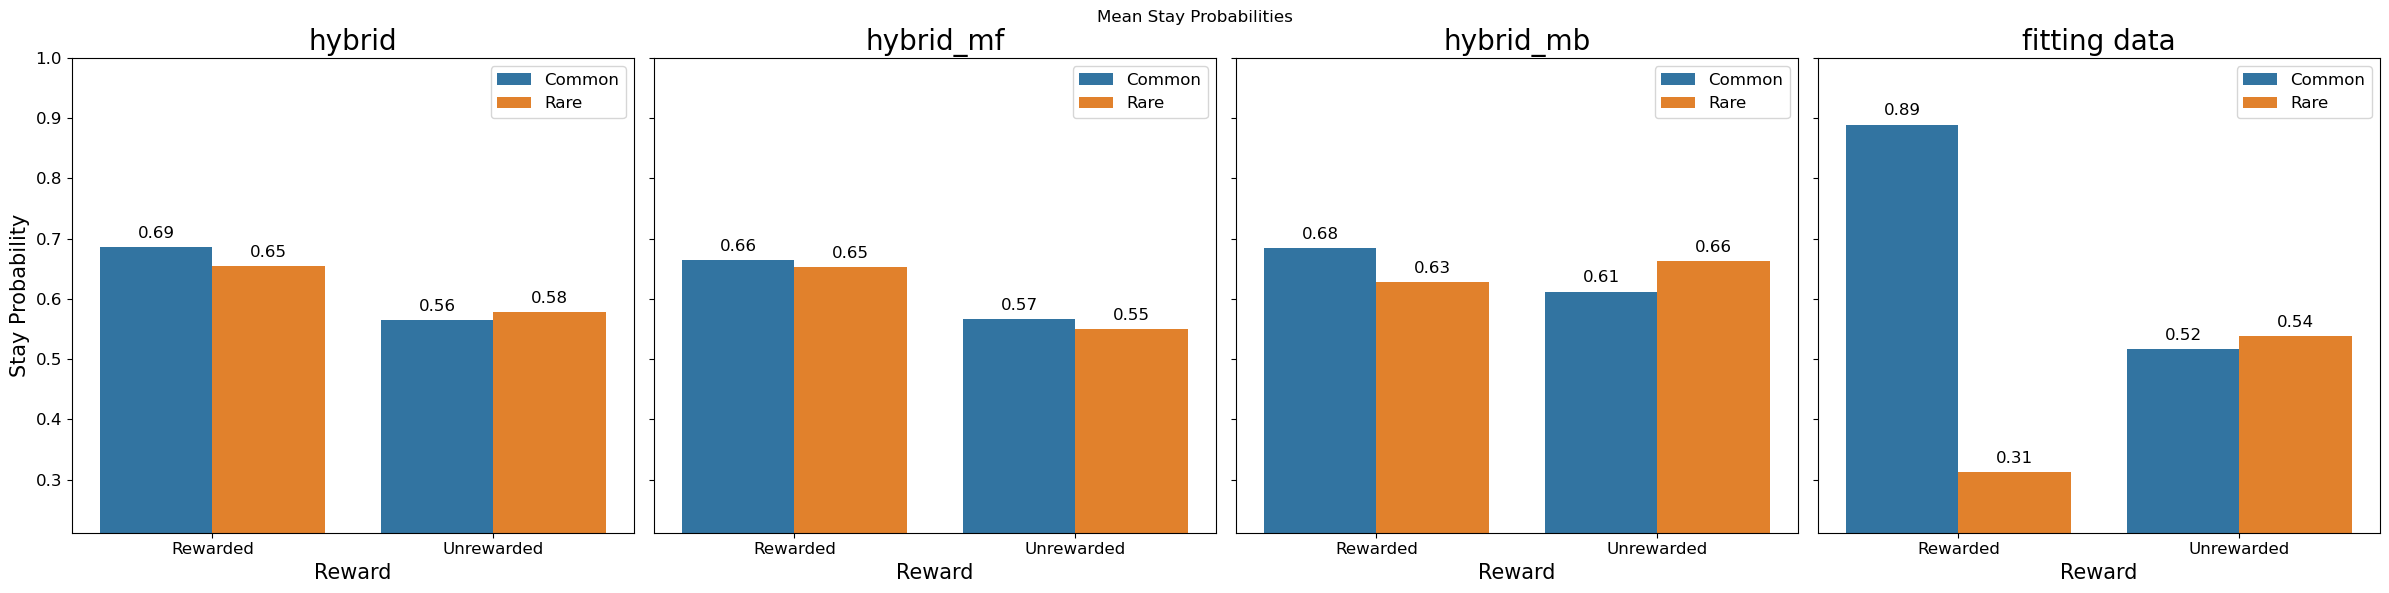

In [39]:
# take the average
all_data_stay_prob_hybrid_ = pd.concat(sample_stay_prob_hybrid).reset_index(drop=True)
all_data_stay_prob_hybrid_mf_ = pd.concat(sample_stay_prob_hybrid_mf).reset_index(drop=True)
all_data_stay_prob_hybrid_mb_ = pd.concat(sample_stay_prob_hybrid_mb).reset_index(drop=True)
# Compute the average stay probabilities
average_data_hybrid = all_data_stay_prob_hybrid_.groupby(['Rewarded', 'Common', 'Condition'])['Stay Probability'].mean().reset_index()
average_data_hybrid_mf = all_data_stay_prob_hybrid_mf_.groupby(['Rewarded', 'Common', 'Condition'])['Stay Probability'].mean().reset_index()
average_data_hybrid_mb = all_data_stay_prob_hybrid_mb_.groupby(['Rewarded', 'Common', 'Condition'])['Stay Probability'].mean().reset_index()

# display the average
# display('model_free', average_data_mf)
# display('model_based', average_data_mb)
# display('hybrid', average_data_hybrid)
# display('hybrid_mf', average_data_hybrid_mf)
# display('hybrid_mb', average_data_hybrid_mb)
# plot the average
data_stay_probabilities = calculate_stay_probability(data) 
plot_stay_probabilities(dfs=[average_data_hybrid, average_data_hybrid_mf, average_data_hybrid_mb, data_stay_probabilities],
                        labels=['hybrid', 'hybrid_mf', 'hybrid_mb', 'fitting data'],
                        title='Mean Stay Probabilities', max_plots_per_row=4)

### inspect the parameter fit of the models with different evaluation metrics for additional insights about the models complexity-generalizability trade-off.

In [40]:
from utils import calculate_bic, calculate_aic

In [41]:
# get the best LL for each best model
best_LL_hybrid = best_params_all_models.loc[best_params_all_models['Model Type'] == 'hybrid', 'Best LL'].values[0]
best_LL_hybrid_mf = best_params_all_models.loc[best_params_all_models['Model Type'] == 'hybrid_mf', 'Best LL'].values[0]
best_LL_hybrid_mb = best_params_all_models.loc[best_params_all_models['Model Type'] == 'hybrid_mb', 'Best LL'].values[0]

# calculate the AIC for the fitted models
AIC_hybrid = calculate_aic(7, best_LL_hybrid)
AIC_hybrid_mf = calculate_aic(7, best_LL_hybrid_mf)
AIC_hybrid_mb = calculate_aic(7, best_LL_hybrid_mb)

# calculate the BIC for the fitted models
BIC_hybrid = calculate_bic(7, len(data), best_LL_hybrid)
BIC_hybrid_mf = calculate_bic(6, len(data), best_LL_hybrid_mf)
BIC_hybrid_mb = calculate_bic(4, len(data), best_LL_hybrid_mb)

# display the best LL
fit_results_df = pd.DataFrame({
    'Model Type': ['hybrid', 'hybrid_mf', 'hybrid_mb'],
    'Best LL': [best_LL_hybrid, best_LL_hybrid_mf, best_LL_hybrid_mb],
    'AIC':[AIC_hybrid, AIC_hybrid_mf, AIC_hybrid_mb],
    'BIC':[BIC_hybrid, BIC_hybrid_mf, BIC_hybrid_mb]
})
display(fit_results_df)
# display order based on the LL
print('Order based on the Best LL')
display(fit_results_df.sort_values(by='Best LL', ascending=False))
# display order based on the AIC
print('Order based on the AIC')
display(fit_results_df.sort_values(by='AIC', ascending=True))
# display order based on the BIC
print('Order based on the BIC')
display(fit_results_df.sort_values(by='BIC', ascending=True))


Model Type     Best LL         AIC         BIC
0     hybrid -232.547777  479.095553  502.183775
1  hybrid_mf -231.892348  477.784696  495.574600
2  hybrid_mb -232.811074  479.622147  486.815417

Order based on the Best LL


Model Type     Best LL         AIC         BIC
1  hybrid_mf -231.892348  477.784696  495.574600
0     hybrid -232.547777  479.095553  502.183775
2  hybrid_mb -232.811074  479.622147  486.815417

Order based on the AIC


Model Type     Best LL         AIC         BIC
1  hybrid_mf -231.892348  477.784696  495.574600
0     hybrid -232.547777  479.095553  502.183775
2  hybrid_mb -232.811074  479.622147  486.815417

Order based on the BIC


Model Type     Best LL         AIC         BIC
2  hybrid_mb -232.811074  479.622147  486.815417
1  hybrid_mf -231.892348  477.784696  495.574600
0     hybrid -232.547777  479.095553  502.183775

## Parameter Recovery *(5 points)*

For this exercise you should:

*   Set up a suitable space of parameters relevant for parameter recovery *(1 point)*

*   Use the functions above to generate behavior from a models, for a given set of (randomly sampled) parameters, and then fit the model to its generated data. Make sure to evaluate the parameter fit in a quantiative manner. *(3 points)*

*   Plot the parameter recovery results for both models. *(1 point)*

Make sure to comment your code and provide an explanation for each code block in a preceding text block.





In the following, we will use the parameter recovery to test the fitting procedures and the models themselves. We will generate data from the models using a set of parameters, and then fit the same model type to the generated data. We will then compare the fitted parameters to the original parameters to see how well the fitting procedures work, finally we will examine the inner correlation between each model's parameters.

In [143]:
from parameter_recovery import param_recovery, plot_param_recovery, plot_param_correlation

In [144]:
FIT_TYPE = "MCMC"
NUM_RUNS = 20
SEED = 0

CONSIDER_BOTH_STAGES = True
# MCMC
NUM_SAMPLES = 50
NUM_BURN_IN = 250
NUM_CHAINS = 2
# random search
NUM_ITERATIONS = 1000  
kwargs_for_fitting_functions = {
                                'num_samples': NUM_SAMPLES,
                                'num_burn_in': NUM_BURN_IN,
                                'num_chains': NUM_CHAINS,
                                'num_iterations': NUM_ITERATIONS,
                                'consider_both_stages': CONSIDER_BOTH_STAGES
                                }

# Define parameter distributions for hybrid model and its tow special cases (model free and model based)
ALPHA_1_RANGE = (0.05, 0.85)
ALPHA_2_RANGE = (0.05, 0.85)
BETA_1_RANGE = (0.001, 10) 
BETA_2_RANGE = (0.001, 10)
LAMBDA_RANGE = (0.1, 0.9) # we avoide 0 and 1 since we are not aiming at hypothesising about the tow td lamda extremes
W_RANGE = (0.2, 0.8) # this should force the hybrid model to not settle on one of it's sub models 
                            # for the sub models we later fix the the w to either 0 or 1 ( pure free - based respectively )
P_RANGE = (-0.5, 0.5) # we don't want to encourage neither exesive perversion nor the opposite

# Define parameter distributions for hybrid model and its tow special cases (model free and model based)
param_space_hybrid = {
    'alpha_1': np.array(ALPHA_1_RANGE),
    'alpha_2': np.array(ALPHA_2_RANGE),
    'beta_1': np.array(BETA_1_RANGE),
    'beta_2': np.array(BETA_2_RANGE),
    '_lambda': np.array(LAMBDA_RANGE),
    'w': np.array(W_RANGE),
    'p': np.array(P_RANGE)
}
# param space for hybrid special cases
param_space_hybrid_mf = param_space_hybrid.copy()
param_space_hybrid_mf['w'] = np.array([0.0])
# pure model based from hybrid -> w = 1 and alpha_1 and lambda are arbitrary so we fix them as well to avoid wasting time fitting them
param_space_hybrid_mb = param_space_hybrid.copy()
param_space_hybrid_mb['w'] = np.array([1.0])
param_space_hybrid_mb['alpha_1'] = np.array([1.0]) # arbitrary value in case of pure model based
param_space_hybrid_mb['_lambda'] = np.array([1.0]) # arbitrary value in case of pure model based

### Parameter Recovery for all Models

In [ ]:
# parameter recovery for the hybrid agent 
fitted_params_hybrid, true_params_hybrid, best_ll_hybrid_list = param_recovery(agent_type='hybrid',
                                                        parameter_space=param_space_hybrid,
                                                        fit_method=FIT_TYPE,
                                                        num_runs=NUM_RUNS,
                                                        seed=SEED,
                                                        **kwargs_for_fitting_functions)

In [ ]:
# parameter recovery for the model free as special case of hybrid agent
fitted_params_hybrid_mf, true_params_hybrid_mf, best_ll_hybrid_mf_list = param_recovery(agent_type='hybrid',
                                                        parameter_space=param_space_hybrid_mf,
                                                        fit_method=FIT_TYPE,
                                                        num_runs=NUM_RUNS,
                                                        seed=SEED,
                                                        **kwargs_for_fitting_functions) 

fitting_runs:: 100%|██████████| 20/20 [02:22<00:00,  7.12s/it]


In [ ]:
# parameter recovery for the model based as special case of hybrid agent
fitted_params_hybrid_mb, true_params_hybrid_mb, best_ll_hybrid_mb_list = param_recovery(agent_type='hybrid',
                                                        parameter_space=param_space_hybrid_mb,
                                                        fit_method=FIT_TYPE,
                                                        num_runs=NUM_RUNS,
                                                        seed=SEED,
                                                        **kwargs_for_fitting_functions)

fitting_runs:: 100%|██████████| 20/20 [02:01<00:00,  6.09s/it]


### Plot the recoverd vs original parameters correlation

Pearson correlation for alpha: 0.718, p_value: 0.0003620244959229896
Pearson correlation for beta: 0.978, p_value: 1.166511491162577e-13


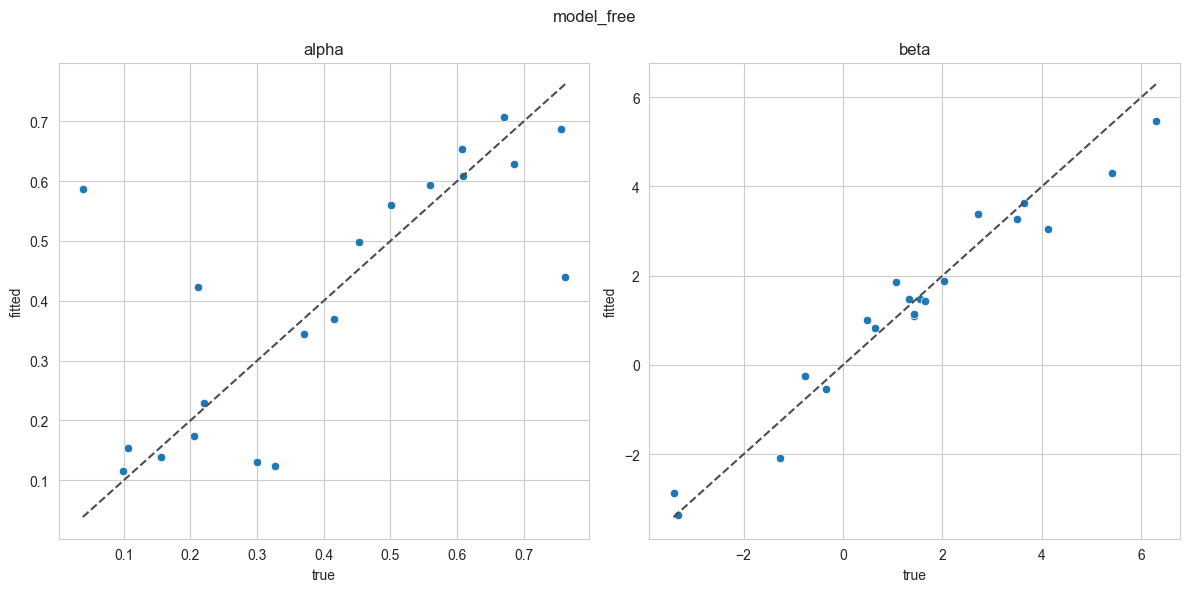

Pearson correlation for alpha: 0.870, p_value: 6.296875950889555e-07
Pearson correlation for beta: 0.981, p_value: 2.4633567302812333e-14


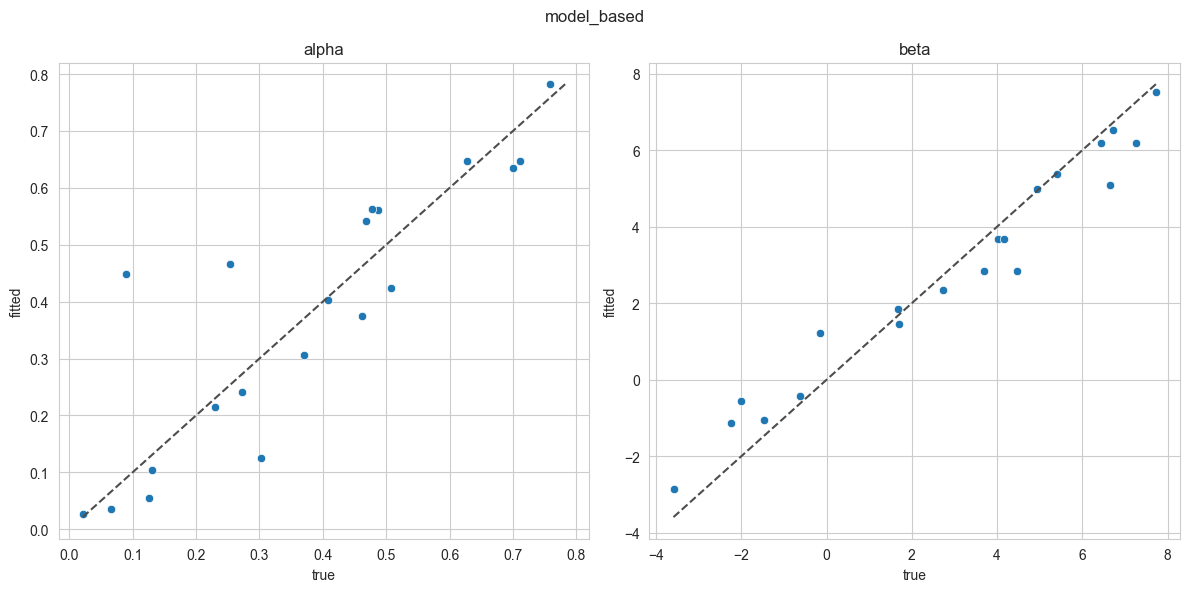

Pearson correlation for alpha_1: 0.269, p_value: 0.2510473609408212
Pearson correlation for alpha_2: 0.437, p_value: 0.053976853781364784
Pearson correlation for beta_1: 0.686, p_value: 0.0008464220171341394
Pearson correlation for beta_2: 0.872, p_value: 5.567223467819686e-07
Pearson correlation for _lambda: -0.189, p_value: 0.42510512954261137
Pearson correlation for w: -0.200, p_value: 0.39806263290056443
Pearson correlation for p: 0.631, p_value: 0.002845251742788754


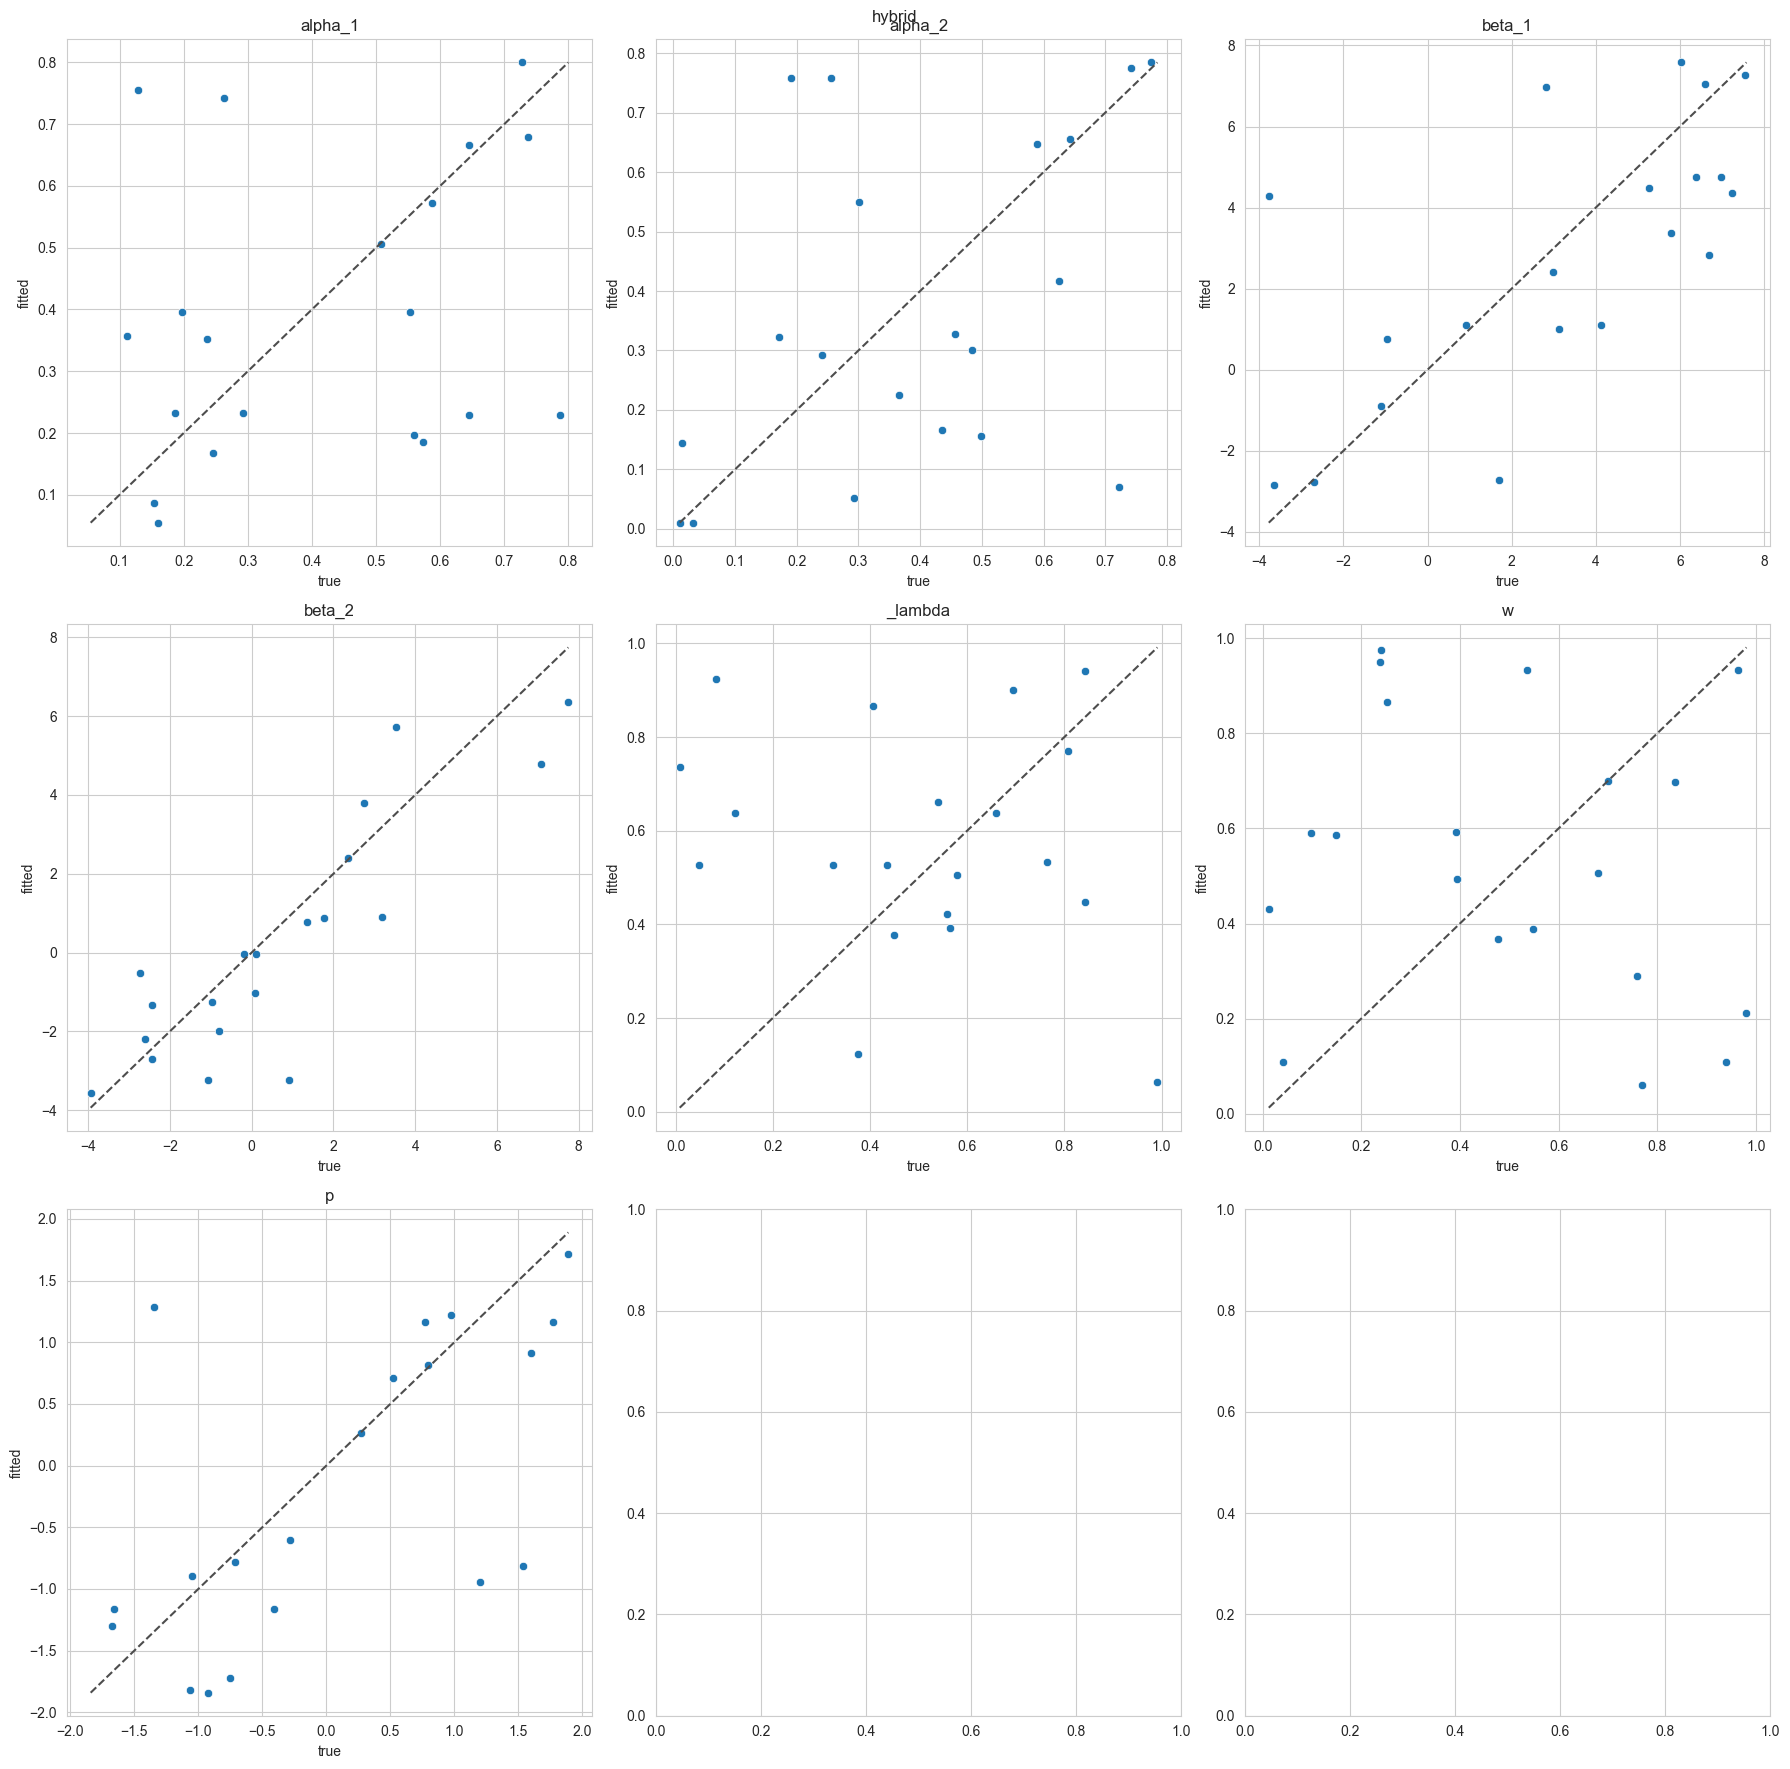

Pearson correlation for alpha_1: -0.087, p_value: 0.7168422890225484
Pearson correlation for alpha_2: 0.516, p_value: 0.019736338096420482
Pearson correlation for beta_1: 0.686, p_value: 0.0008493568758195428
Pearson correlation for beta_2: 0.927, p_value: 4.4012835965548765e-09
Pearson correlation for _lambda: 0.143, p_value: 0.5462464174480409
Pearson correlation for w: nan, p_value: nan
Pearson correlation for p: 0.485, p_value: 0.030057897131888764


/Users/imtezcan/Repositories/CogSci/EBIMAS/venv-ebimas/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


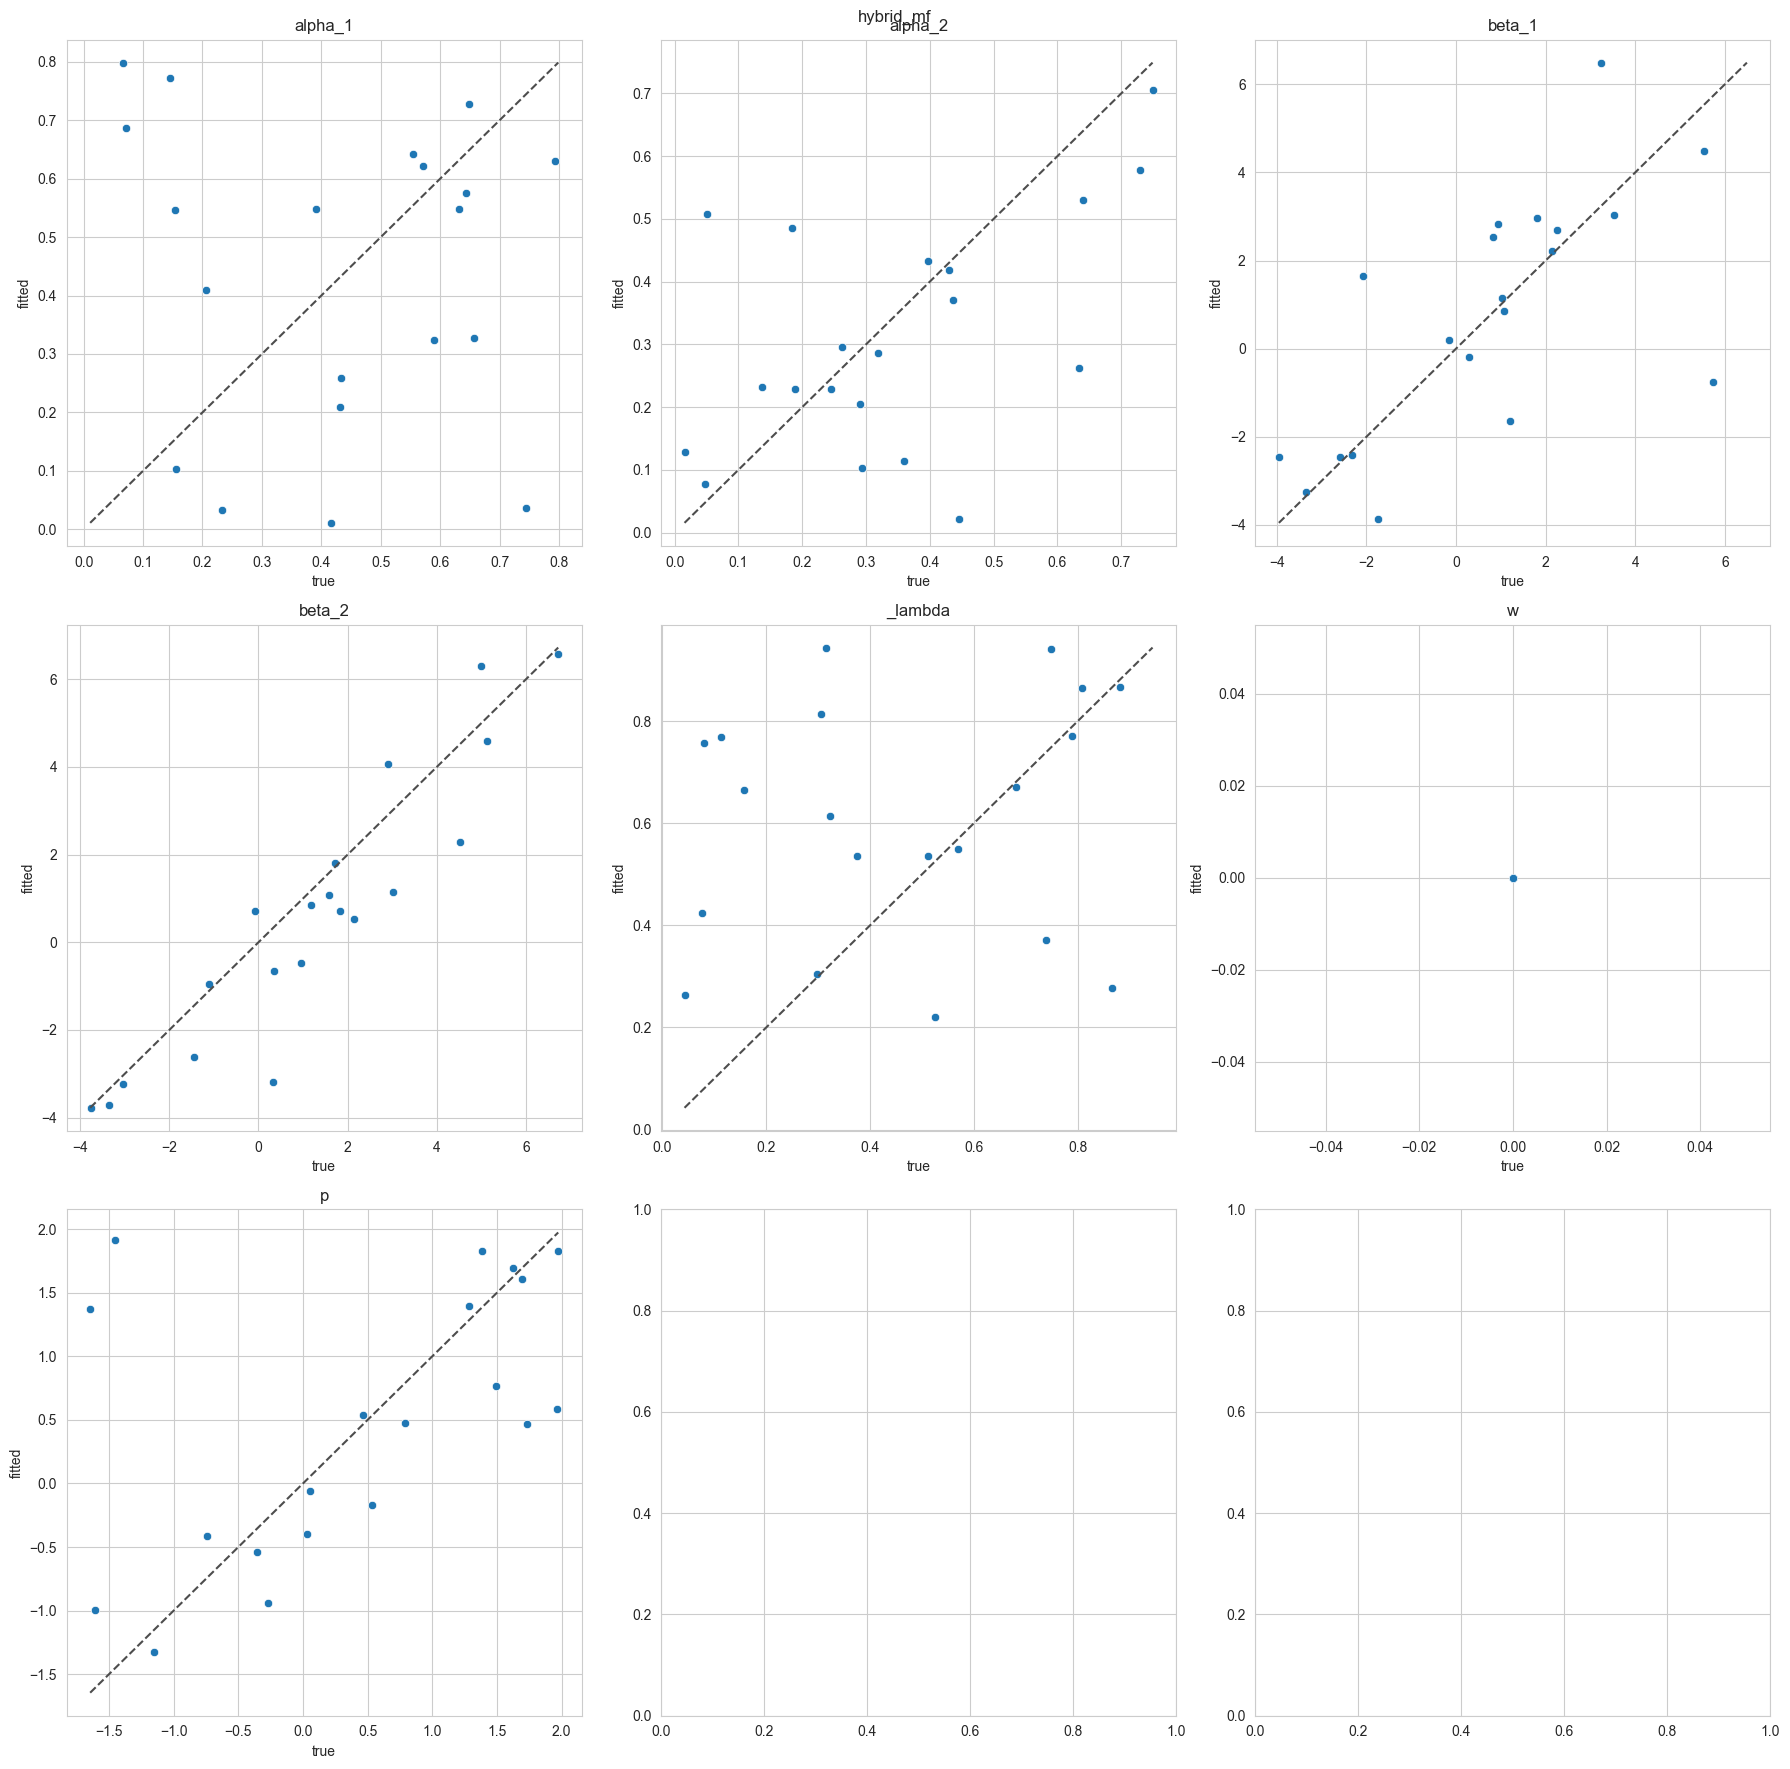

/Users/imtezcan/Repositories/CogSci/EBIMAS/venv-ebimas/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/imtezcan/Repositories/CogSci/EBIMAS/venv-ebimas/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/imtezcan/Repositories/CogSci/EBIMAS/venv-ebimas/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Pearson correlation for alpha_1: nan, p_value: nan
Pearson correlation for alpha_2: 0.683, p_value: 0.0009103714146822705
Pearson correlation for beta_1: 0.754, p_value: 0.00012353466905991548
Pearson correlation for beta_2: 0.961, p_value: 1.8591052854523976e-11
Pearson correlation for _lambda: nan, p_value: nan
Pearson correlation for w: nan, p_value: nan
Pearson correlation for p: 0.556, p_value: 0.010881695425066996


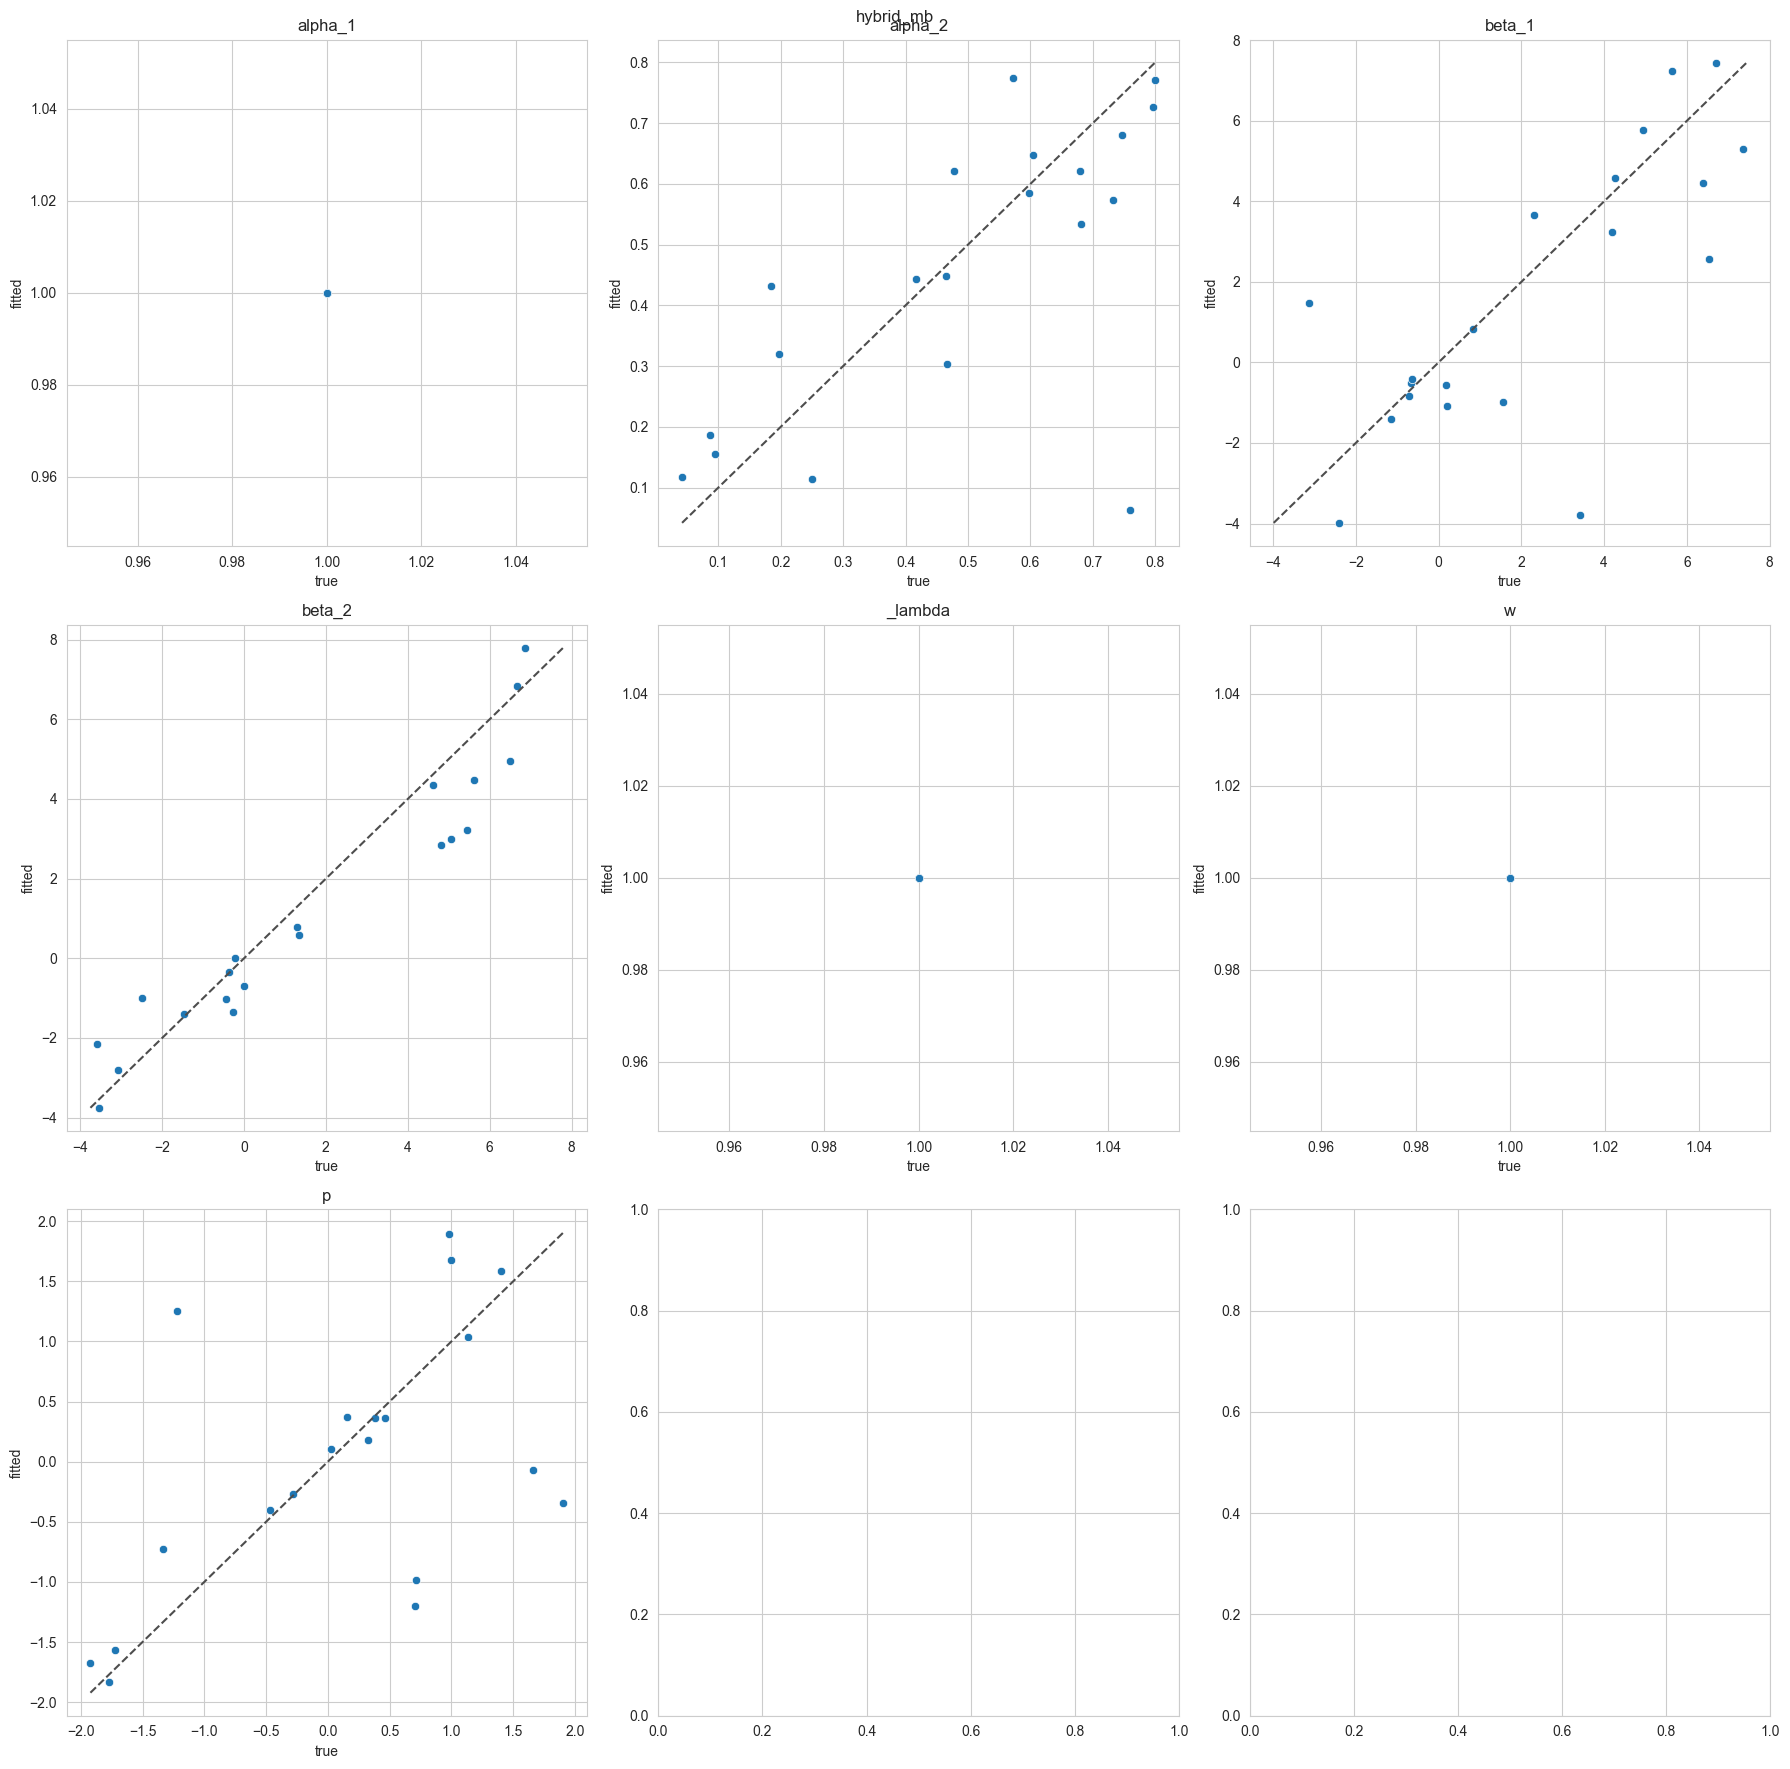

In [206]:
# plot the results
plot_param_recovery(true_params_hybrid, fitted_params_hybrid, 'hybrid')
plot_param_recovery(true_params_hybrid_mf, fitted_params_hybrid_mf, 'hybrid_mf')
plot_param_recovery(true_params_hybrid_mb, fitted_params_hybrid_mb, 'hybrid_mb')

### Plot the model's parameters correlation ( inner correlation of the parameters of each model )

corr_1: PearsonRResult(statistic=-0.07895961736908402, pvalue=0.740721373277467)


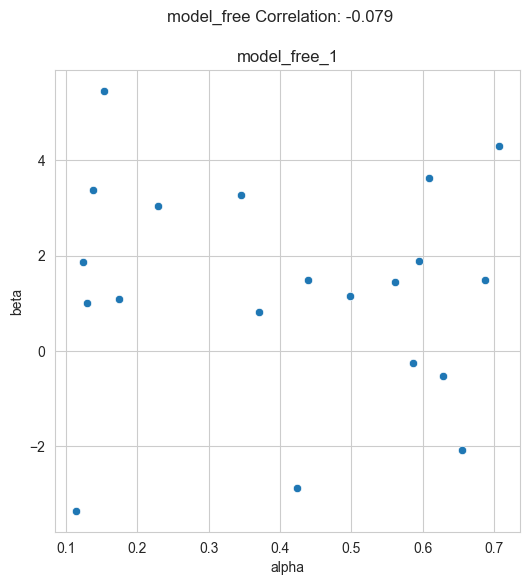

corr_1: PearsonRResult(statistic=-0.3052350363413713, pvalue=0.19065231800190133)


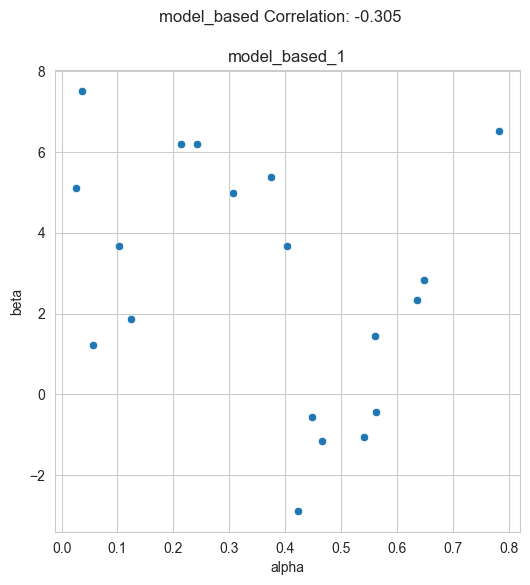

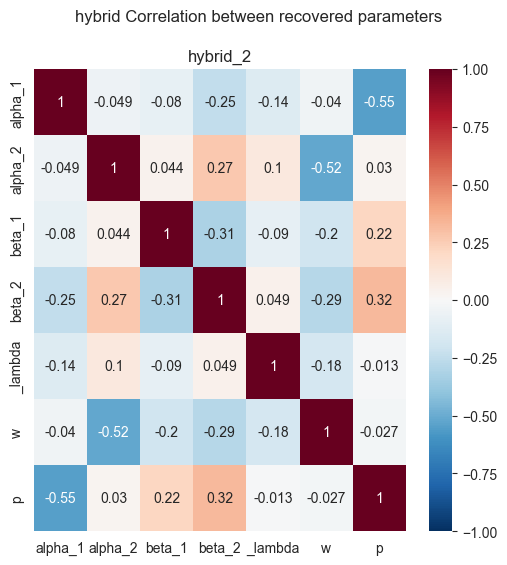

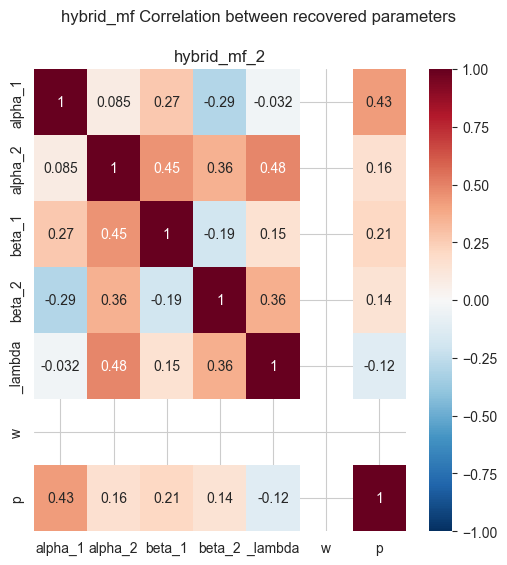

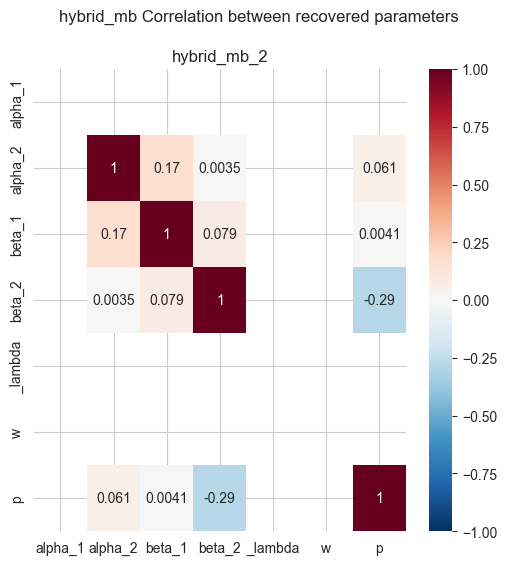

In [207]:
# plot recovered parameters correlation
# low is good
plot_param_correlation(fitted_params_hybrid, 'hybrid')
plot_param_correlation(fitted_params_hybrid_mf, 'hybrid_mf')
plot_param_correlation(fitted_params_hybrid_mb, 'hybrid_mb')

## *Optional*: Model Recovery *(2 bonus points)*

In this bonus exercise, you may examine model reovery. The bonus points count towards your total group project points. That is, you may accumlate up to 22 points in the practical part of the group project.

Make sure to comment your code and provide an explanation for each code block in a preceding text block.





In [1]:
from model_recovery import model_recovery, plot_confusion_and_inversion_matrix
from scipy.stats import uniform
import pandas as pd
from datetime import datetime
plot_cmap = 'viridis' # cmap for the confusion and inversion matrices

In [2]:
FIT_METHOD = 'random_search'
NUM_RUNS = 20
SEED = 0
NUM_ITERATIONS = 1000  # Number of iterations for random search
NUM_SAMPLES = 250  # Number of samples for MCMC
NUM_BURN_IN = 50  # Number of burnin samples for MCMC
NUM_CHAINS = 2  # Number of chains for MCMC
CONSIDER_BOTH_STAGES = True
kwargs_for_fitting_functions = {
                                'num_iterations': NUM_ITERATIONS,
                                'num_samples': NUM_SAMPLES,
                                'num_burn_in': NUM_BURN_IN,
                                'num_chains': NUM_CHAINS,
                                'consider_both_stages': CONSIDER_BOTH_STAGES
                                }

# Define parameter distributions for hybrid model and its tow special cases (model free and model based)
ALPHA_1_RANGE = (0.1, 0.9)
ALPHA_2_RANGE = (0.1, 0.9)
BETA_1_RANGE = (0.01, 10)
BETA_2_RANGE = (0.01, 10)
LAMBDA_RANGE = (0.1, 0.9) # we avoid 0 and 1 since we are not aiming at hypothesising about the tww td lambda extremes
W_RANGE = (0.3, 0.7) # this should force the hybrid model to STRONGLY not settle on one of it's sub models 
                            # for the sub models we later fix the the w to either 0 or 1
P_RANGE = (-0.5, 0.5) # we don't want to encourage neither exesive perversion nor it's opposite

# param_space_hybrid = {
#     'alpha_1': np.array(ALPHA_1_RANGE),
#     'alpha_2': np.array(ALPHA_2_RANGE),
#     'beta_1': np.array(BETA_1_RANGE),
#     'beta_2': np.array(BETA_2_RANGE),
#     '_lambda': np.array(LAMBDA_RANGE),
#     'w': np.array(W_RANGE),
#     'p': np.array(P_RANGE)
# }
# uniform (loc, scale) => uniform (loc, loc + scale)
param_distributions_hybrid = {
    'alpha_1': uniform(ALPHA_1_RANGE[0], ALPHA_1_RANGE[1] - ALPHA_1_RANGE[0]),
    'alpha_2': uniform(ALPHA_2_RANGE[0], ALPHA_2_RANGE[1] - ALPHA_2_RANGE[0]),
    'beta_1': uniform(BETA_1_RANGE[0], BETA_1_RANGE[1] - BETA_1_RANGE[0]),
    'beta_2': uniform(BETA_2_RANGE[0], BETA_2_RANGE[1] - BETA_2_RANGE[0]),
    '_lambda': uniform(LAMBDA_RANGE[0], LAMBDA_RANGE[1] - LAMBDA_RANGE[0]),
    'w': uniform(W_RANGE[0], W_RANGE[1] - W_RANGE[0]),
    'p': uniform(P_RANGE[0], P_RANGE[1] - P_RANGE[0]),
}
param_distributions_hybrid_mf = param_distributions_hybrid.copy()
param_distributions_hybrid_mf['w'] = uniform(0, 0)
param_distributions_hybrid_mb = param_distributions_hybrid.copy()
param_distributions_hybrid_mb['w'] = uniform(1, 0)
param_distributions_hybrid_mb['alpha_1'] = uniform(1, 0) # arbitrary value in case of pure model based
param_distributions_hybrid_mb['_lambda'] = uniform(1, 0) # arbitrary value in case of pure model based

In [3]:
# model recovery for the hybrid agent and its special cases model free and model based
models_priors = {
                 'hybrid': param_distributions_hybrid,
                 'hybrid_mf': param_distributions_hybrid_mf,
                 'hybrid_mb': param_distributions_hybrid_mb
                }

#### Run model recovery

In [4]:
# run the model recovery and print the hyperparameters of the run
print(f'NUM_RUNS: {NUM_RUNS}')
print(f'FIT_METHOD: {FIT_METHOD}')
print(f'SEED: {SEED}')
print(f'fitting hyperparameters: {kwargs_for_fitting_functions}')

conf_matrix_df, inversion_matrix_df = model_recovery(models_priors, num_simulations=NUM_RUNS, fit_method=FIT_METHOD, seed=SEED,
                                                    **kwargs_for_fitting_functions)

NUM_RUNS: 20
FIT_METHOD: random_search
SEED: 0
fitting hyperparameters: {'num_iterations': 1000, 'num_samples': 250, 'num_burn_in': 50, 'num_chains': 2, 'consider_both_stages': True}


models::   0%|          | 0/3 [00:00<?, ?it/s]

Number of free parameters for each model:
hybrid: 7
hybrid_mf: 6
hybrid_mb: 4


simulating model recovery for: hybrid:   0%|          | 0/20 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

simulating model recovery for: hybrid_mf:   0%|          | 0/20 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

simulating model recovery for: hybrid_mb:   0%|          | 0/20 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

models::   0%|          | 0/3 [00:00<?, ?it/s]

In [20]:
# save results to csv
dir = 'comparison_results/'
timestamp = datetime.now().strftime("%m-%d_%H-%M-%S")
conf_matrix_df.to_csv(dir + 'confusion_matrix_' + timestamp + '.csv', index=False)
inversion_matrix_df.to_csv(dir + 'inversion_matrix_' + timestamp + '.csv', index=False)

#### Plotting Model Recovery results in terms of the confusion and inversion matrices of the models
First we examine the model recovery across all 5 models, and then we focus on the recovery of the hybrid model and it's tow sub-models the pure model-based and the pure model-free models. <br>

NUM_RUNS: 20
FIT_METHOD: MCMC
SEED: 0
fitting hyperparameters: {'num_iterations': 3000, 'num_samples': 400, 'num_burn_in': 100, 'num_chains': 3, 'consider_both_stages': True}


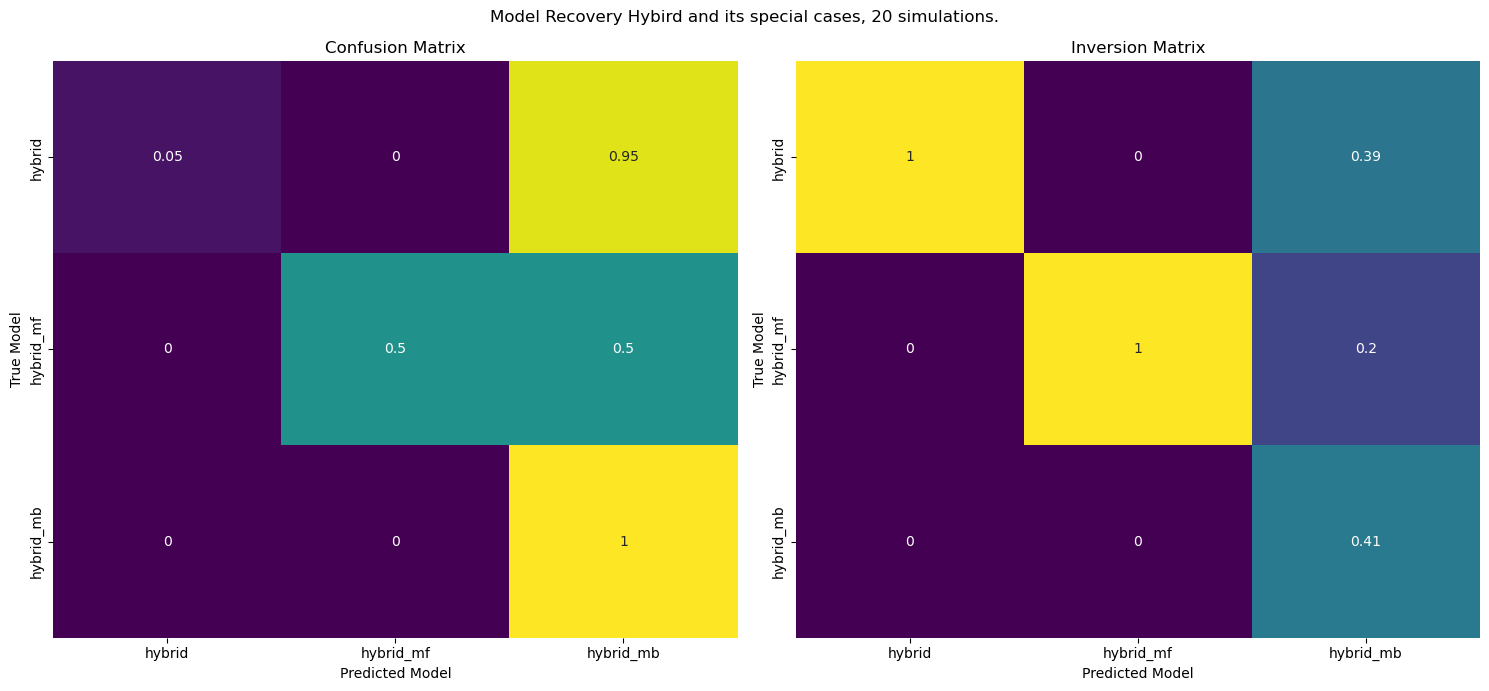

Plot saved to comparison_results/plots/model_recovery_03-04_13-55-44_03-04_16-30-14.png


In [81]:
# plot the results (confusion and inversion matrices) and print the hyperparameters of the run
print(f'NUM_RUNS: {NUM_RUNS}')
print(f'FIT_METHOD: {FIT_METHOD}')
print(f'SEED: {SEED}')
print(f'fitting hyperparameters: {kwargs_for_fitting_functions}')

plot_confusion_and_inversion_matrix(conf_matrix_df, inversion_matrix_df,
                      title=f'Model Recovery Hybird and its special cases, {NUM_RUNS} simulations.',
                      cmap=plot_cmap,
                      save=True, filename=dir + 'plots/' 'model_recovery_' + timestamp + '.png')

## Model Comparison *(5 points)*

For this exercise you should:

*   Load and (potentially) preprocess the experimental data. (1 point)

*   Fit the two models to the data.  *(1 point)*

*   Evaluate which model performs better, taking into account fit and model complexity. *(2 points)*

*   Plot the behavior of the winning model against the data. *(1 point)**

Make sure to comment your code and provide an explanation for each code block in a preceding text block.





We have loaded and preprocessed the experimental data above, so we don't do it again here.
And we already have the fitted models and their log likelihoods, so we don't fit the models again here.
We evaluate the models using the Bayesian Information Criterion (BIC) which takes into account the fit and model complexity.
We then plot the behavior of the winning model against the data.

In [13]:
import os
SAVE_RESULTS = True
SAVE_DIR = 'comparison_results/'
SAVE_DIR_PLOTS = SAVE_DIR + 'plots/'
SAVE_DIR_DATA = SAVE_DIR + 'data/'
# create the directories if they don't exist
if SAVE_RESULTS:
    for d in [SAVE_DIR, SAVE_DIR_PLOTS, SAVE_DIR_DATA]:
        if not os.path.exists(d):
            os.makedirs(d)
        else:
            print(f'{d} already exists')

comparison_results/ already exists
comparison_results/plots/ already exists
comparison_results/data/ already exists


In [14]:
from utils import calculate_bic, load_files_from_folder, preprocess_human_data
from parameter_fitting import fit_with_MCMC, fit_with_random_search
from parameter_fitting import plot_fit_results, plot_MCMC_chain_convergence, plot_samples_distribution
from simulate import simulate
# for results analysis and plotting
from behavioral_analysis import calc_plot_stay_probabilities, calculate_stay_probability, plot_stay_probabilities
from behavioral_analysis import calc_plot_running_average_cumulative_reward, calc_plot_running_stay_probabilities
from behavioral_analysis import calc_plot_stay_probability_paired_diffs, calc_plot_stay_probabilities_blocks
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import chi2


In [15]:
from tqdm.notebook import tqdm

def fit_model_to_data_list(data_list, agent_type, parameter_space, fit_method='MCMC', show_progress=True, **kwargs_for_fitting_functions):
    """
    Fit the model to a list of multiple observed data at once and return the results of each fit.
    The function is useful for comparing the fits of the model to multiple datasets.
    :param data_list: list of dataframes, each dataframe is a task data for a participant
    :param agent_type: str, the type of the agent to fit the data to
    :param parameter_space: dict, the parameter space to sample from
    :param fit_method: str, the method to use for fitting the model to the data, either 'MCMC' or 'random_search'
    :param show_progress: bool, whether to show the progress of the fitting
    :param kwargs_for_fitting_functions: dict, additional arguments for the fitting functions
    :return: dict, the best fits for each participant
            - 'particepants': list of the participants indices
            - 'parameter': list of the best fitted parameters for each participant
            - 'LL': list of the best fitted log likelihood for each participant
            - 'all_samples_df': list of the samples for each participant
    """
    best_fits = {'particepants': [],
                'parameter':[],
                'LL': [],
                'all_samples_df': []}
    for idx, data in tqdm(enumerate(data_list), desc='Fitting model based', total=len(data_list), disable=not show_progress):

        if fit_method == 'MCMC':
            fitted_params, fitted_LL, all_samples_df = fit_with_MCMC(parameter_space, data, agent_type=agent_type,
                                                num_chains=kwargs_for_fitting_functions.get('num_chains', 4),
                                                num_samples=kwargs_for_fitting_functions.get('num_samples', 200),
                                                num_burn_in=kwargs_for_fitting_functions.get('num_burn_in', 50),
                                                show_progress=True)
        elif fit_method == 'random_search':
            fitted_params, fitted_LL, all_samples_df = fit_with_random_search(parameter_space, data, agent_type=agent_type,
                                                num_iterations=kwargs_for_fitting_functions.get('num_iterations', 1000),
                                                show_progress=True)
        else:
            raise ValueError(f'fit_method ( {fit_method} ) should be either MCMC or random_search')
        best_fits['particepants'].append(idx)
        best_fits['parameter'].append(fitted_params)
        best_fits['LL'].append(fitted_LL)
        best_fits['all_samples_df'].append(all_samples_df)

    return best_fits

### <spin style="color: green"> Fit the Models to the participants (only our group, N=6)
we couldn't ensure the same experiment condition from other groups
- a briefing of how the task is constructed (similar to Daw et al. (2011) - "Model-based influences on humans’ choices and striatal prediction errors")

In [16]:
# load all participant data and preprocess them
group_1 = "data/participants/group_01"
# group_2 = "data/participants/group_02"
# group_3 = "data/participants/group_03"

data_g_1_raw = load_files_from_folder(group_1, extension=".csv")
# data_g_2_raw = load_files_from_folder(group_2, file_end=".csv")
# data_g_3_raw = load_files_from_folder(group_3, file_end=".csv")

data_g_1 = [preprocess_human_data(df) for df in data_g_1_raw]
# data_g_2 = [preprocess_human_data(df) for df in data_g_2_raw]
# data_g_3 = [preprocess_human_data(df) for df in data_g_3_raw]
# data_all = data_g_1 + data_g_2 + data_g_3
data_all = data_g_1
data_all_labels = ['participant_' + str(i) for i in range(1, len(data_all) + 1)]

if SAVE_RESULTS:
    # save the preprocessed data
    for i, data in enumerate(data_all):
        data.to_csv(os.path.join(SAVE_DIR_DATA, f'preprocessed_data_participant_{i + 1}.csv'), index=False)
        print(f'preprocessed_data_participant_{i + 1}.csv saved under {SAVE_DIR_DATA}')

preprocessed_data_participant_1.csv saved under comparison_results/data/
preprocessed_data_participant_2.csv saved under comparison_results/data/
preprocessed_data_participant_3.csv saved under comparison_results/data/
preprocessed_data_participant_4.csv saved under comparison_results/data/
preprocessed_data_participant_5.csv saved under comparison_results/data/
preprocessed_data_participant_6.csv saved under comparison_results/data/


In [17]:
FIT_METHOD = 'MCMC'
CONSIDER_BOTH_STAGES = True
SEED = 0
np.random.seed(SEED) # set the random seed for reproducibility

# random search
NUM_ITERATIONS = 3000
# MCMC
NUM_CHAINS = 3
NUM_SAMPLES = 400
NUM_BURN_IN = 100

kwargs_for_fitting_functions = {
                                'num_iterations': NUM_ITERATIONS,
                                'num_samples': NUM_SAMPLES,
                                'num_burn_in': NUM_BURN_IN,
                                'num_chains': NUM_CHAINS,
                                'consider_both_stages': CONSIDER_BOTH_STAGES
                                }

# Define parameter distributions for hybrid model and its tow special cases (model free and model based)
ALPHA_1_RANGE = (0.05, 0.90)
ALPHA_2_RANGE = (0.05, 0.90)
BETA_1_RANGE = (0.001, 10) 
BETA_2_RANGE = (0.001, 10)
LAMBDA_RANGE = (0.1, 0.9) # we avoide 0 and 1 since we are not aiming at hypothesising about the tow td lamda extremes
W_RANGE = (0.2, 0.75) # this should force the hybrid model to not settle on one of it's sub models 
                            # for the sub models we later fix the the w to either 0 or 1 ( pure free - based respectively )
P_RANGE = (-0.5, 0.5) # we don't want to encourage neither exesive perversion nor the opposite

parameter_space_hybrid = {
    'alpha_1': np.array(ALPHA_1_RANGE),
    'alpha_2': np.array(ALPHA_2_RANGE),
    'beta_1': np.array(BETA_1_RANGE),
    'beta_2': np.array(BETA_2_RANGE),
    '_lambda': np.array(LAMBDA_RANGE),
    'w': np.array(W_RANGE),
    'p': np.array(P_RANGE)
}

# param space for hybrid special cases
# pure model free from hybrid -> w = 0
parameter_space_hybrid_mf = parameter_space_hybrid.copy() 
parameter_space_hybrid_mf['w'] = np.array([0.0])

# pure model based from hybrid -> w = 1 and alpha_1 and lambda are arbitrary so we fix them as well to avoid wasting time fitting them 
parameter_space_hybrid_mb = parameter_space_hybrid.copy()
parameter_space_hybrid_mb['w'] = np.array([1.0])
parameter_space_hybrid_mb['alpha_1'] = np.array([1.0])
parameter_space_hybrid_mb['_lambda'] = np.array([1.0])

In [7]:
# hybrid 
agent_type = 'hybrid'
parameter_space = parameter_space_hybrid

model_best_fit_hybrid = fit_model_to_data_list(data_all, agent_type,
                                                parameter_space, fit_method=FIT_METHOD,
                                                **kwargs_for_fitting_functions)

Fitting model based:   0%|          | 0/6 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

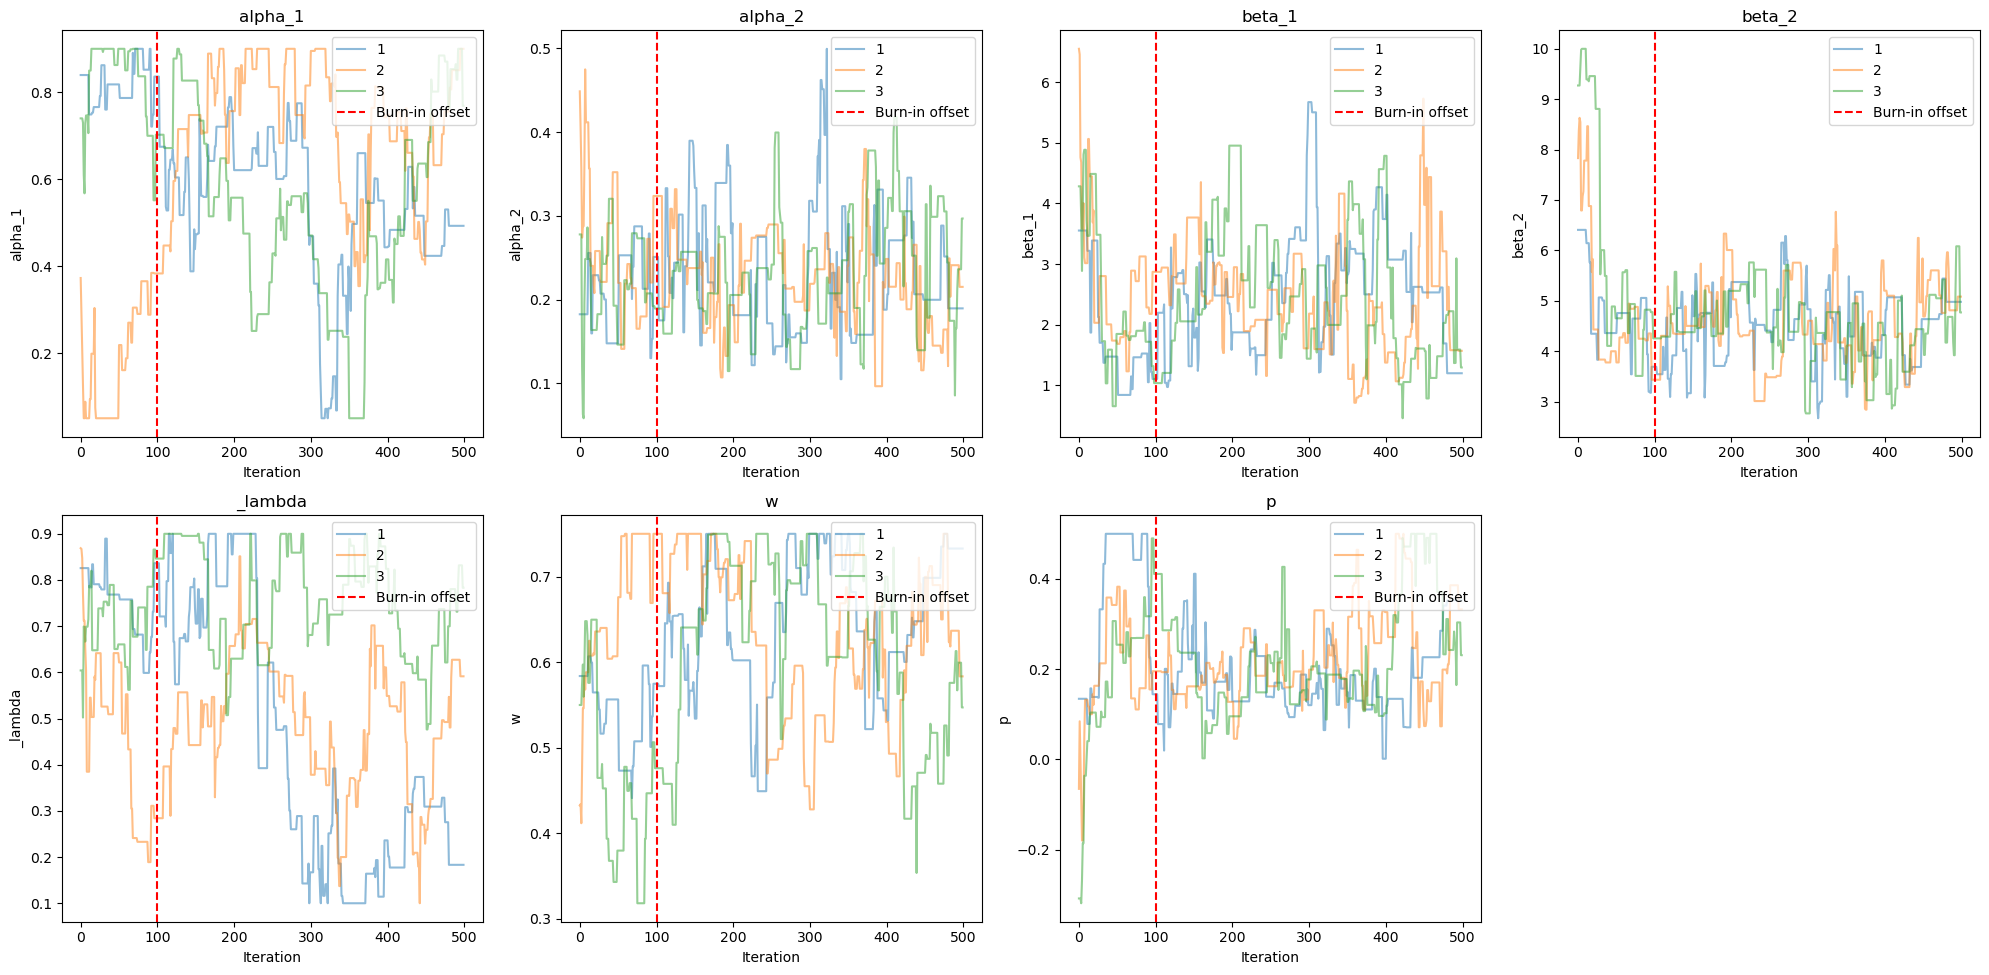

Plot saved to comparison_results/plots/mcmc_chain_convergence_hybrid_03-04_08-45-07.png


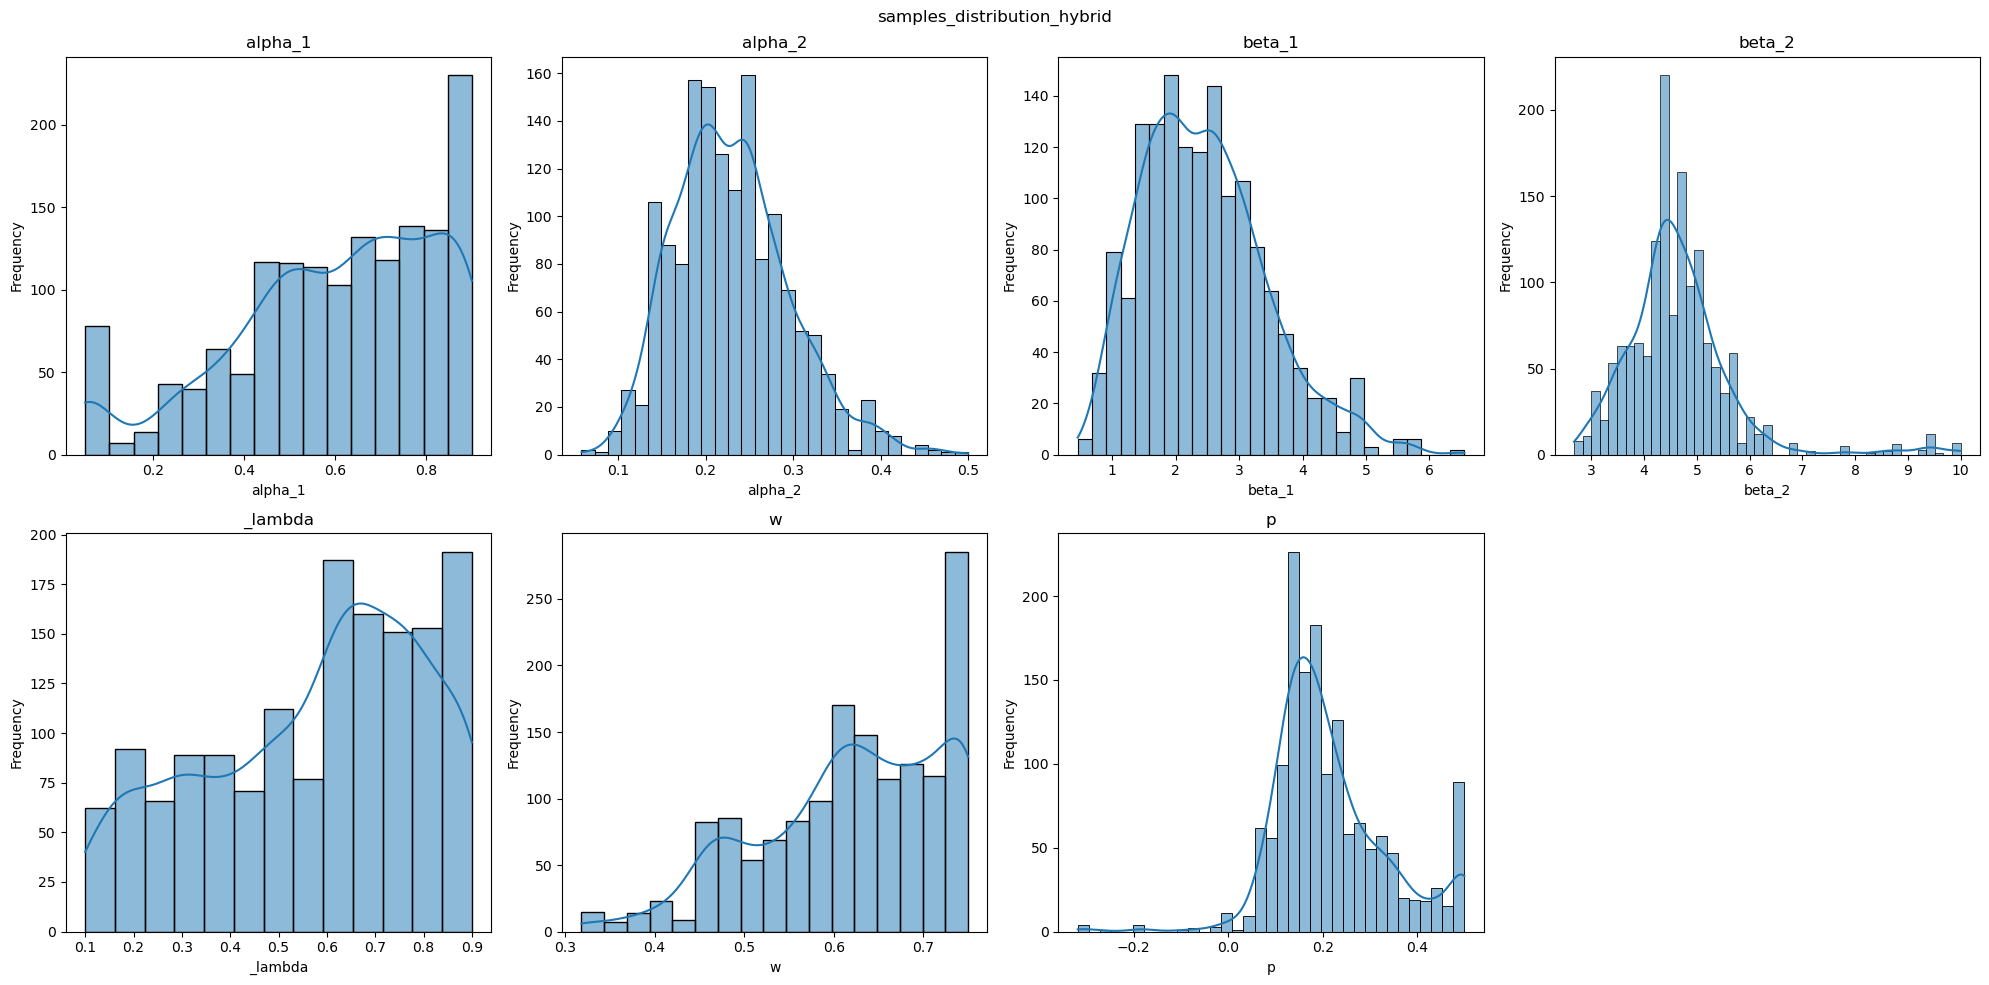

Plot saved to comparison_results/plots/samples_distribution_hybrid_03-04_08-45-09.png


In [34]:
# plot the MCMC chain convergence from one of the participants fit
participant_idx = 0
if FIT_METHOD == 'MCMC':
    plot_MCMC_chain_convergence(model_best_fit_hybrid['all_samples_df'][participant_idx],
                                save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'mcmc_chain_convergence_hybrid.png')

# plot the samples distribution from one of the participants fit
plot_samples_distribution(model_best_fit_hybrid['all_samples_df'][participant_idx],
                            title='samples_distribution_hybrid',
                            save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'samples_distribution_hybrid.png')

In [9]:
# hybrid_mf
agent_type = 'hybrid_mf'
parameter_space = parameter_space_hybrid_mf

model_best_fit_hybrid_mf = fit_model_to_data_list(data_all, agent_type,
                                                    parameter_space, fit_method=FIT_METHOD,
                                                    **kwargs_for_fitting_functions)

Fitting model based:   0%|          | 0/6 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

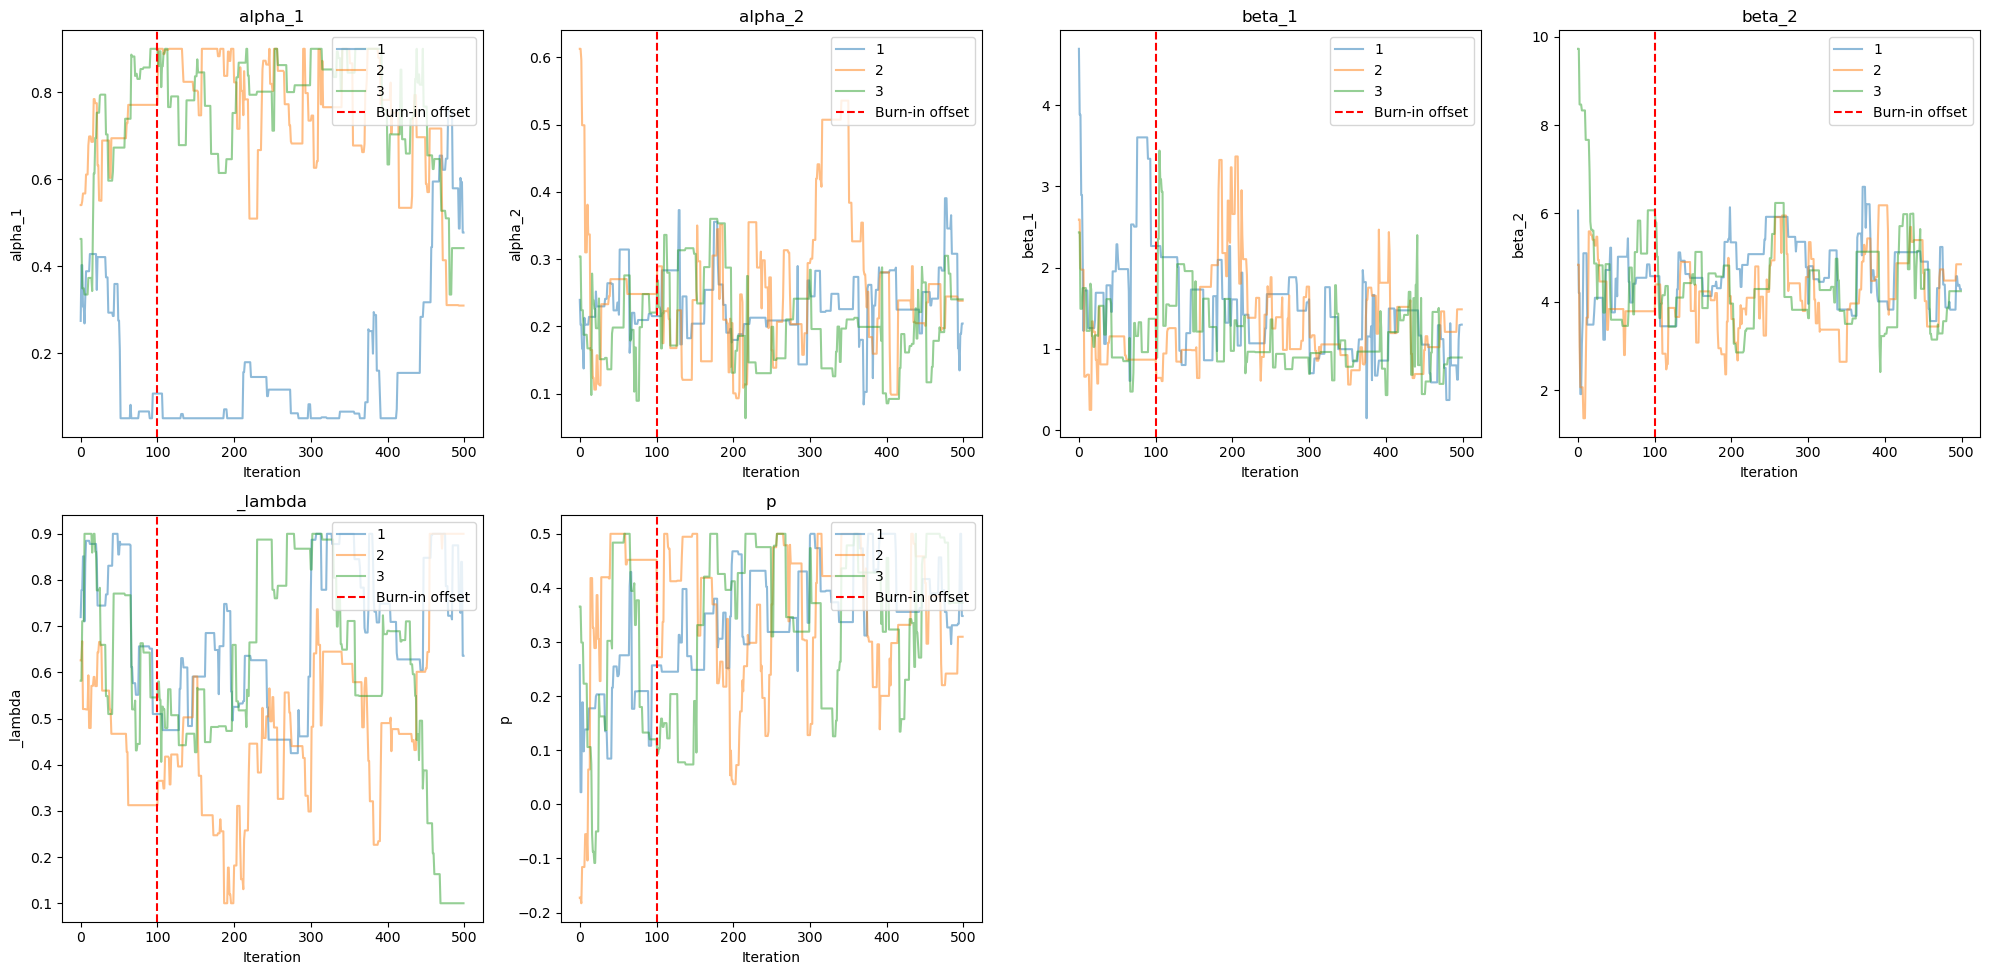

Plot saved to comparison_results/plots/mcmc_chain_convergence_hybrid_mf_03-04_08-45-14.png


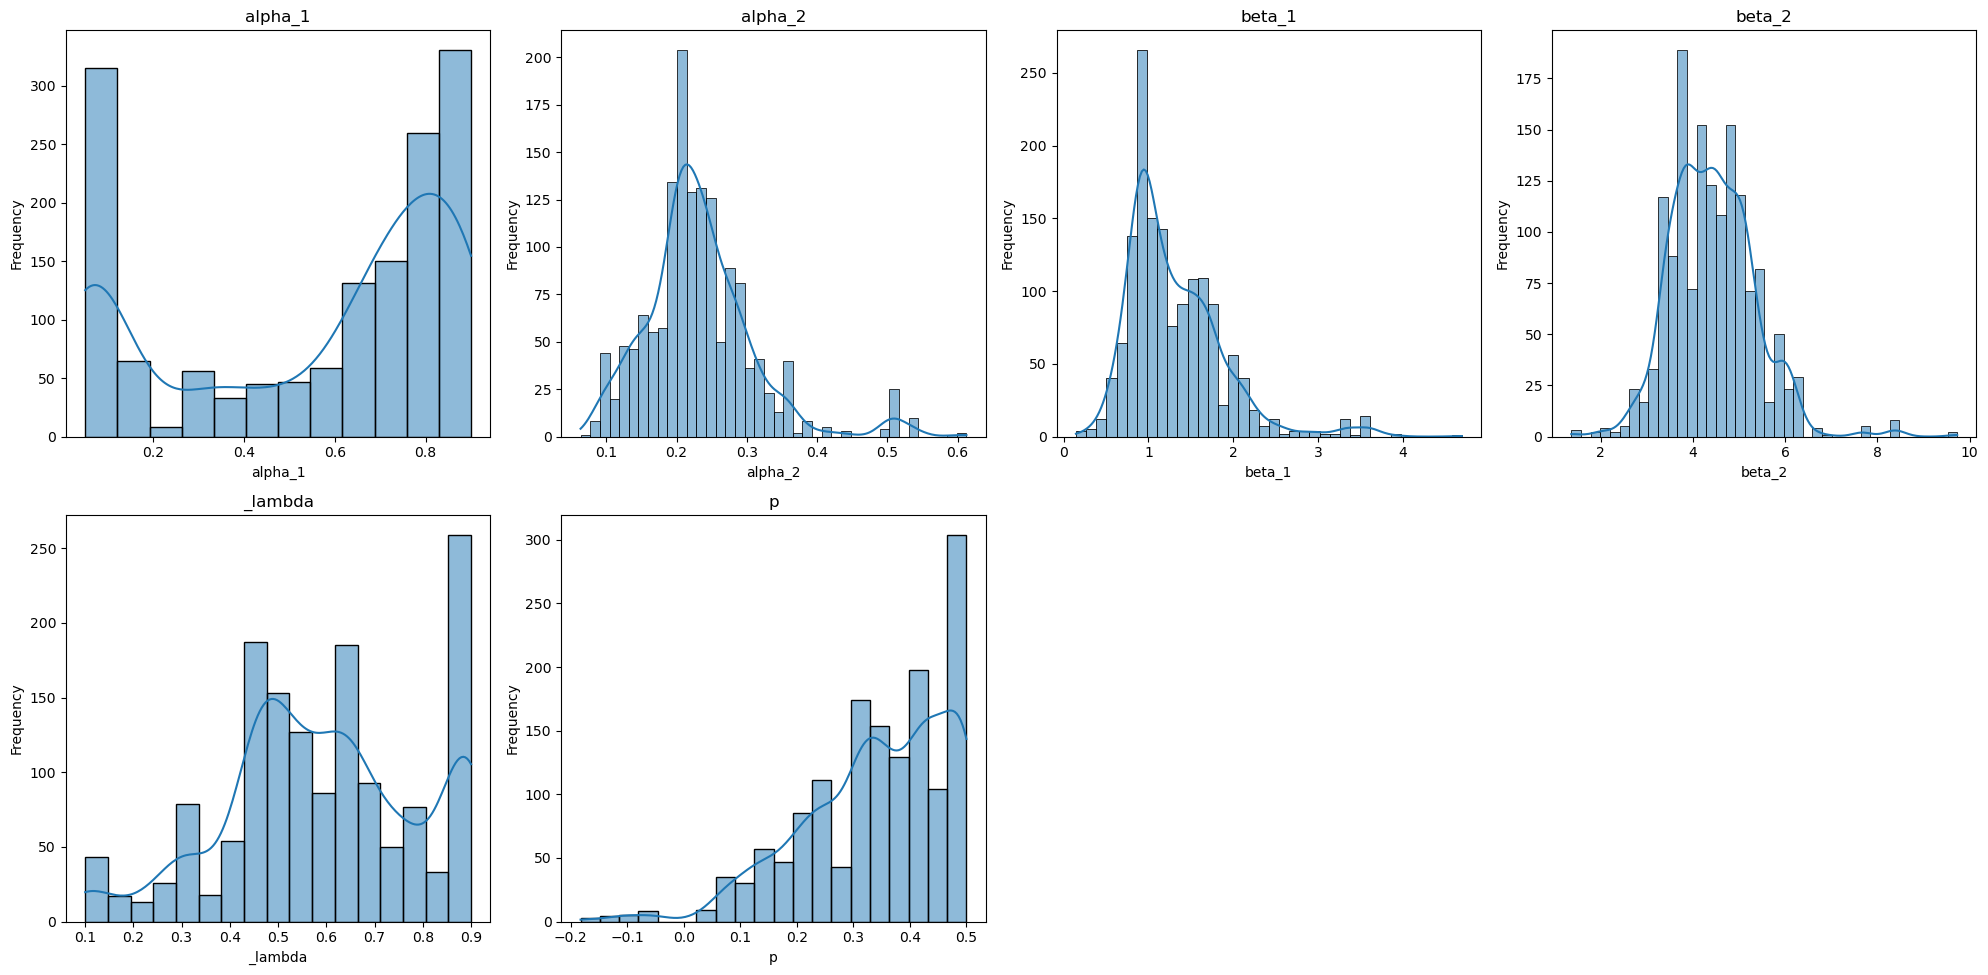

Plot saved to comparison_results/plots/samples_distribution_hybrid_mf_03-04_08-45-15.png


In [35]:
# plot the MCMC chain convergence from one of the participants fit
participant_idx = 0
if FIT_METHOD == 'MCMC':
    plot_MCMC_chain_convergence(model_best_fit_hybrid_mf['all_samples_df'][participant_idx],
                                save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'mcmc_chain_convergence_hybrid_mf.png')

# plot the samples distribution from one of the participants fit
plot_samples_distribution(model_best_fit_hybrid_mf['all_samples_df'][participant_idx],
                            save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'samples_distribution_hybrid_mf.png')

In [11]:
# hybrid_mb
agent_type = 'hybrid_mb'
parameter_space = parameter_space_hybrid_mb

model_best_fit_hybrid_mb = fit_model_to_data_list(data_all, agent_type,
                                                    parameter_space, fit_method=FIT_METHOD,
                                                    **kwargs_for_fitting_functions)

Fitting model based:   0%|          | 0/6 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

MCMC chains::   0%|          | 0/3 [00:00<?, ?it/s]

Chain 1 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 2 ::   0%|          | 0/500 [00:00<?, ?it/s]

Chain 3 ::   0%|          | 0/500 [00:00<?, ?it/s]

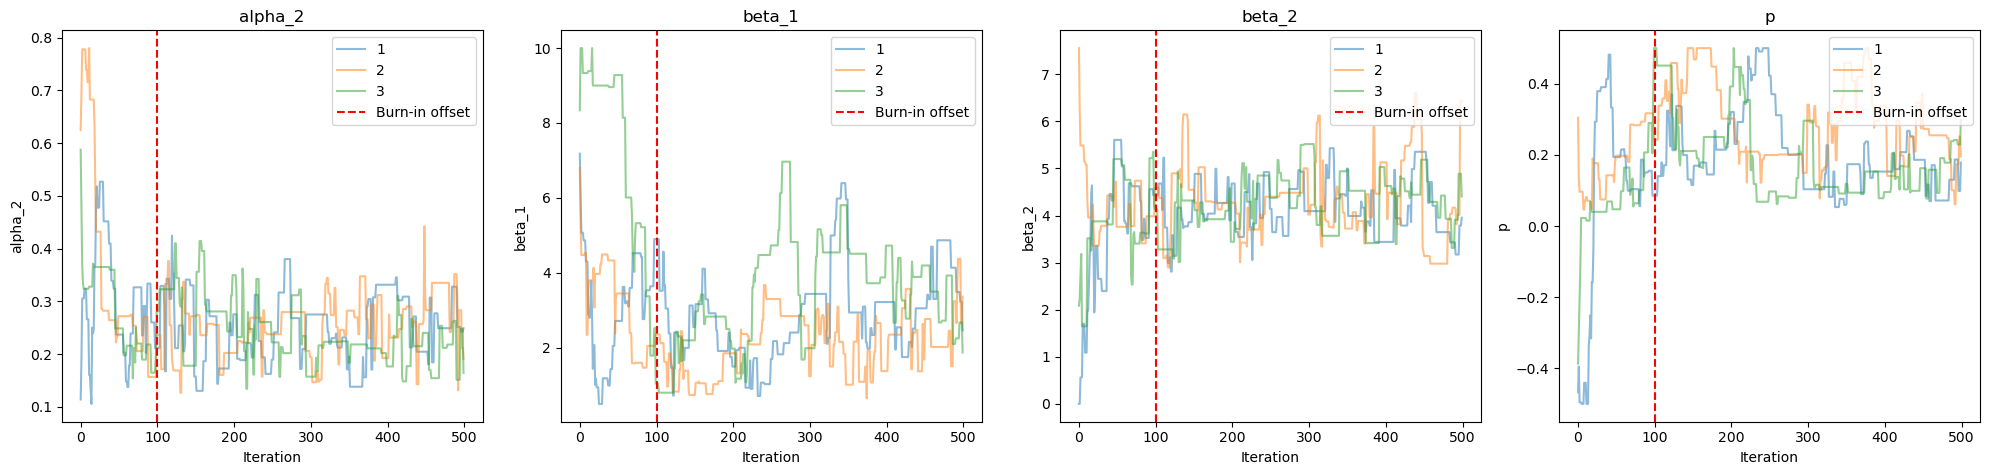

Plot saved to comparison_results/plots/mcmc_chain_convergence_hybrid_mb_03-04_08-45-20.png


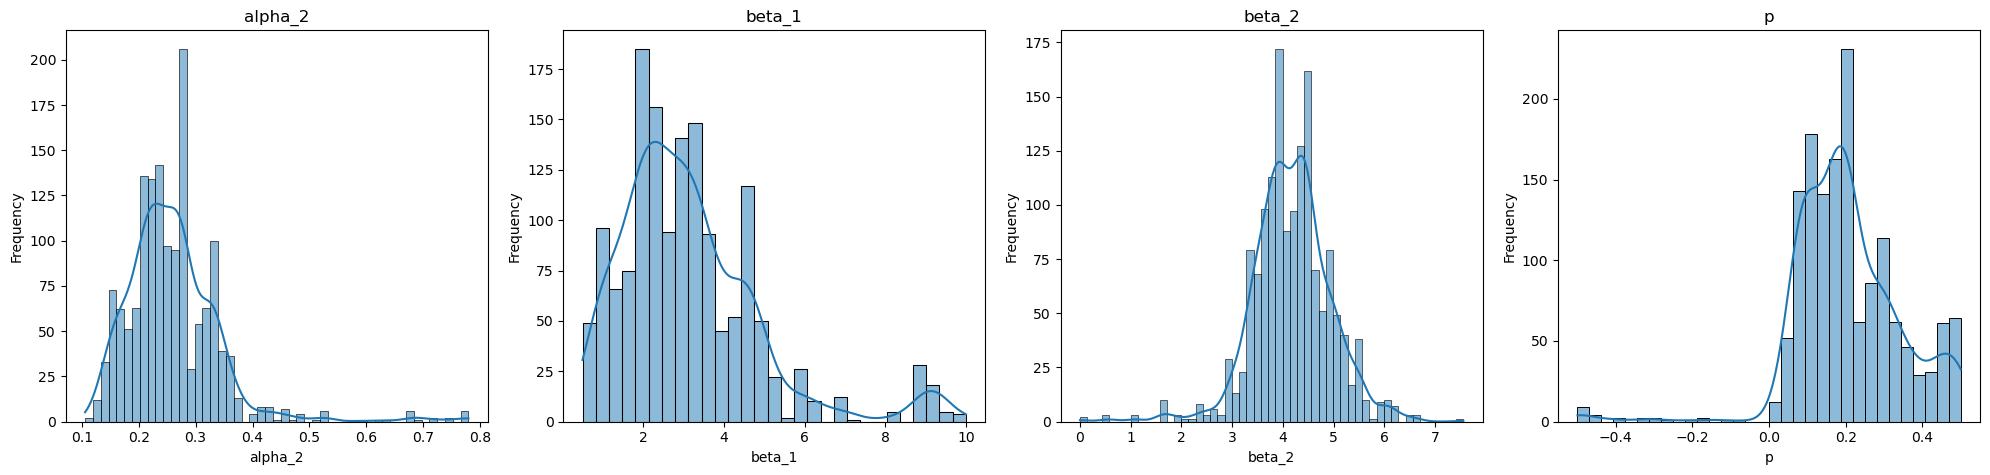

Plot saved to comparison_results/plots/samples_distribution_hybrid_mb_03-04_08-45-21.png
Parameter alpha_1 is fixed at 1.0
Parameter _lambda is fixed at 1.0
Parameter w is fixed at 1.0


2D slices::   0%|          | 0/6 [00:00<?, ?it/s]

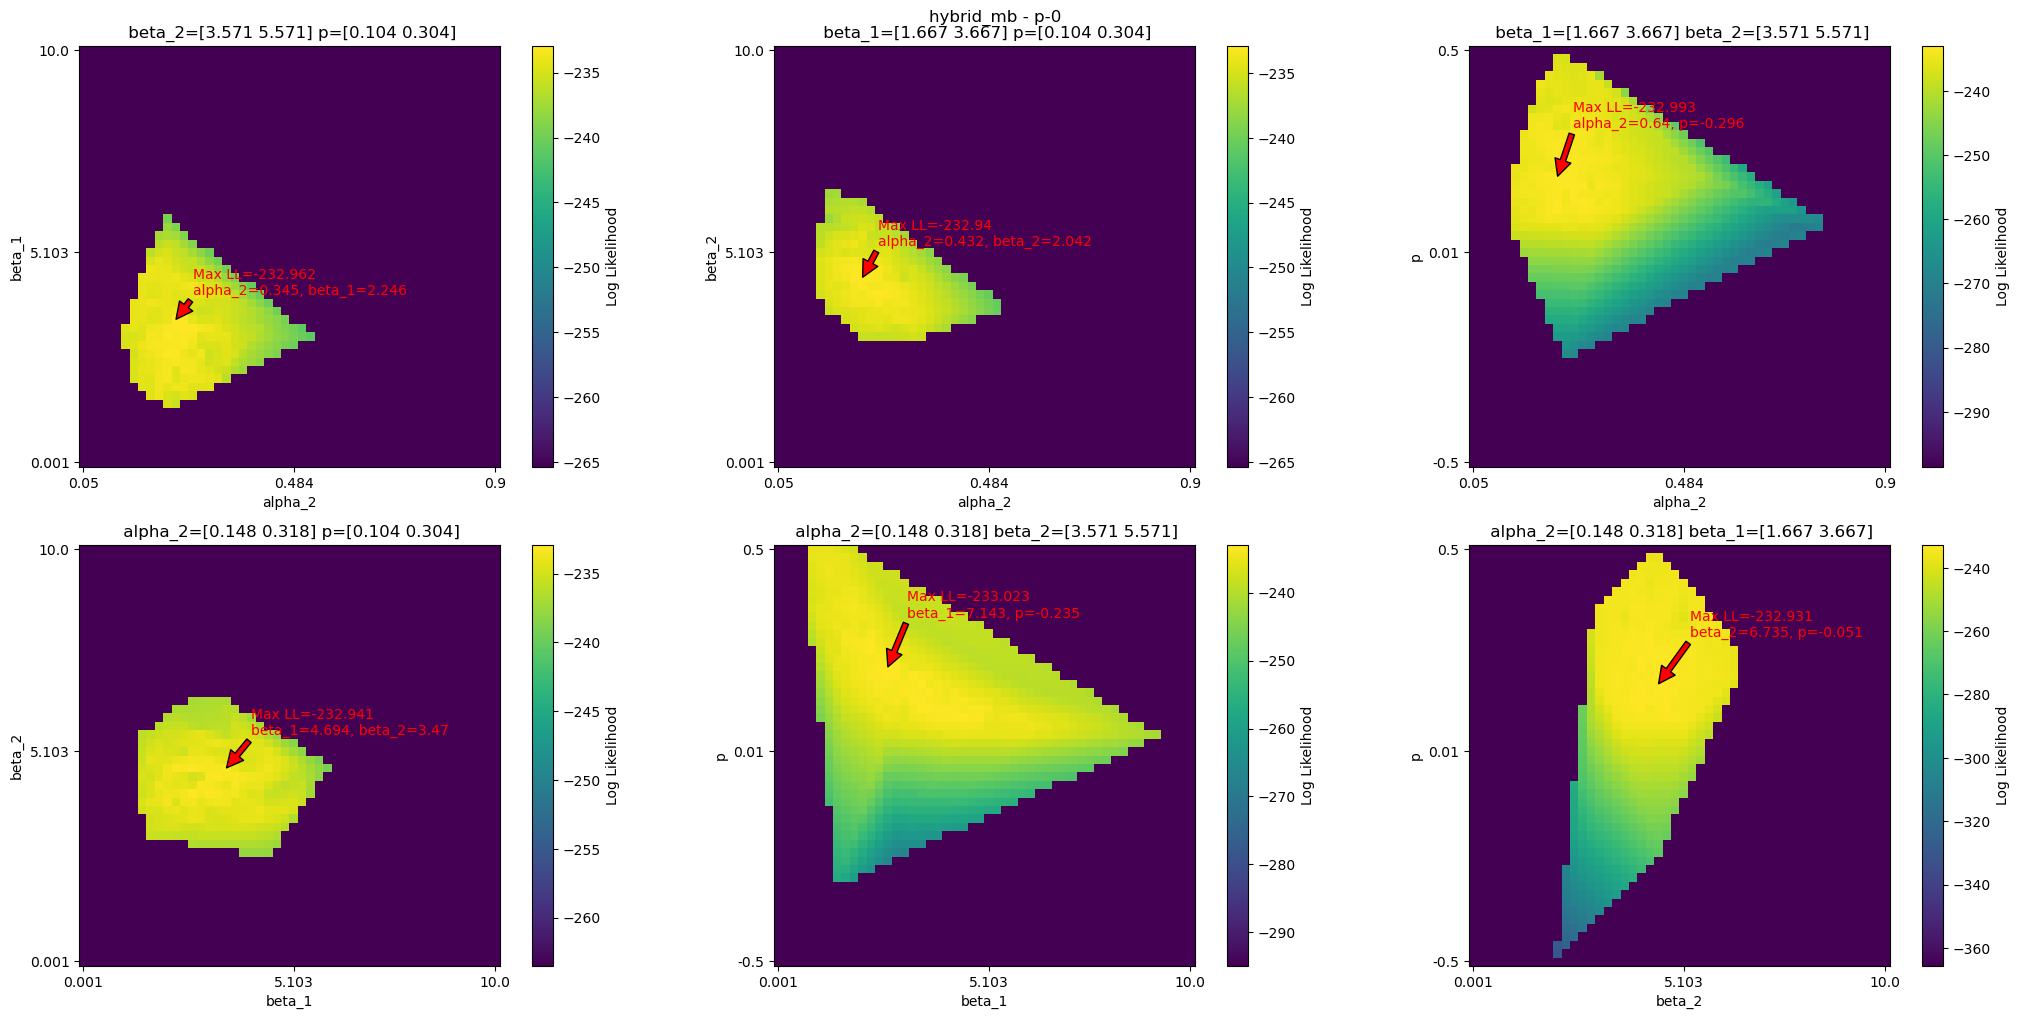

Plot saved to comparison_results/plots/fit_results_LL_hybrid_mb_03-04_08-45-22.png


In [36]:
# plot the MCMC chain convergence from one of the participants fit
participant_idx = 0
if FIT_METHOD == 'MCMC':
    plot_MCMC_chain_convergence(model_best_fit_hybrid_mb['all_samples_df'][participant_idx],
                                save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'mcmc_chain_convergence_hybrid_mb.png')

# plot the samples distribution from one of the participants fit
plot_samples_distribution(model_best_fit_hybrid_mb['all_samples_df'][participant_idx],
                          save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'samples_distribution_hybrid_mb.png')
# plot the log likelihoods surface for pairs of parameters
plot_fit_results(model_best_fit_hybrid_mb['all_samples_df'][participant_idx], parameter_space_hybrid_mb,
                 title=f'hybrid_mb - p-{participant_idx}', save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'fit_results_LL_hybrid_mb.png')


number of parameters of the pure model free and model based from the hybrid is discussed in the paper.
- hybrid has 7 parameters
- hybrid model free has 6 parameters, w is fixed to 0.
- hybrid model has 4 parameters, w is fixed to 1 and alpha 1 and lambda are arbitrary values since they don't affect the the outcome of the model.


In [37]:
# get the best fitting model for each participant based on BIC
num_trails = len(data_all[0])

comparision_results = {}
for i in range(len(data_all)):
    ll_hybrid = model_best_fit_hybrid['LL'][i]
    ll_hybrid_mf = model_best_fit_hybrid_mf['LL'][i]
    ll_hybrid_mb = model_best_fit_hybrid_mb['LL'][i]

    bic_hybrid = calculate_bic(7, num_trails, ll_hybrid)
    bic_hybrid_mf = calculate_bic(6, num_trails, ll_hybrid_mf)
    bic_hybrid_mb = calculate_bic(4, num_trails, ll_hybrid_mb)

    result = pd.DataFrame({'model': ['hybrid', 'hybrid_mf', 'hybrid_mb'],
                            'BIC': [bic_hybrid, bic_hybrid_mf, bic_hybrid_mb],
                            'LL': [ll_hybrid, ll_hybrid_mf, ll_hybrid_mb]})
    
    # get the models parameters
    params_hybrid = model_best_fit_hybrid['parameter'][i]
    params_hybrid_mf = model_best_fit_hybrid_mf['parameter'][i]
    params_hybrid_mb = model_best_fit_hybrid_mb['parameter'][i]
    # add the parameters to the result as columns
    result = pd.concat([result, pd.DataFrame([params_hybrid, params_hybrid_mf, params_hybrid_mb])], axis=1)
    
    comparision_results[i] = result

# combine the results into one dataframe and add a participant column tp it with participant ids
comparision_results_df = pd.concat(comparision_results, axis=0)
comparision_results_df = comparision_results_df.reset_index()
comparision_results_df = comparision_results_df.rename(columns={'level_0': 'participant', 'level_1': 'model_index'})
# drop the chain columns from the MCMC results
comparision_results_df = comparision_results_df.drop(columns=['chain', 'burn_in'])
# keep only the hybird model and its special cases
# comparision_results_df = comparision_results_df[comparision_results_df['model'].isin(['hybrid', 'hybrid_mf', 'hybrid_mb'])]

/tmp/ipykernel_117266/2829946453.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  comparision_results_df_display.loc[hybrid_mb_mask, 'alpha_1'] = '-'
/tmp/ipykernel_117266/2829946453.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  comparision_results_df_display.loc[hybrid_mb_mask, '_lambda'] = '-'


In [23]:
# create a copy for display purposes
comparision_results_df_display = comparision_results_df.copy()
# replace nan with '-'
comparision_results_df_display = comparision_results_df_display.fillna('-')
# drop model_index column
comparision_results_df_display = comparision_results_df_display.drop(columns=['model_index'])
# for the pure model based from hybrid, replace the arbtirary parameter values (alpha_1, _lambda) with '-'
hybrid_mb_mask = comparision_results_df_display['model'] == 'hybrid_mb'
comparision_results_df_display.loc[hybrid_mb_mask, 'alpha_1'] = '-'
comparision_results_df_display.loc[hybrid_mb_mask, '_lambda'] = '-'

/tmp/ipykernel_130363/171061456.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  comparision_results_df_display.loc[hybrid_mb_mask, 'alpha_1'] = '-'
/tmp/ipykernel_130363/171061456.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  comparision_results_df_display.loc[hybrid_mb_mask, '_lambda'] = '-'


In [24]:
# show the fitted models for each participant
display(comparision_results_df_display)

# save the results to a csv file
if SAVE_RESULTS:
    time_stamp = datetime.now().strftime("%m-%d_%H-%M-%S")
    comparision_results_df.to_csv(SAVE_DIR + 'all_comparison_results_' + time_stamp + '.csv' , index=False)
    

participant      model         BIC          LL   alpha_1   alpha_2  \
0             0     hybrid  498.265677 -230.588727       0.9  0.220656   
1             0  hybrid_mf  492.999759 -230.604927  0.875709  0.254206   
2             0  hybrid_mb  486.830371 -232.818551         -  0.232952   
3             1     hybrid  568.610333 -265.761056  0.685539  0.082168   
4             1  hybrid_mf  558.738720 -263.474408  0.277323  0.163158   
5             1  hybrid_mb  564.166044 -271.486387         -  0.392678   
6             2     hybrid  455.634706 -209.273242  0.695816  0.137463   
7             2  hybrid_mf  450.981209 -209.595653  0.580014  0.116937   
8             2  hybrid_mb  452.075827 -215.441279         -  0.076050   
9             3     hybrid  574.983867 -268.947823  0.678035  0.808078   
10            3  hybrid_mf  572.505004 -270.357550  0.343509  0.580886   
11            3  hybrid_mb  561.985916 -270.396323         -  0.785124   
12            4     hybrid  580.413985 -271.662882  0.666858  0.528561   
13            4  hybrid_mf  574.111813 -271.160954  0.116719  0.444160   
14            4  hybrid_mb  568.492628 -273.649679         -  0.274095   
15            5     hybrid  582.084669 -272.498224       0.9  0.771823   
16            5  hybrid_mf  577.569823 -272.889960  0.597418  0.900000   
17            5  hybrid_mb  571.444262 -275.125496         -  0.452867   

      beta_1    beta_2   _lambda         w         p  
0   2.466273  4.299907  0.429437  0.492703  0.228830  
1   1.831408  4.383996  0.566666  0.000000  0.095724  
2   2.667238  4.570953         -  1.000000  0.204039  
3   1.955993  0.001000  0.564547  0.280174  0.197225  
4   2.229409  0.001000  0.689399  0.000000  0.196411  
5   1.015017  0.001000         -  1.000000  0.500000  
6   4.449424  5.113545   0.87384  0.709543 -0.050877  
7   1.563133  5.467593  0.680743  0.000000 -0.180531  
8   3.537785  5.635383         -  1.000000 -0.013706  
9   1.032466  0.490481  0.711461  0.584780  0.346987  
10  0.860992  0.568304  0.504632  0.000000  0.500000  
11  0.820383  0.557856         -  1.000000  0.384138  
12  0.744285  0.658761  0.792421  0.204790 -0.072023  
13  2.139746  0.856169  0.371944  0.000000 -0.079194  
14  1.524487  1.004446         -  1.000000 -0.073902  
15  1.009543  0.001000  0.136781  0.372815  0.202482  
16  0.725348  0.001000   0.52844  0.000000  0.298455  
17  1.622572  0.001000         -  1.000000  0.139361

## <spin style="color:green"> Results Analysis </spin>

### Best fitting model for each participant based on BIC

In [25]:
# get the best model for each participant based on BIC
best_model_bic = comparision_results_df.groupby('participant').apply(lambda x: x.loc[x['BIC'].idxmin()]).reset_index(drop=True)
# for display purposes
best_model_bic_display = comparision_results_df_display.groupby('participant').apply(lambda x: x.loc[x['BIC'].idxmin()]).reset_index(drop=True)

In [26]:
# show the best model for each participant
display(best_model_bic_display)
# save the best model for each participant to a csv file
if SAVE_RESULTS:
    best_model_bic.to_csv(SAVE_DIR + 'best_model_bic_' + time_stamp + '.csv' , index=False)

participant      model         BIC          LL   alpha_1   alpha_2  \
0            0  hybrid_mb  486.830371 -232.818551         -  0.232952   
1            1  hybrid_mf  558.738720 -263.474408  0.277323  0.163158   
2            2  hybrid_mf  450.981209 -209.595653  0.580014  0.116937   
3            3  hybrid_mb  561.985916 -270.396323         -  0.785124   
4            4  hybrid_mb  568.492628 -273.649679         -  0.274095   
5            5  hybrid_mb  571.444262 -275.125496         -  0.452867   

     beta_1    beta_2   _lambda    w         p  
0  2.667238  4.570953         -  1.0  0.204039  
1  2.229409  0.001000  0.689399  0.0  0.196411  
2  1.563133  5.467593  0.680743  0.0 -0.180531  
3  0.820383  0.557856         -  1.0  0.384138  
4  1.524487  1.004446         -  1.0 -0.073902  
5  1.622572  0.001000         -  1.0  0.139361

### Parameter Sstimations Statistics

In [55]:
# get the median and the 25th and 75th quantiles of the parameter estimates
param_estimates = best_model_bic.loc[:, ['alpha_2', 'beta_1', 'beta_2', 'w', 'p']]
param_estimates_median = param_estimates.median()  # Corrected from .mean() to .median()
param_estimates_25th = param_estimates.quantile(0.25)
param_estimates_75th = param_estimates.quantile(0.75)

# for alpha_1 and _lambda, estimate them from the hybrid and model-free only 
# (alpha_1 and _lambda have arbitrary values for the pure model based )
param_estimates_alpha_1_lambda = best_model_bic[best_model_bic['model'].isin(['hybrid', 'hybrid_mf'])][['alpha_1', '_lambda']]
param_estimates_alpha_1_lambda_median = param_estimates_alpha_1_lambda.median()  # Corrected from .mean() to .median()
param_estimates_alpha_1_lambda_25th = param_estimates_alpha_1_lambda.quantile(0.25)
param_estimates_alpha_1_lambda_75th = param_estimates_alpha_1_lambda.quantile(0.75)

# combine the median and the 25th and 75th quantiles into one dataframe
param_estimates_df = pd.concat({'25th': param_estimates_25th,
                                'median':param_estimates_median,
                                '75th': param_estimates_75th}, axis=1)
param_estimates_alpha_1_lambda_df = pd.concat({'25th':param_estimates_alpha_1_lambda_25th,
                                               'median':param_estimates_alpha_1_lambda_median,
                                               '75th':param_estimates_alpha_1_lambda_75th}, axis=1)
# combine all the estimates into one dataframe
param_estimates_df = pd.concat([param_estimates_df, param_estimates_alpha_1_lambda_df], axis=0)
param_estimates_df = param_estimates_df.T
# reorder the columns
param_estimates_df = param_estimates_df[['alpha_1', 'alpha_2', 'beta_1', 'beta_2', '_lambda', 'p', 'w']]
display(param_estimates_df)

if SAVE_RESULTS:
    # round the estimates to 3 decimal places
    param_estimates_df = param_estimates_df.round(3)
    param_estimates_df.to_csv(SAVE_DIR + 'param_estimates_df_' + time_stamp + '.csv' , index=False)
    print(f'param_estimates_df_{time_stamp}.csv saved under {SAVE_DIR}')



alpha_1   alpha_2    beta_1    beta_2   _lambda         p     w
25th    0.352996  0.180606  1.534149  0.140214  0.682907 -0.020586  0.25
median  0.428669  0.253523  1.592853  0.781151  0.685071  0.167886  1.00
75th    0.504342  0.408174  2.077700  3.679326  0.687235  0.202132  1.00

param_estimates_df_03-04_14-43-52.csv saved under comparison_results/


### Preferance to hybrid model over the pure model free and model based using log likelihood ratio test 

In [18]:
# setting up the hypothesis for the log likelihood ratio test
# set the null and alternative hypothesis models
null_hypothesis_models =  ['hybrid_mf', 'hybrid_mb']
alternative_hypothesis_model = 'hybrid'
# define the p value threshold
p_value_threshold = 0.05

# since our models are nested, the degree of freedom is the difference in the number of parameters
df_hybrid_mf = 1  # 7(hybrid) - 6(mf)
df_hybrid_mb = 3  # 7(hybrid) - 4(mb)
df_mf_mb = 2  # 4(mb) - 6(mf)
# table to store the results for all combinations
df_combinations = [{'model_0': 'hybrid', 'model_1': 'hybrid_mf', 'df': df_hybrid_mf},
                   {'model_0': 'hybrid', 'model_1': 'hybrid_mb', 'df': df_hybrid_mb},
                   {'model_0': 'hybrid_mf', 'model_1': 'hybrid_mb', 'df': df_mf_mb},
                   {'model_0': 'hybrid_mf', 'model_1': 'hybrid', 'df': -df_hybrid_mf},
                   {'model_0': 'hybrid_mb', 'model_1': 'hybrid', 'df': -df_hybrid_mb},
                   {'model_0': 'hybrid_mb', 'model_1': 'hybrid_mf', 'df': -df_mf_mb}]
df_differences = pd.DataFrame(df_combinations)
# display the table
# display(df_differences)

# define a structure for the summary data
summary_data = {
    'Model': [alternative_hypothesis_model] + null_hypothesis_models,
    '-LL': [],
    'Number Favoring Hybrid': [],
    'Aggregate LRT': []
}
individual_results = []

# calculate the required statistics
for model_type in summary_data['Model']:
    # calculate only the -ll for the hybrid model
    if model_type == alternative_hypothesis_model:
        negative_ll = -comparision_results_df[comparision_results_df['model'] == model_type]['LL'].sum()
        summary_data['-LL'].append(negative_ll)
        summary_data['Number Favoring Hybrid'].append(np.nan)
        summary_data['Aggregate LRT'].append(np.nan)
        continue

    # filter rows for the current model type and the hybrid model
    filtered_df = comparision_results_df[(comparision_results_df['model'] == model_type) | 
                                         (comparision_results_df['model'] == alternative_hypothesis_model)]
    
    # -LL (negative sum of log-likelihoods)
    negative_ll = -filtered_df[filtered_df['model'] == model_type]['LL'].sum()
    
    # perform the log likelihood ratio test and count how many favor the hybrid model
    favor_hybrid = 0
    lrt_statistics = []
    participants = filtered_df['participant'].unique()
    for participant in participants:
        ll_hybrid = filtered_df[(filtered_df['participant'] == participant) & 
                                (filtered_df['model'] == 'hybrid')]['LL'].values[0]
        ll_other = filtered_df[(filtered_df['participant'] == participant) & 
                               (filtered_df['model'] == model_type)]['LL'].values[0]
        # calculate the LR statistic
        LR = 2 * (ll_hybrid - ll_other)
        lrt_statistics.append(LR)

        # get the right degree of freedom
        df = df_differences[(df_differences['model_0'] == alternative_hypothesis_model) & 
                            (df_differences['model_1'] == model_type)]['df'].values[0]
        # check the degree of freedom
        # print(f'Degree of freedom for {alternative_hypothesis_model} vs {model_type}: {df}')
        
        # calculate the p value
        p_value = chi2.sf(LR, df=df)
        # if the p value is significant, increment the counter
        if p_value < p_value_threshold:
            favor_hybrid += 1

        individual_results.append({
            'Participant': participant,
            f'Favor {alternative_hypothesis_model} over {model_type}': True if p_value < p_value_threshold else False,
            f'LRT - {model_type}': f'{LR:.2f}, p < {p_value:.2e}'
        })
    
    # aggregate LRT (Sum of LRT statistics) and calculate p-value
    aggregate_lrt = np.sum(lrt_statistics)
    aggregate_p = chi2.sf(aggregate_lrt, df=len(lrt_statistics))
    
    # append results to summary_data
    summary_data['-LL'].append(negative_ll)
    summary_data['Number Favoring Hybrid'].append(favor_hybrid)
    summary_data['Aggregate LRT'].append(f'{aggregate_lrt:.2f}, p < {aggregate_p:.2e}')
                            
# Create summary DataFrame
summary_df = pd.DataFrame(summary_data)
# replace nan with '-'
summary_df.fillna('-', inplace=True)

# Create individual results DataFrame
individual_results_df = pd.DataFrame(individual_results)
individual_results_df = individual_results_df.groupby('Participant').first().reset_index()
# reorder the columns for better readability
individual_results_df = individual_results_df[['Participant', 
                                               f'Favor {alternative_hypothesis_model} over {null_hypothesis_models[0]}',
                                               f'Favor {alternative_hypothesis_model} over {null_hypothesis_models[1]}',
                                               f'LRT - {null_hypothesis_models[0]}',
                                               f'LRT - {null_hypothesis_models[1]}']]
# Display the summary DataFrame
display(summary_df)
# Display the individual results DataFrame
display(individual_results_df)

/tmp/ipykernel_130363/1711711956.py:92: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summary_df.fillna('-', inplace=True)


Model          -LL Number Favoring Hybrid        Aggregate LRT
0     hybrid  1518.731954                      -                    -
1  hybrid_mf  1518.083451                    0.0  -1.30, p < 1.00e+00
2  hybrid_mb  1538.917716                    2.0  40.37, p < 3.85e-07

Participant Favor hybrid over hybrid_mf Favor hybrid over hybrid_mb  \
0            0                       False                       False   
1            1                       False                        True   
2            2                       False                        True   
3            3                       False                       False   
4            4                       False                       False   
5            5                       False                       False   

       LRT - hybrid_mf      LRT - hybrid_mb  
0   0.03, p < 8.57e-01   4.46, p < 2.16e-01  
1  -4.57, p < 1.00e+00  11.45, p < 9.52e-03  
2   0.64, p < 4.22e-01  12.34, p < 6.32e-03  
3   2.82, p < 9.31e-02   2.90, p < 4.08e-01  
4  -1.00, p < 1.00e+00   3.97, p < 2.64e-01  
5   0.78, p < 3.76e-01   5.25, p < 1.54e-01

### participants data that we fitted on

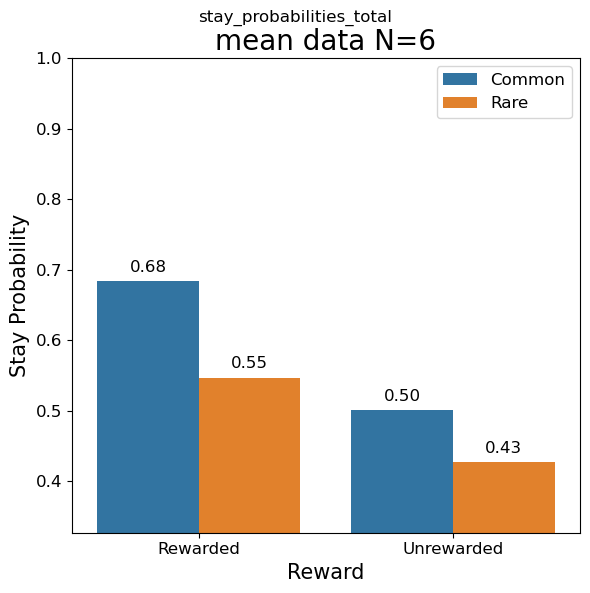

Plot saved to comparison_results/plots/mean_stay_probabilities_data_03-04_13-28-19.png
Labels not provided or not matching the number of dataframes, using default labels
generated labels: ['data 1', 'data 2', 'data 3', 'data 4', 'data 5', 'data 6']


/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/behavioral_analysis.py:662: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks_labels, rotation=45)


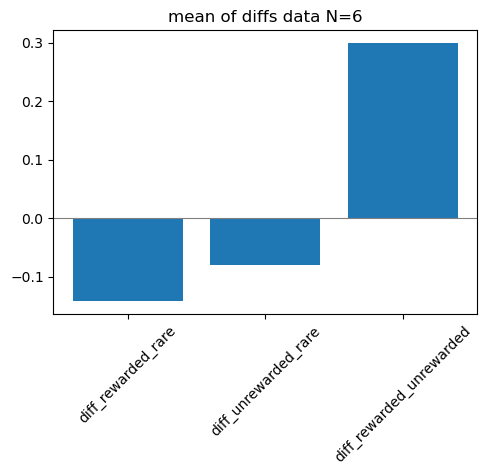

Plot saved to comparison_results/plots/mean_stay_probabilities_paired_diffs_data_03-04_13-28-19.png


In [19]:
# plot the mean stay probabilities over all participants
data_all_combined = pd.concat(data_all)

stay_probabilities_total = calc_plot_stay_probabilities(dfs=data_all_combined,
                                        labels=[f'mean data N={len(data_all)}'],
                                        title='stay_probabilities_total', max_plots_per_row=4,
                                        save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'mean_stay_probabilities_data.png')
# plot the mean stay probability paired differences
data_all_stay_probabilities = calc_plot_stay_probabilities(dfs=data_all, title='stay_probabilities_total', plot=False, return_df=True)
stay_probabilities_data_nolabels = list(data_all_stay_probabilities.values())
calc_plot_stay_probability_paired_diffs([stay_probabilities_data_nolabels], model_titles=[f'mean of diffs data N={len(data_all)}'],
                                        max_plots_per_row=3, return_df=False,
                                        save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'mean_stay_probabilities_paired_diffs_data.png')


### <spin style="color: green"> simulate behavior from the best models </spin>

In [56]:
# simulate behavior from the best fitted models
simulated_data = []
seed = 0
# iterate over the best models dataframe
for i, row in best_model_bic.iterrows():
    # get the parameters of the best models 
    params = row[['alpha_1', 'alpha_2', 'beta_1', 'beta_2', '_lambda', 'w', 'p']].to_dict()
    # simulate the best model for the participant
    sim_data, _ = simulate(agent_type=row['model'], params=params, seed=seed, from_data=data_all[row['participant']])
    # add the simulated data to the dictionary
    simulated_data.append(sim_data)

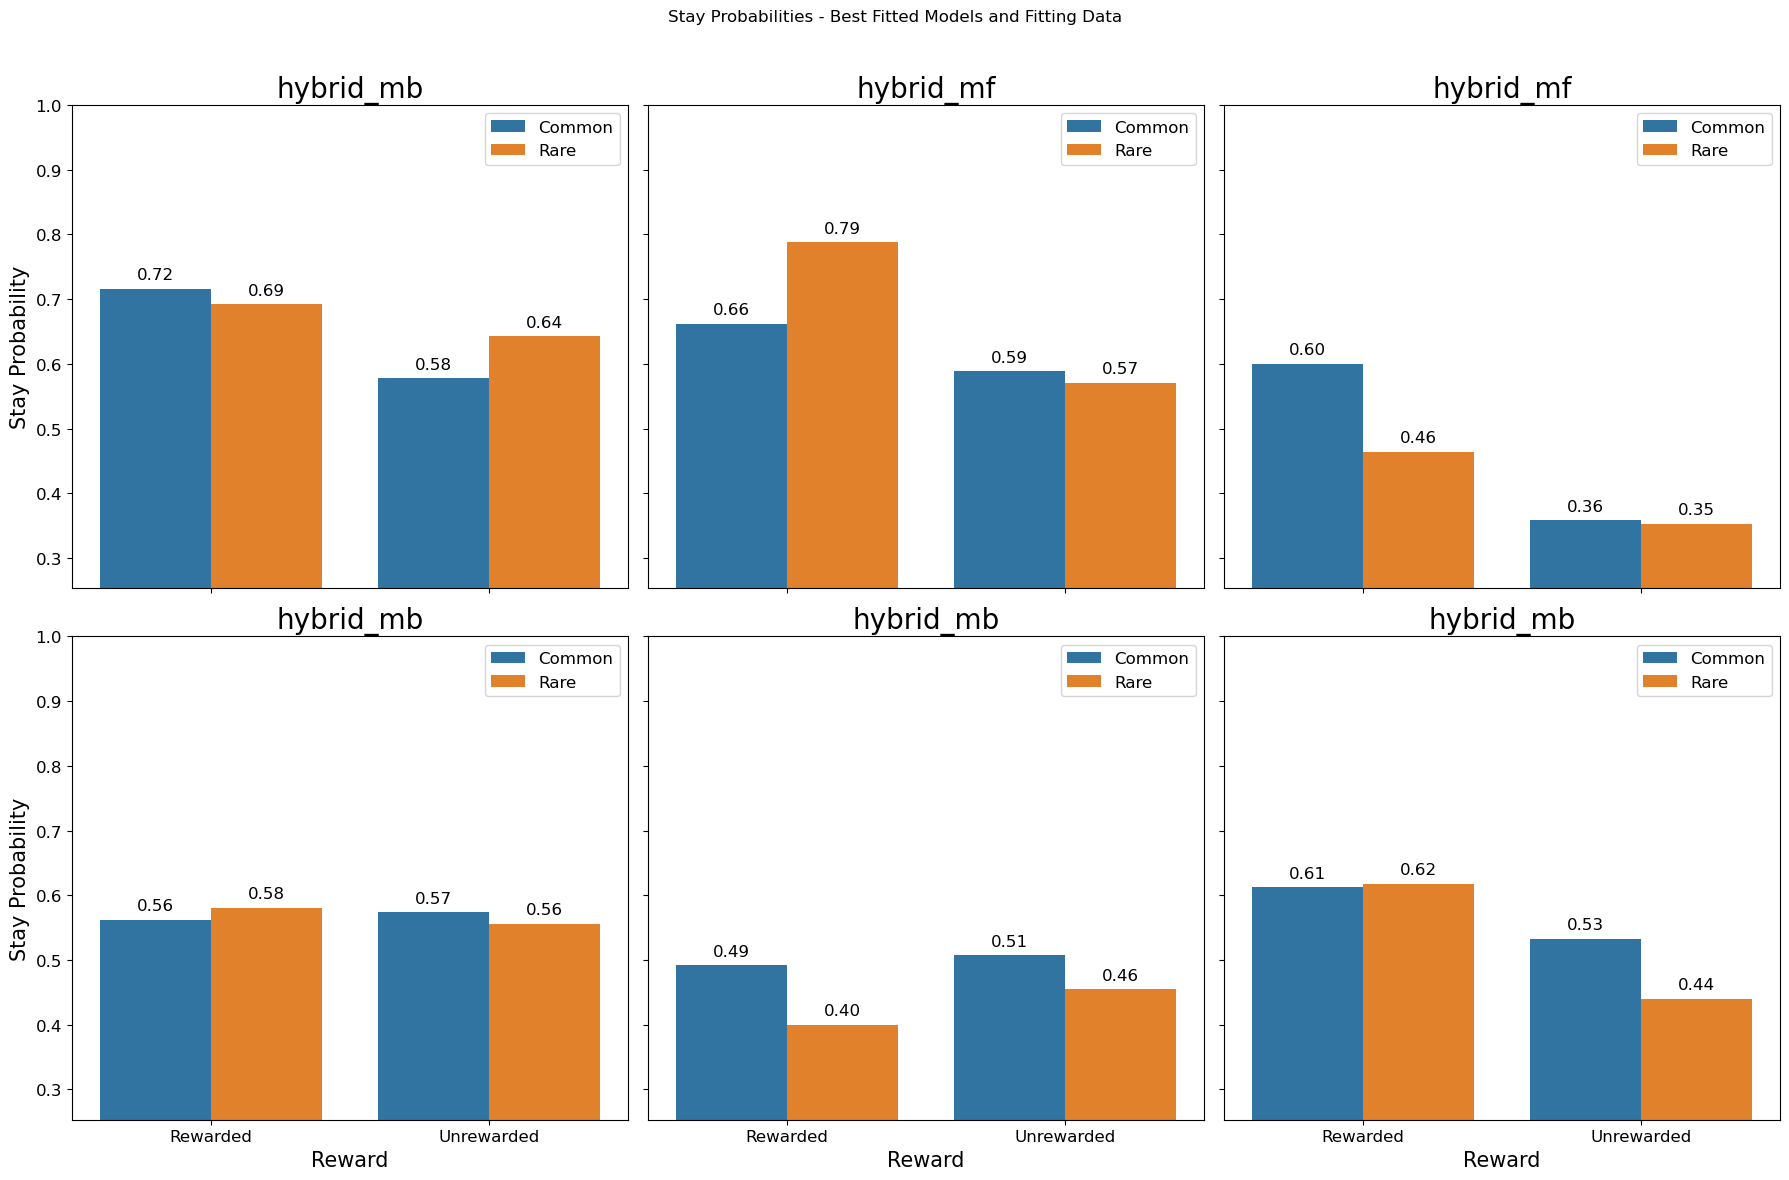

In [57]:
# plot stay probabilities for the best fitted models and the fitting data
best_models_labels = best_model_bic['model'].values.tolist()

participant_and_models_data = data_all + simulated_data
participant_and_models_labels = data_all_labels + best_models_labels

calc_plot_stay_probabilities(dfs=simulated_data, labels=best_models_labels,
                             title='Stay Probabilities - Best Fitted Models and Fitting Data',
                             max_plots_per_row=len(simulated_data)//2, return_df=False,)


In [75]:
# sample simulated behaviour from the model for better approximation/analysis
NUM_SAMPLES = 100
# generate random seeds for the simulation samples
random_seeds = np.random.randint(1000 + NUM_SAMPLES ** 2, size=NUM_SAMPLES)
simulated_behaviour_samples = []
# iterate over the best models dataframe
for i, row in tqdm(best_model_bic.iterrows(), desc='Simulating modles', total=len(best_model_bic)):
    samples = []
    for seed in tqdm(random_seeds, desc='Simulating samples', leave=False, total=NUM_SAMPLES):
        # get the parameters of the best models 
        params = row[['alpha_1', 'alpha_2', 'beta_1', 'beta_2', '_lambda', 'w', 'p']].to_dict()
        # simulate the best model for the participant
        sim_data, _ = simulate(agent_type=row['model'], params=params, seed=seed)
        samples.append(sim_data)
    simulated_behaviour_samples.append(samples)


Simulating modles:   0%|          | 0/6 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [76]:
# average the samples
simulated_behaviour_samples_combined = []
for samples in simulated_behaviour_samples:
    combined_samples = pd.concat(samples)
    simulated_behaviour_samples_combined.append(combined_samples)

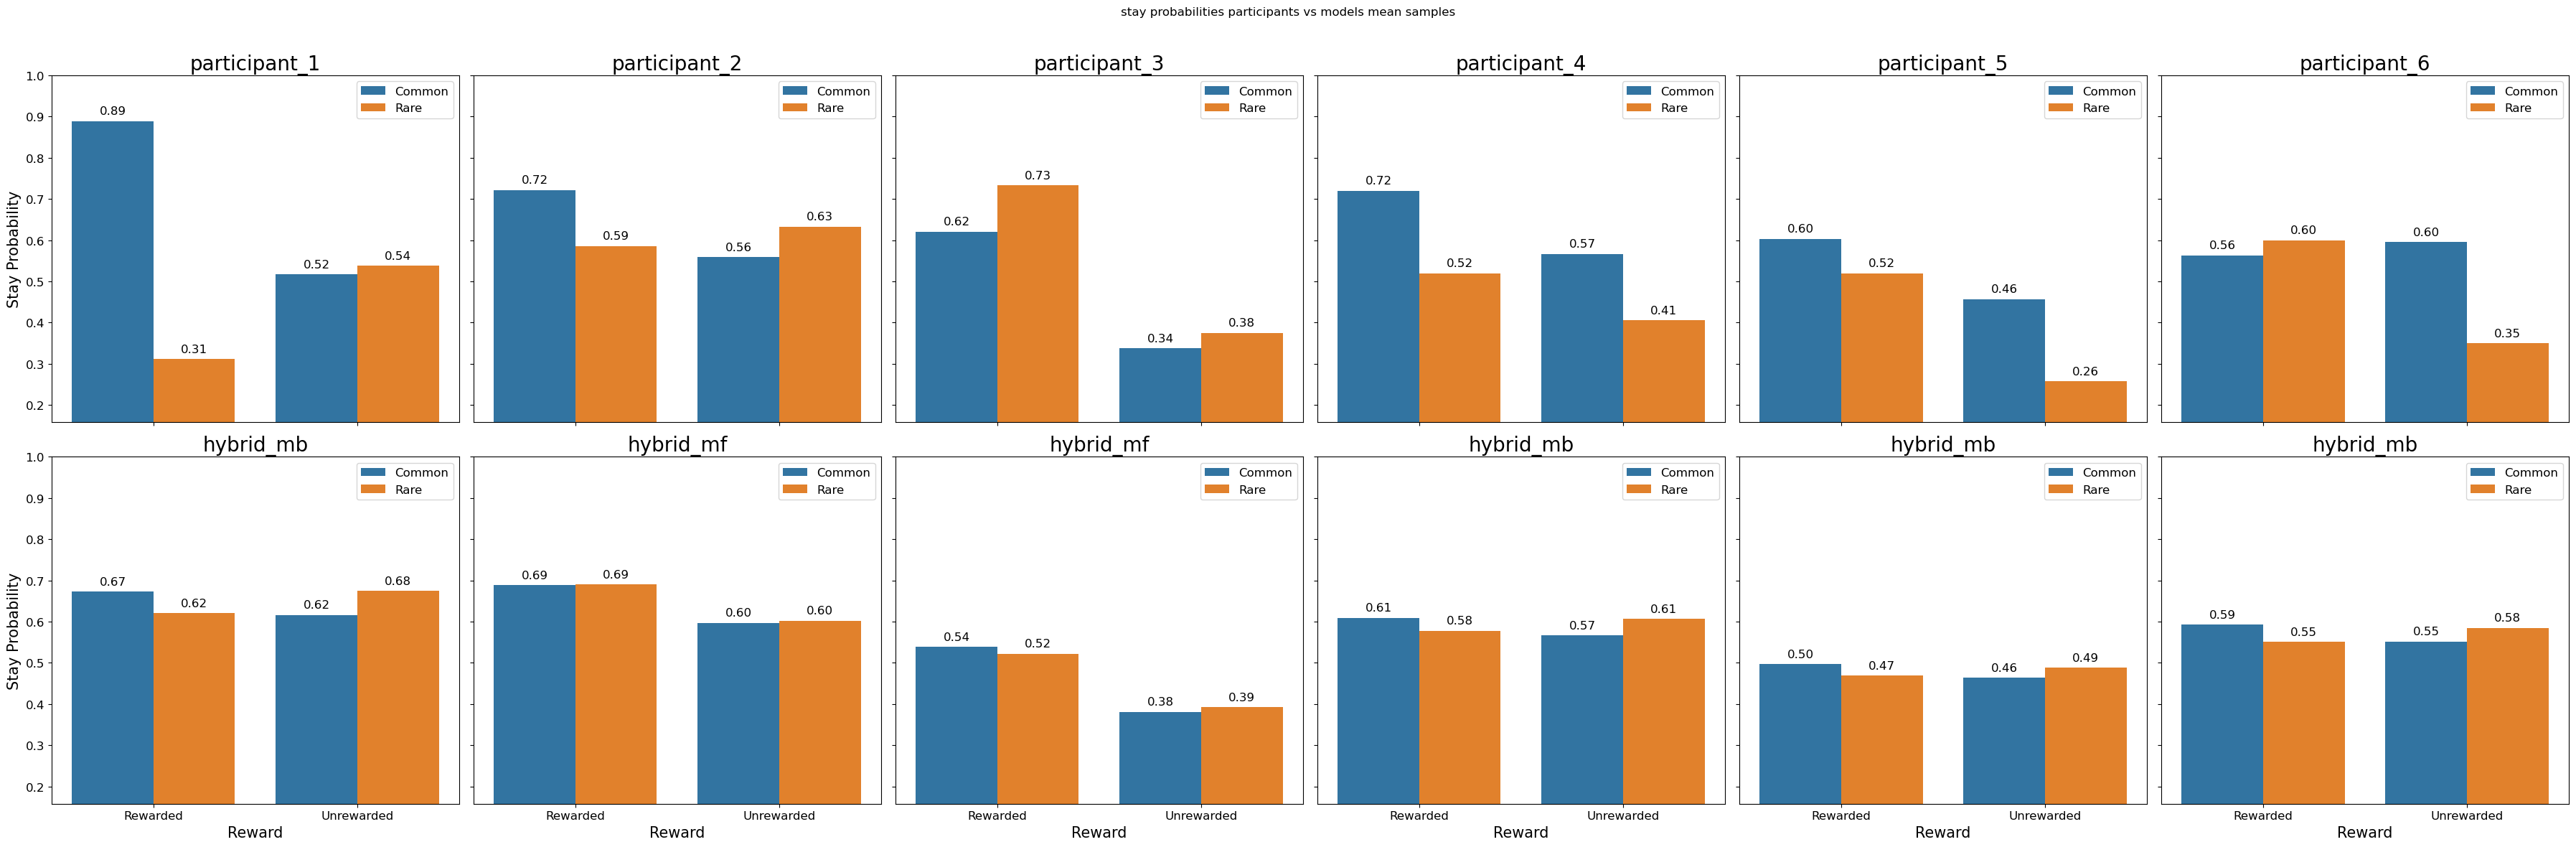

Plot saved to comparison_results/plots/comparision_mean_samples_03-04_19-26-14.png


In [83]:
# stay probabilities side by side
data_combined = data_all + simulated_behaviour_samples_combined
calc_plot_stay_probabilities(dfs=data_combined, labels=participant_and_models_labels,
                            title='stay probabilities participants vs models mean samples', max_plots_per_row=len(data_combined)//2,
                            save=SAVE_RESULTS, filename= SAVE_DIR_PLOTS + 'comparision_mean_samples.png',
                            return_df=False)

/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/behavioral_analysis.py:662: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks_labels, rotation=45)
/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/behavioral_analysis.py:662: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks_labels, rotation=45)
/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/behavioral_analysis.py:662: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks_labels, rotation=45)
/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/behavioral_analysis.py:662: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ti

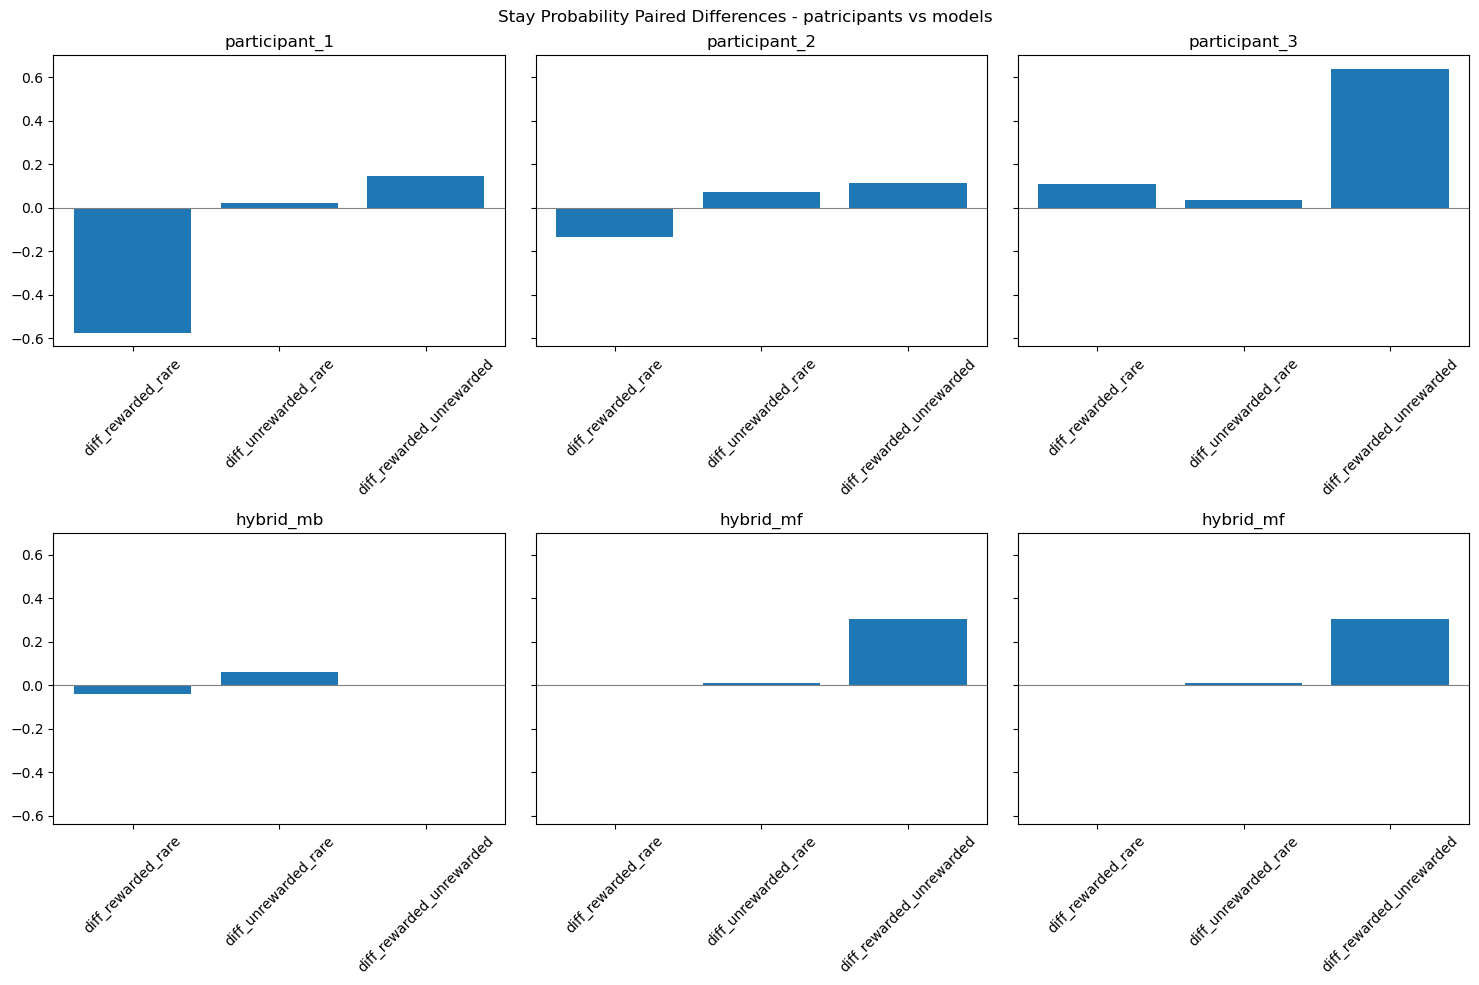

Plot saved to comparison_results/plots/stay_probability_paired_diffs_half_1_03-04_16-19-06.png


/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/behavioral_analysis.py:662: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks_labels, rotation=45)
/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/behavioral_analysis.py:662: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks_labels, rotation=45)
/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/behavioral_analysis.py:662: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks_labels, rotation=45)
/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/behavioral_analysis.py:662: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ti

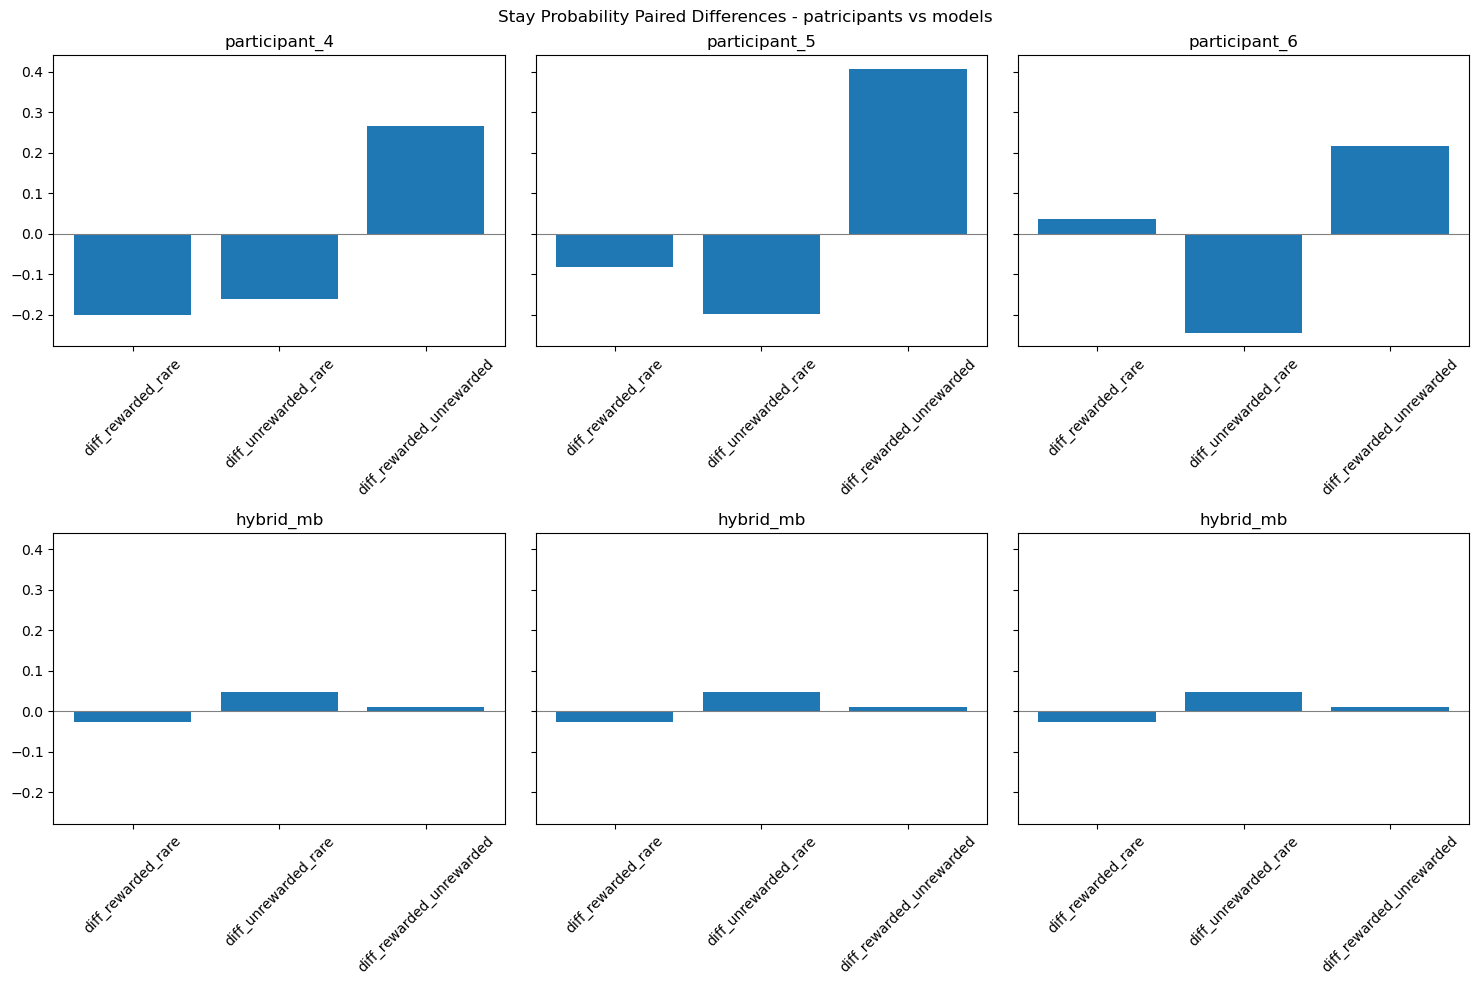

Plot saved to comparison_results/plots/stay_probability_paired_diffs_half_2_03-04_16-19-07.png


In [65]:
simulated_behaviour_samples_list = [simulated_behaviour_samples[id] for id in range(len(simulated_behaviour_samples))]
simulated_behaviour_samples_stay_prob = []
for id, samples in enumerate(simulated_behaviour_samples_list):
    stay_probs = []
    for sample in samples:
        sample_stay_prob = calculate_stay_probability(sample)
        stay_probs.append(sample_stay_prob)
    simulated_behaviour_samples_stay_prob.append(stay_probs)

# all data as list of lists for the stay probability paired differences comaarison
data_all_stay_prob = [calculate_stay_probability(data) for data in data_all]
data_all_lists = [[stay_prob] for stay_prob in data_all_stay_prob]
# calculate the stay 
combined_data_diffs_half_1 = data_all_lists[:len(data_all)//2] + simulated_behaviour_samples_stay_prob[:len(data_all)//2]
combined_data_diffs_half_1_labels_1 = data_all_labels[:len(data_all)//2] + best_models_labels[:len(data_all)//2] 
combined_data_diffs_half_2 = data_all_lists[len(data_all)//2:] + simulated_behaviour_samples_stay_prob[len(data_all)//2:]
combined_data_diffs_half_2_labels_2 = data_all_labels[len(data_all)//2:] + best_models_labels[len(data_all)//2:]

# plot the paired differences
calc_plot_stay_probability_paired_diffs(combined_data_diffs_half_1, combined_data_diffs_half_1_labels_1,
                                       title='Stay Probability Paired Differences - patricipants vs models',
                                       max_plots_per_row=len(combined_data_diffs_half_1)//2, return_df=False,
                                       save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'stay_probability_paired_diffs_half_1.png')

calc_plot_stay_probability_paired_diffs(combined_data_diffs_half_2, combined_data_diffs_half_2_labels_2,
                                        title='Stay Probability Paired Differences - patricipants vs models',
                                        max_plots_per_row=len(combined_data_diffs_half_2)//2, return_df=False,
                                        save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'stay_probability_paired_diffs_half_2.png')


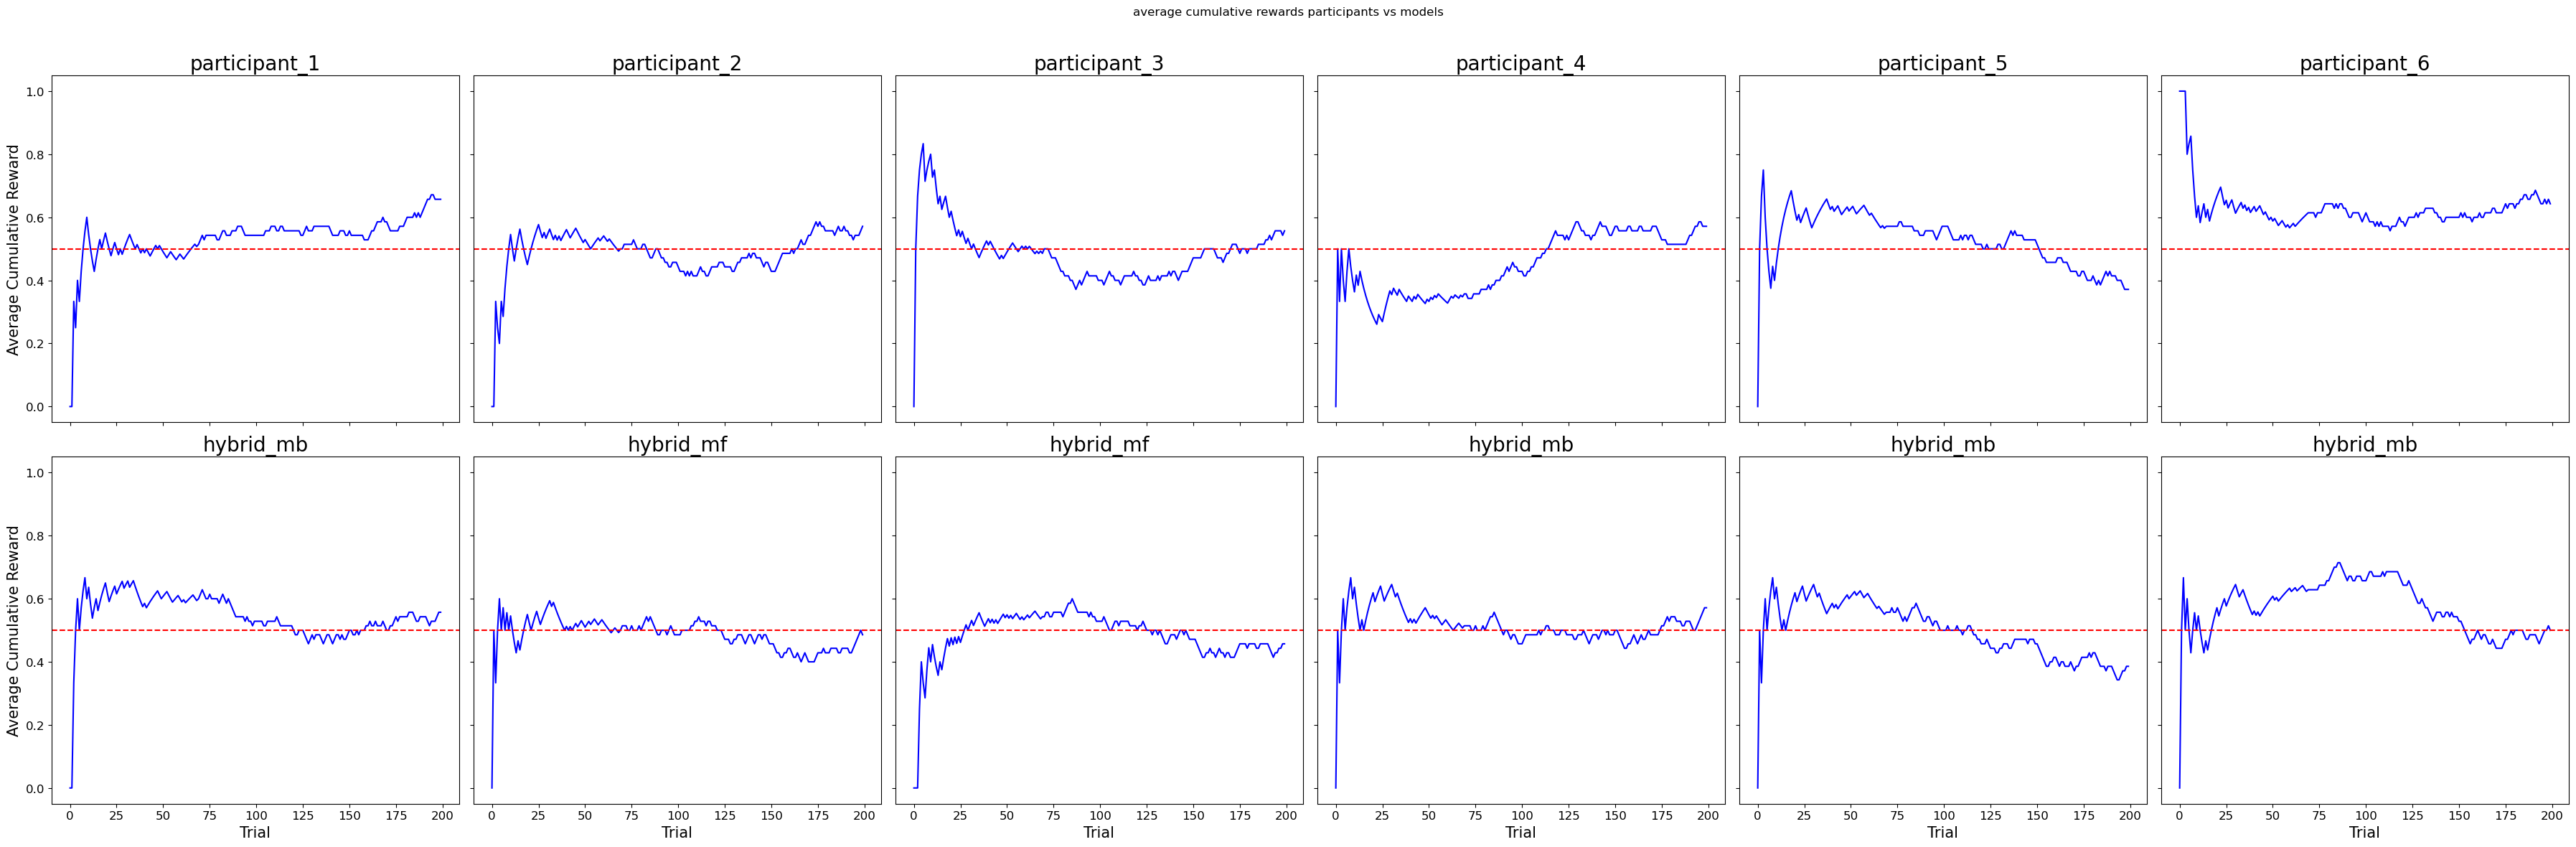

Plot saved to comparison_results/plots/avg_cumulative_reward_03-04_08-47-11.png


In [48]:
# average cumulative rewards side by side
window_size = 70
calc_plot_running_average_cumulative_reward(dfs=data_all + simulated_data, labels=participant_and_models_labels,
                            title='average cumulative rewards participants vs models', window_size=window_size, max_plots_per_row=len(data_all),
                            save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'avg_cumulative_reward.png',
                            return_df=False)


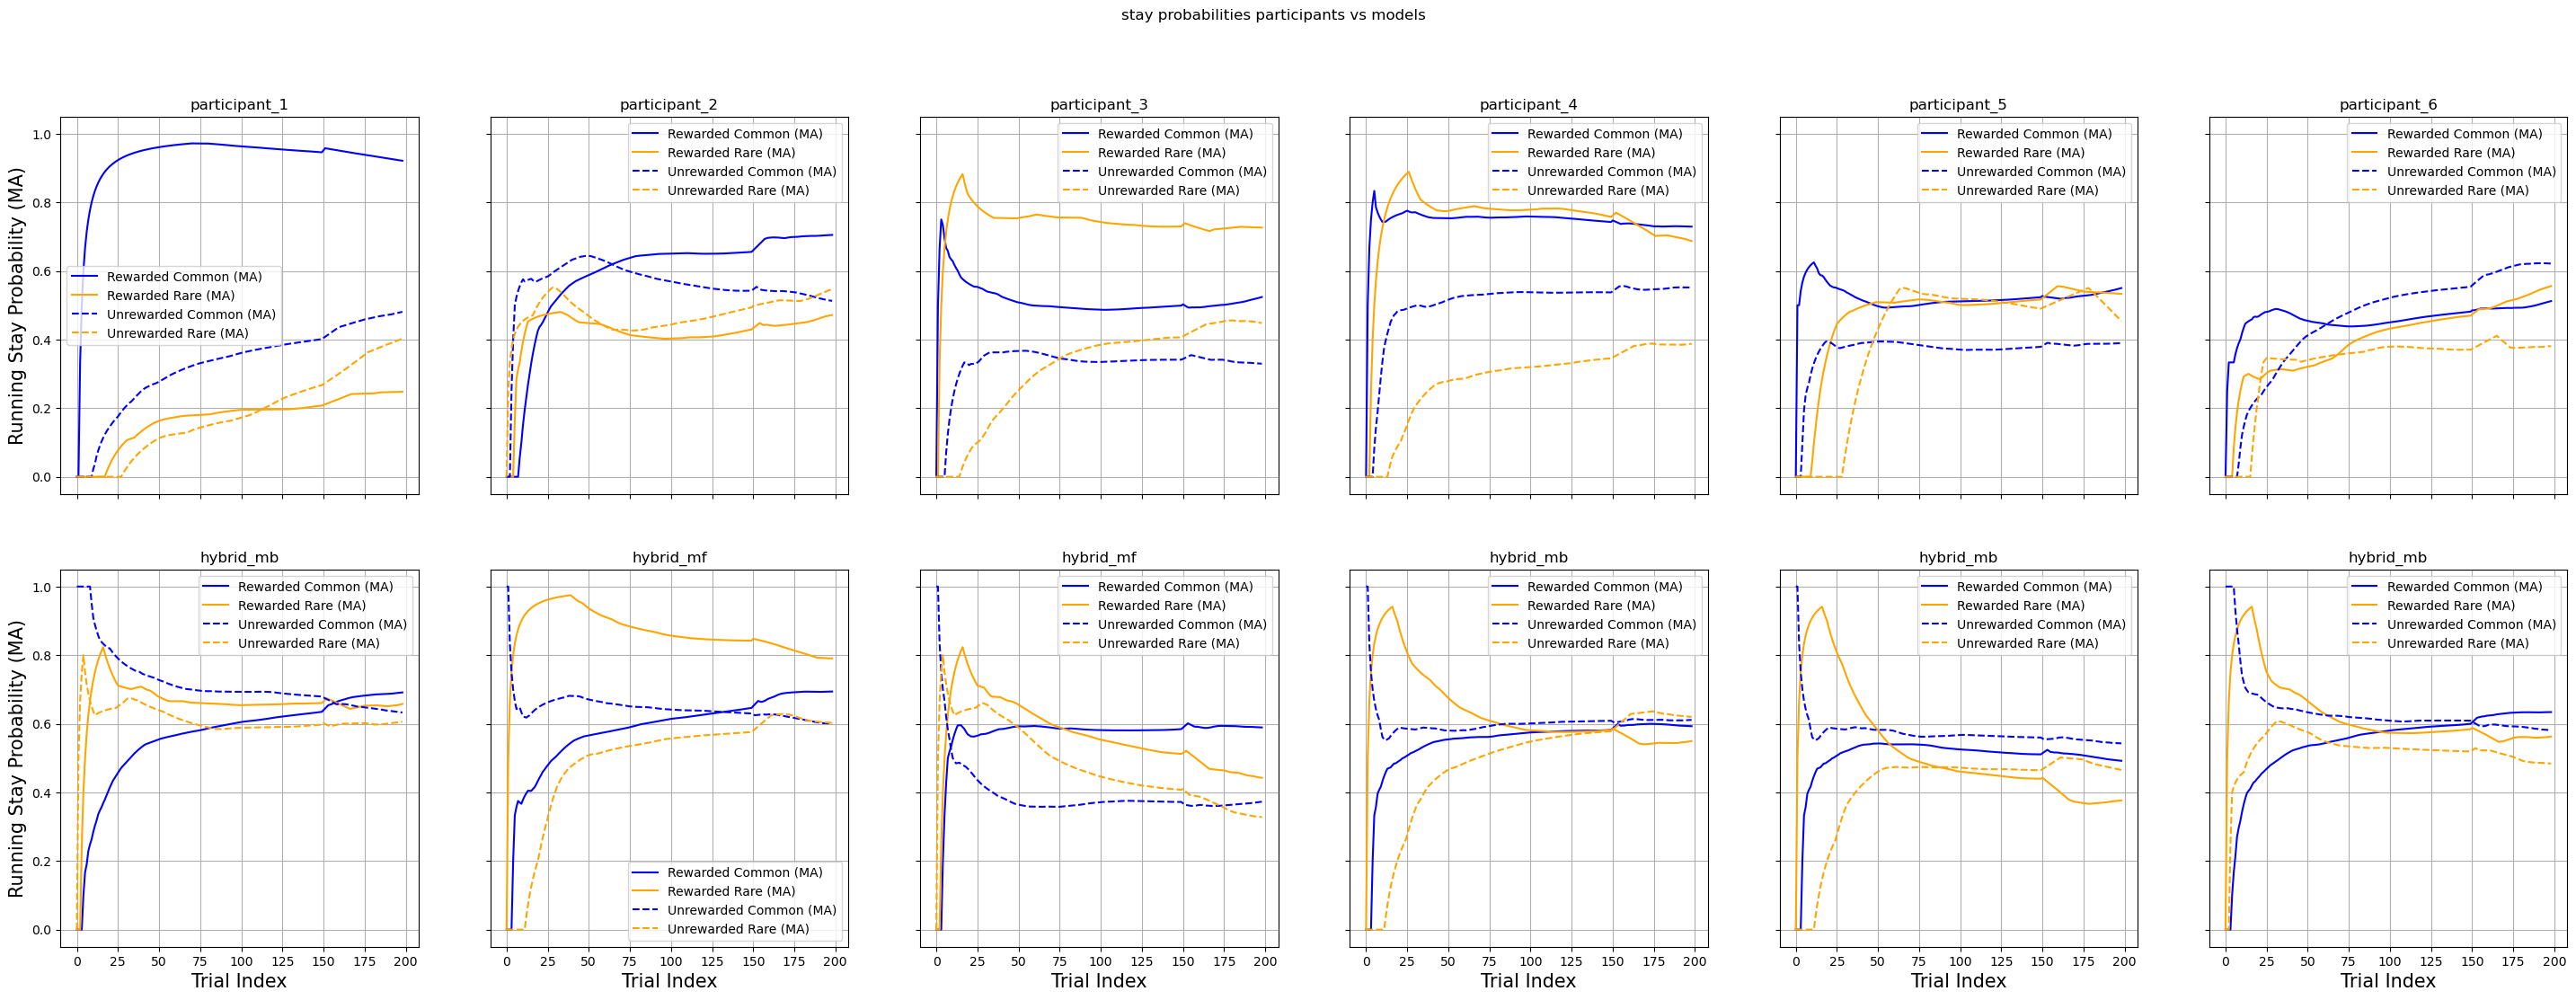

Plot saved to comparison_results/plots/stay_prob_running_avg_03-04_08-47-14.png


In [49]:
# moving average of the stay probabilities of both the participants and the models side by side
window_size = 150
calc_plot_running_stay_probabilities(dfs=data_all + simulated_data, labels=participant_and_models_labels,
                            title='stay probabilities participants vs models',window_size=window_size, max_plots_per_row=len(data_all),
                            save=SAVE_RESULTS, filename=SAVE_DIR_PLOTS + 'stay_prob_running_avg.png',
                            return_df=False)
